In [1099]:
# -*- coding: utf-8 -*-

In [1]:
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
from matplotlib import pyplot as plt

from IPython.html.widgets import interact, fixed
import ipywidgets as widgets

import io

font_plt = {'family': 'serif',
            'color':  'darkred',
            'weight': 'normal',
            'size': 10,
            }
font_plt_ax = {'family': 'serif',
               'color':  'black',
               'weight': 'normal',
               'size': 10,
              }
import sys

import glob #glob is helpful for searching for filenames or directories
sys.path.append('E:\\Differential-Dynamic-Microscopy---Python')
import ddm_clean as ddm #this is the module containing the differential dynamic microscopy code
import scipy #scientific python
import pickle #for saving data
from scipy.special import gamma

C:\ProgramData\Anaconda2\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
tiff_file.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
tiff_file.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
tiff_file.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


In [2]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt

#import mpld3

# Use seaborn styles for nice-looking plots
#import seaborn; seaborn.set()

In [3]:
#FRAMERATE
newt = lambda t,s: (1./s)*gamma(1./s)*t
framerate =60.0
px = 0.13
imDimension = 128
q = np.arange(0,imDimension/2)*2*np.pi*(1./(imDimension*(px))) 

[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192  193  194  196  197
  198 

<IPython.core.display.Javascript object>


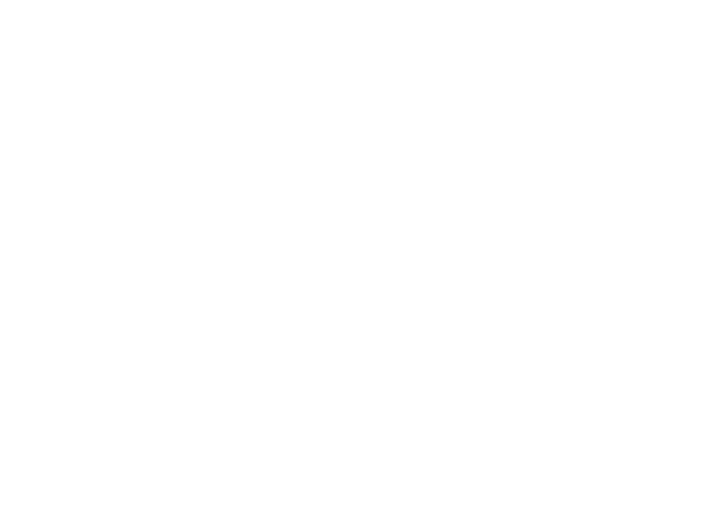

mpfit.py:2284: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if numpy.rank(rr) != 2:


0.99
2434421745.8132


<IPython.core.display.Javascript object>

('bg:', 14906.463073569239)
('bg:', 14906.463073569239)
('bg:', 14906.463073569239)
('bg:', 14906.463073569239)
('bg:', 14906.463073569239)
('bg:', 14906.463073569239)
('bg:', 14906.463073569239)


ddm_clean.py:251: RuntimeWarning: invalid value encountered in power
  g1 = np.exp(-1 * (x / t1)**s1)


('bg:', 14906.463073569239)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:267: RuntimeWarning: divide by zero encountered in power


NameError: name 'allResults' is not defined

In [4]:
#settings
video=3
ROI=1
side='T'
speed=45
#data_dir = "X:\\Ryan C\\Data\\DDM_Karthik\\20210715\\tif files\\Finished\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20210902\\"
#data_dir = "Y:\\Karthik_KRP\\Data\\DDM_DNA_MT\\20210902\\Philip data\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20211001\\"
data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\"
#data_file = "%s_%s_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
#data_file = "%s_%s_BH-filter_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
data_file = "Trial_%s_%s%s128_FFTDIFFS_dts_ffts_ravs.p" %(video,side,ROI)
#data_file = "Trial_%s_B%s64_FFTDIFFS_dts_ffts_ravs.p" %(video, ROI)

dat = pickle.load(open(data_dir+data_file,'rb'))
ravs = dat['ravs'] 
dts  = dat['dts']
ffts = dat['ffts']
times = dts/framerate
print(dts)
print(times)

%matplotlib notebook
q_index = -1 #the last index
#backg = 2632 #change me! 
backg = np.mean(ravs[:,q_index])
pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=ravs[:,q_index],bg=backg, double=False, fps=framerate)
plt.plot(times, ravs[:,q_index],'ro') #plot the data
plt.plot(times, ddm.dTheory(times,*pars), '-k', lw=4) #see how well the initial guess performs
ax = plt.gca()
plt.text(0.8, 0.2, 'Index of q-value: %i' % q_index, horizontalalignment='center', verticalalignment='center', 
           transform=ax.transAxes, fontdict=font_plt)
plt.xlabel('Time (s)');
np.mean(ravs[:,q_index])
qq= [0.4,0.415,0.43,0.445,0.46,0.475,0.49,0.5,0.515,0.525,0.54,0.55,0.565,0.575,0.59,0.6,0.615,0.63,0.645,0.65,0.665,
         0.675,0.69,0.7,0.715,0.73,0.745,0.75,0.765,0.78,0.795,0.81,0.825,0.84,0.855,0.87,0.89,0.9,0.915,0.93,0.945,
         0.95,0.975,0.99,1.1]
pp=qq[1]

def two_rounds_fitting(data, times,pp):
    '''
    This function does two rounds of fitting. 
    First it uses SciPy's least-squares fitting:
        https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.leastsq.html
    Then, it uses the Levenberg-Marquardt method with the mpfit module. 
    '''

    pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=data, bg=backg, double=False, fps=framerate)
    #Paramters:
    # Amplitude-0, TimeConst-1, Background-2, Alpha (strtching exp), (... same for second exp..))
    minp[3]=0
    maxp[3]=2
    pars[3]=pp#CHANGE STRECTHING EXPONENT HERE
    
    maxp[2]=200000000
    minp[2]=10
    pars[2]=backg# change this to the amplitude of the q fit show in the plot above
    

    maxp[1] = 100000000000 #Decay Time Range
    minp[1] = 0.001
     
    maxp[5] = 100
    
    fix[3]= True#Fix alpha
    fix[2]= True #Fix bg
    
   
    fix[6]= False #6 is the stretching exponent for 2nd exponential
    pars[6] = 0.3
    minp[6] = 0.3 #min alpha2\n",
    maxp[6] = 1.5  #max alpha2\n",
    
    pars[5] = 0.1*pars[1] #5 is the time const for 2nd exponential
    minp[5] = 0.01
    '''
    #Leave this commented out for single exponential fits
    totamp = pars[0]+pars[4] ##0 and 4 are the amplitudes
    pars[4] = 0.4*totamp
    pars[0] = 0.4*totamp'''
    

    #The ddm.newFitLeastsq function does not check whether the parameters are within the
    #  minimum and maximum bounds. It uses SciPy's optimize.leastsq. 
    fitparams_lsq,theory_lsq = ddm.newFitLeastsq(data,times,pars,minp,maxp,lmin,lmax,fix,logfit=False)
    newPars = fitparams_lsq.copy()
    
    #We'll use the found parameters from SciPy's optimize.leastsq and feed them into the
    #  Levenberg-Marquardt function. Before we do so, we'll check that none of the found
    #  parameters are outside the min/max bounds. 
    for i,p in enumerate(fitparams_lsq):
        if p>maxp[i]:
            newPars[i] = maxp[i]*0.9
        if p<minp[i]:
            if p<0:
                newPars[i]=abs(p)
                if newPars[i]>maxp[i]:
                    newPars[i] = maxp[i]*0.9
                elif newPars[i]<minp[i]:
                    newPars[i] = minp[i]*1.1
            else:
                newPars[i] = minp[i]*1.1
                
    #Now use the Levenberg-Marquardt function. It returns the optimized paramters (fitparamsB), the 
    #  best fit (theoryB), any error codes, and the chi-squared value (the sum of squares of the error)
    fitparamsB, theoryB, errCodeB, chi2B = ddm.newFit(data,times,newPars,minp,maxp,lmin,lmax,fix,
                                                      logfit=False,quiet=True,factor=0.8)
    
    return fitparamsB, theoryB, chi2B
q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops

gg=np.zeros((11,45))

a_list=np.zeros((1,45))
for k in range(45):
    for i,q_index in enumerate([5,6,7,8,9,10,11,12,13,14,15]):
        pp=qq[k]
        fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],pp)
        gg[i,k]=chi2B
    #a_list[:,k]=sum(gg[:,k])/len(gg[:,k])
a_list=gg.mean(0)
#print(a_list)
min_ele=a_list[0]
rr=qq[0]
for i in range(1,len(a_list)):
    if a_list[i]<min_ele:
        min_ele=a_list[i]
        rr=qq[i]
print(rr)
print(min_ele)

%matplotlib notebook
plt.figure(figsize=(10,10)) #Create figure of size 10x10 (inches)

q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops
#Loop over four different q-values to do the fit
#for i,q_index in enumerate([2, 5,10,15,20,25,30,35]):
for i,q_index in enumerate([4,7,10,15,17,20,25,30]):
    fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],rr)
    #print len(theoryB)
    ax = plt.subplot(4,2,i+1) #creating 4 subplots in a 2x2 grid
    matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
    ax.semilogx(times,ravs[:,q_index],'ro',alpha=0.4)
    ax.plot(times[:len(theoryB)], theoryB, '-b',lw=3)
    ax.text(0.05,0.88,'Decay time: %.2f s' % fitparamsB[1], 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.76,'Stretching expo: %.2f, %.2f' % (fitparamsB[3], fitparamsB[6]), 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.64,'Amptlidue1: %.2f' % (fitparamsB[0]),
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel("Time (s)", fontdict=font_plt_ax)
    ax.set_title("Fit for q-index of %i. So q = %.3f 1/$\mu$m" % (q_index, q[q_index]), fontdict=font_plt_ax)
    print ("bg:", fitparamsB[2])
    plt.savefig(data_dir + "%s_%s_%s_ISFs.png" %(video,side,ROI))




# So, you have fixed the background AND changed the stretching exponent range, but your fits still seem kind of bad! You can continue onto the next steps to check out some of the other paramters. Your issue might be there!
fitparams = np.zeros((ravs.shape[1],7))
theory = np.zeros((ravs.shape[1],len(times[:end_time])))
tau = np.zeros_like(ravs[0,:]) #decay time
amp = np.zeros_like(tau) #amplitude
bg = np.zeros_like(tau) #background
alph = np.zeros_like(tau) #alpha (stretching exponent)
amp2 = np.zeros_like(tau) #amplitude
tau2 = np.zeros_like(tau) #background
alph2 = np.zeros_like(tau) #alpha (stretching exponent)
chi2 = np.zeros_like(tau)
for i in range(1,len(tau)):
    fitparams[i], theory[i], chi2[i] = two_rounds_fitting(ravs[:end_time,i], times[:end_time],rr)
    amp[i] = fitparams[i][0]
    bg[i] = fitparams[i][2]
    tau[i] = fitparams[i][1]
    alph[i] = fitparams[i][3]
    amp2[i] = fitparams[i][4]
    tau2[i] = fitparams[i][5]
    alph2[i] = fitparams[i][6]
#Plot the amplitude versus the wave vector

fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], amp[2:-1], 'ro')
ax.loglog(q[3:-1], amp2[2:-1], 'bd')
w = amp[2:-1].argmax() #argmax returns the index of the array that has the max value
q_for_max_a = q[2:-2][w]
ax.loglog(q[3:-1], bg[2:-1], 'bo') #Plot the background versus the wave vector
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("Amplitude (red); amp2 (red); bg (grn)", fontdict=font_plt_ax)

ax.text(0.2,0.7,'Max A at 1/q = %.3f' % (1.0/q_for_max_a), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);
ax.text(0.2,0.8,'Mean Background = %.3f' % (bg[4:14].mean()), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);




#Plot the str exponent versus the wave vector
fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], alph[2:-1], 'ro')
ax.loglog(q[3:-1], alph2[2:-1], 'bo')
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("stretching exponent", fontdict=font_plt_ax)









#Plot the decay time versus the wave vector
fig = plt.figure(figsize=(8,8/1.618)); ax = fig.gca(); 
#ax.loglog(q[3:-1], tau[2:-1], 'ro')
qs = q[2:-2]
qend=-1
q0=q[2:qend]
tau0 = ddm.newt(tau[2:qend],alph[2:qend])
#ax.loglog(qs, tau[2:-1], 'ro')
ax.loglog(q[3:qend], ddm.newt(tau[2:qend],alph[2:qend]),'bo') # this is for the first exponential
#ax.loglog(q[2:-31],tau[2:-30],'ro')
#ax.loglog(q[3:-30], ddm.newt(tau2[2:-30],alph2[2:-30]),'ro') # this is for the second
#ax.loglog(q[3:-30], tau2[2:-30],'go')


#aa=[0,1,2,3,4,5,6]
#bb=[10,11,12,13,14,15,16,17,18,19,20]
#Setting range of q values for fitting the data 
#for i in range(aa)
   # for j in range(bb)
minq=4
maxq=14

qmin=q[minq]
qmax=q[maxq]
new_taus=ddm.newt(tau[2:qend],alph[2:qend])

b = np.where((q>=qmin)&(q<=qmax))
ax.plot(q[b[0]+3],new_taus[b[0]],'r+',label='good q range')
#ax.plot(q[b], new_taus[b], 'r+')

ax.set_xlim(0.9,50)
ax.set_ylim(0.0001,10000)

## q^-2, does it look diffusive ?
diffusion_coeff = .1 # CHANGE DIFFUSION COEFFICIENT
power = 2.0 
ax.plot(q[1:-1], (1./diffusion_coeff) * 1./(q[1:-1]**power), '--c', label="Diffusive")


#Fitting data to a line
a = np.polyfit(np.log(q[b[0]+3]),np.log(new_taus[b[0]]), 1)

slope=a[0]
coef1 = np.exp(a[1])
alpha = 2./(-1*slope)
Dif = (1.0/coef1)**alpha
tau_fit = coef1*(q**(-2.0/alpha))
ax.plot(q, tau_fit, '-k', label = "best fit line")
plt.legend()

## does it fit some other power?
#adiffusion_coeff = .022
#power2 = 3
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')

#adiffusion_coeff = 0.018
#power2 = 1
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')


ax.text(0.55,0.15,'D = %.4f um2/s' % diffusion_coeff,
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
ax.text(3,380,"slope: %.4f" %slope)
ax.set_xlabel("q (um^-1)", fontdict=font_plt_ax)
ax.set_ylabel("tau (s)", fontdict=font_plt_ax)
ax.text(3,660,"alpha: %.4f" %alpha)
plt.savefig(data_dir+ "%s_%s_%s_Tau_vs_q.png" %(video,side,ROI))

#################################################################################################
allResults['fitparams_'+str(video)+'_'+str(ROI)] = fitparams
allResults['theory_'+str(video)+'_'+str(ROI)] = theory
allResults['chi2_'+str(video)+'_'+str(ROI)] = chi2
allResults['ravs_'+str(video)+'_'+str(ROI)] = ravs
allResults['dts'] = dts
allResults.keys()
ravs1=ravs[:,4]
ravs2=ravs[:,7]
ravs3=ravs[:,10]
ravs4=ravs[:,15]
ravs5=ravs[:,17]
ravs6=ravs[:,20]
ravs7=ravs[:,25]
ravs8=ravs[:,30]
a=[0]*(len(times)-len(q))
b=[0]*(len(times)-len(tau))
qs=np.append(q,a)
taus=np.append(tau,b)

Final_Data=np.transpose(np.vstack([times,ravs1,ravs2,ravs3,ravs4,ravs5,ravs6,ravs7,ravs8,qs,taus]))
Final_Data_1=(np.vstack([taus]))
np.savetxt(data_dir+ "onlyT_%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data_1, delimiter=',')
np.savetxt(data_dir+ "%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data, delimiter=',')
#np.savetxt('C:\\Users\\kpeddireddy\\Desktop\\test\\1_1_full_Final_Data.csv', Final_Data, delimiter=',')




import pandas as pd
df=pd.DataFrame(Final_Data_1)
df.to_csv(data_dir+ "%s_Tau_vs_q.csv" %(speed), mode='a', index=False, header=False)

[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192  193  194  196  197
  198 

<IPython.core.display.Javascript object>


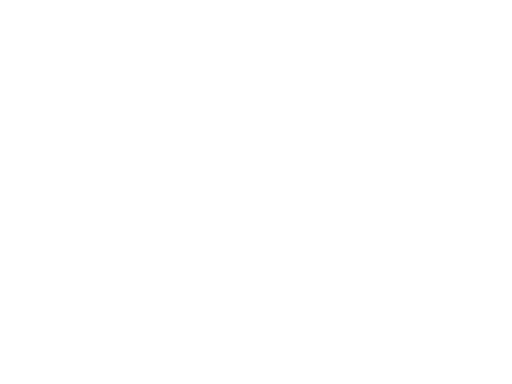

0.73
795288753.2419692


<IPython.core.display.Javascript object>


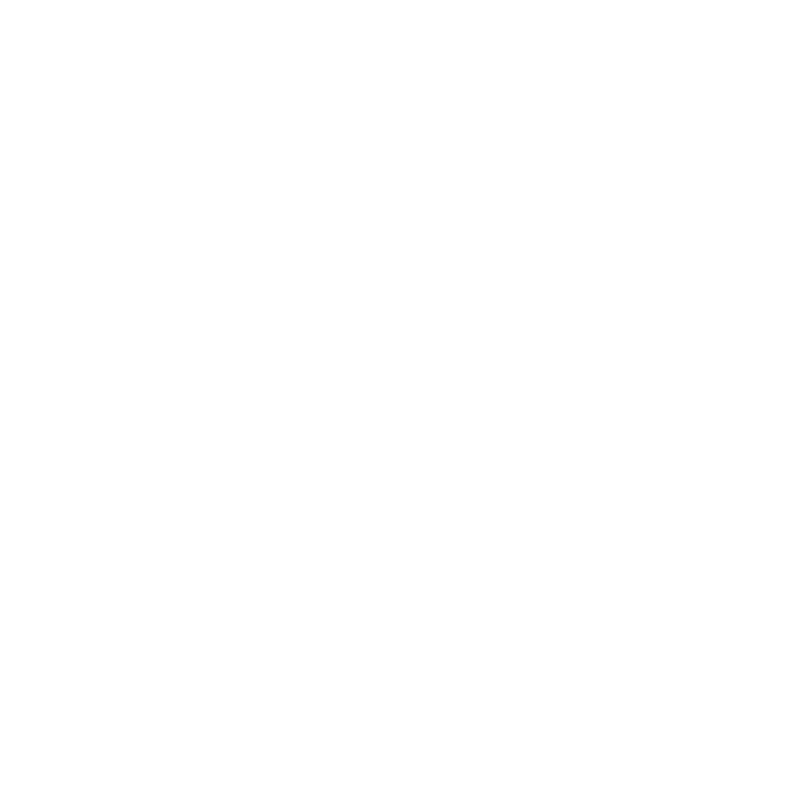

('bg:', 14204.519660978824)
('bg:', 14204.519660978824)
('bg:', 14204.519660978824)
('bg:', 14204.519660978824)
('bg:', 14204.519660978824)
('bg:', 14204.519660978824)
('bg:', 14204.519660978824)
('bg:', 14204.519660978824)


<IPython.core.display.Javascript object>


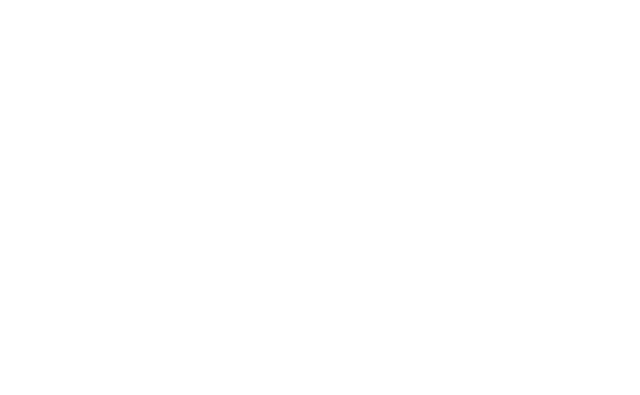

<IPython.core.display.Javascript object>


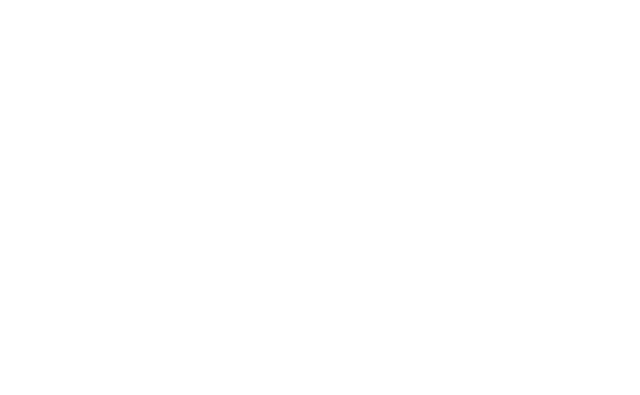

<IPython.core.display.Javascript object>


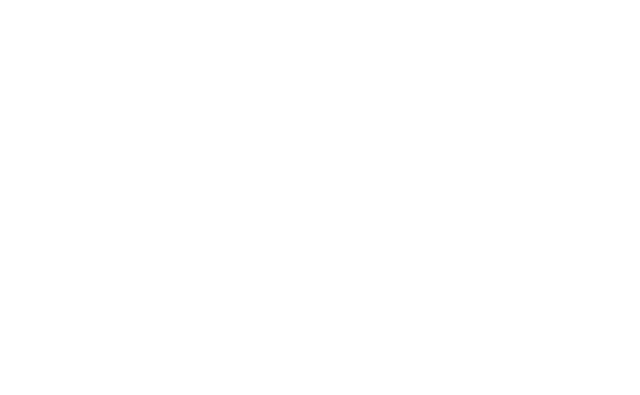

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:263: RuntimeWarning: divide by zero encountered in power


In [1104]:
#settings
ROI=2
#data_dir = "X:\\Ryan C\\Data\\DDM_Karthik\\20210715\\tif files\\Finished\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20210902\\"
#data_dir = "Y:\\Karthik_KRP\\Data\\DDM_DNA_MT\\20210902\\Philip data\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20211001\\"
#data_file = "%s_%s_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
#data_file = "%s_%s_BH-filter_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
data_file = "Trial_%s_%s%s128_FFTDIFFS_dts_ffts_ravs.p" %(video,side,ROI)
#data_file = "Trial_%s_B%s64_FFTDIFFS_dts_ffts_ravs.p" %(video, ROI)

dat = pickle.load(open(data_dir+data_file,'rb'))
ravs = dat['ravs'] 
dts  = dat['dts']
ffts = dat['ffts']
times = dts/framerate
print(dts)
print(times)

%matplotlib notebook
q_index = -1 #the last index
#backg = 2632 #change me! 
backg = np.mean(ravs[:,q_index])
pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=ravs[:,q_index],bg=backg, double=False, fps=framerate)
plt.plot(times, ravs[:,q_index],'ro') #plot the data
plt.plot(times, ddm.dTheory(times,*pars), '-k', lw=4) #see how well the initial guess performs
ax = plt.gca()
plt.text(0.8, 0.2, 'Index of q-value: %i' % q_index, horizontalalignment='center', verticalalignment='center', 
           transform=ax.transAxes, fontdict=font_plt)
plt.xlabel('Time (s)');
np.mean(ravs[:,q_index])
qq= [0.4,0.415,0.43,0.445,0.46,0.475,0.49,0.5,0.515,0.525,0.54,0.55,0.565,0.575,0.59,0.6,0.615,0.63,0.645,0.65,0.665,
         0.675,0.69,0.7,0.715,0.73,0.745,0.75,0.765,0.78,0.795,0.81,0.825,0.84,0.855,0.87,0.89,0.9,0.915,0.93,0.945,
         0.95,0.975,0.99,1.1]
pp=qq[1]

def two_rounds_fitting(data, times,pp):
    '''
    This function does two rounds of fitting. 
    First it uses SciPy's least-squares fitting:
        https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.leastsq.html
    Then, it uses the Levenberg-Marquardt method with the mpfit module. 
    '''

    pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=data, bg=backg, double=False, fps=framerate)
    #Paramters:
    # Amplitude-0, TimeConst-1, Background-2, Alpha (strtching exp), (... same for second exp..))
    minp[3]=0
    maxp[3]=2
    pars[3]=pp#CHANGE STRECTHING EXPONENT HERE
    
    maxp[2]=200000000
    minp[2]=10
    pars[2]=backg# change this to the amplitude of the q fit show in the plot above
    

    maxp[1] = 100000000000 #Decay Time Range
    minp[1] = 0.001
     
    maxp[5] = 100
    
    fix[3]= True#Fix alpha
    fix[2]= True #Fix bg
    
   
    fix[6]= False #6 is the stretching exponent for 2nd exponential
    pars[6] = 0.3
    minp[6] = 0.3 #min alpha2\n",
    maxp[6] = 1.5  #max alpha2\n",
    
    pars[5] = 0.1*pars[1] #5 is the time const for 2nd exponential
    minp[5] = 0.01
    '''
    #Leave this commented out for single exponential fits
    totamp = pars[0]+pars[4] ##0 and 4 are the amplitudes
    pars[4] = 0.4*totamp
    pars[0] = 0.4*totamp'''
    

    #The ddm.newFitLeastsq function does not check whether the parameters are within the
    #  minimum and maximum bounds. It uses SciPy's optimize.leastsq. 
    fitparams_lsq,theory_lsq = ddm.newFitLeastsq(data,times,pars,minp,maxp,lmin,lmax,fix,logfit=False)
    newPars = fitparams_lsq.copy()
    
    #We'll use the found parameters from SciPy's optimize.leastsq and feed them into the
    #  Levenberg-Marquardt function. Before we do so, we'll check that none of the found
    #  parameters are outside the min/max bounds. 
    for i,p in enumerate(fitparams_lsq):
        if p>maxp[i]:
            newPars[i] = maxp[i]*0.9
        if p<minp[i]:
            if p<0:
                newPars[i]=abs(p)
                if newPars[i]>maxp[i]:
                    newPars[i] = maxp[i]*0.9
                elif newPars[i]<minp[i]:
                    newPars[i] = minp[i]*1.1
            else:
                newPars[i] = minp[i]*1.1
                
    #Now use the Levenberg-Marquardt function. It returns the optimized paramters (fitparamsB), the 
    #  best fit (theoryB), any error codes, and the chi-squared value (the sum of squares of the error)
    fitparamsB, theoryB, errCodeB, chi2B = ddm.newFit(data,times,newPars,minp,maxp,lmin,lmax,fix,
                                                      logfit=False,quiet=True,factor=0.8)
    
    return fitparamsB, theoryB, chi2B
q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops

gg=np.zeros((11,45))

a_list=np.zeros((1,45))
for k in range(45):
    for i,q_index in enumerate([5,6,7,8,9,10,11,12,13,14,15]):
        pp=qq[k]
        fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],pp)
        gg[i,k]=chi2B
    #a_list[:,k]=sum(gg[:,k])/len(gg[:,k])
a_list=gg.mean(0)
#print(a_list)
min_ele=a_list[0]
rr=qq[0]
for i in range(1,len(a_list)):
    if a_list[i]<min_ele:
        min_ele=a_list[i]
        rr=qq[i]
print(rr)
print(min_ele)

%matplotlib notebook
plt.figure(figsize=(10,10)) #Create figure of size 10x10 (inches)

q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops
#Loop over four different q-values to do the fit
#for i,q_index in enumerate([2, 5,10,15,20,25,30,35]):
for i,q_index in enumerate([4,7,10,15,17,20,25,30]):
    fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],rr)
    #print len(theoryB)
    ax = plt.subplot(4,2,i+1) #creating 4 subplots in a 2x2 grid
    matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
    ax.semilogx(times,ravs[:,q_index],'ro',alpha=0.4)
    ax.plot(times[:len(theoryB)], theoryB, '-b',lw=3)
    ax.text(0.05,0.88,'Decay time: %.2f s' % fitparamsB[1], 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.76,'Stretching expo: %.2f, %.2f' % (fitparamsB[3], fitparamsB[6]), 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.64,'Amptlidue1: %.2f' % (fitparamsB[0]),
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel("Time (s)", fontdict=font_plt_ax)
    ax.set_title("Fit for q-index of %i. So q = %.3f 1/$\mu$m" % (q_index, q[q_index]), fontdict=font_plt_ax)
    print ("bg:", fitparamsB[2])
    plt.savefig(data_dir + "%s_%s_%s_ISFs.png" %(video,side,ROI))




# So, you have fixed the background AND changed the stretching exponent range, but your fits still seem kind of bad! You can continue onto the next steps to check out some of the other paramters. Your issue might be there!
fitparams = np.zeros((ravs.shape[1],7))
theory = np.zeros((ravs.shape[1],len(times[:end_time])))
tau = np.zeros_like(ravs[0,:]) #decay time
amp = np.zeros_like(tau) #amplitude
bg = np.zeros_like(tau) #background
alph = np.zeros_like(tau) #alpha (stretching exponent)
amp2 = np.zeros_like(tau) #amplitude
tau2 = np.zeros_like(tau) #background
alph2 = np.zeros_like(tau) #alpha (stretching exponent)
chi2 = np.zeros_like(tau)
for i in range(1,len(tau)):
    fitparams[i], theory[i], chi2[i] = two_rounds_fitting(ravs[:end_time,i], times[:end_time],rr)
    amp[i] = fitparams[i][0]
    bg[i] = fitparams[i][2]
    tau[i] = fitparams[i][1]
    alph[i] = fitparams[i][3]
    amp2[i] = fitparams[i][4]
    tau2[i] = fitparams[i][5]
    alph2[i] = fitparams[i][6]
#Plot the amplitude versus the wave vector

fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], amp[2:-1], 'ro')
ax.loglog(q[3:-1], amp2[2:-1], 'bd')
w = amp[2:-1].argmax() #argmax returns the index of the array that has the max value
q_for_max_a = q[2:-2][w]
ax.loglog(q[3:-1], bg[2:-1], 'bo') #Plot the background versus the wave vector
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("Amplitude (red); amp2 (red); bg (grn)", fontdict=font_plt_ax)

ax.text(0.2,0.7,'Max A at 1/q = %.3f' % (1.0/q_for_max_a), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);
ax.text(0.2,0.8,'Mean Background = %.3f' % (bg[4:14].mean()), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);




#Plot the str exponent versus the wave vector
fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], alph[2:-1], 'ro')
ax.loglog(q[3:-1], alph2[2:-1], 'bo')
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("stretching exponent", fontdict=font_plt_ax)









#Plot the decay time versus the wave vector
fig = plt.figure(figsize=(8,8/1.618)); ax = fig.gca(); 
#ax.loglog(q[3:-1], tau[2:-1], 'ro')
qs = q[2:-2]
qend=-1
q0=q[2:qend]
tau0 = ddm.newt(tau[2:qend],alph[2:qend])
#ax.loglog(qs, tau[2:-1], 'ro')
ax.loglog(q[3:qend], ddm.newt(tau[2:qend],alph[2:qend]),'bo') # this is for the first exponential
#ax.loglog(q[2:-31],tau[2:-30],'ro')
#ax.loglog(q[3:-30], ddm.newt(tau2[2:-30],alph2[2:-30]),'ro') # this is for the second
#ax.loglog(q[3:-30], tau2[2:-30],'go')


#aa=[0,1,2,3,4,5,6]
#bb=[10,11,12,13,14,15,16,17,18,19,20]
#Setting range of q values for fitting the data 
#for i in range(aa)
   # for j in range(bb)
minq=4
maxq=14

qmin=q[minq]
qmax=q[maxq]
new_taus=ddm.newt(tau[2:qend],alph[2:qend])

b = np.where((q>=qmin)&(q<=qmax))
ax.plot(q[b[0]+3],new_taus[b[0]],'r+',label='good q range')
#ax.plot(q[b], new_taus[b], 'r+')

ax.set_xlim(0.9,50)
ax.set_ylim(0.0001,10000)

## q^-2, does it look diffusive ?
diffusion_coeff = .1 # CHANGE DIFFUSION COEFFICIENT
power = 2.0 
ax.plot(q[1:-1], (1./diffusion_coeff) * 1./(q[1:-1]**power), '--c', label="Diffusive")


#Fitting data to a line
a = np.polyfit(np.log(q[b[0]+3]),np.log(new_taus[b[0]]), 1)

slope=a[0]
coef1 = np.exp(a[1])
alpha = 2./(-1*slope)
Dif = (1.0/coef1)**alpha
tau_fit = coef1*(q**(-2.0/alpha))
ax.plot(q, tau_fit, '-k', label = "best fit line")
plt.legend()

## does it fit some other power?
#adiffusion_coeff = .022
#power2 = 3
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')

#adiffusion_coeff = 0.018
#power2 = 1
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')


ax.text(0.55,0.15,'D = %.4f um2/s' % diffusion_coeff,
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
ax.text(3,380,"slope: %.4f" %slope)
ax.set_xlabel("q (um^-1)", fontdict=font_plt_ax)
ax.set_ylabel("tau (s)", fontdict=font_plt_ax)
ax.text(3,660,"alpha: %.4f" %alpha)
plt.savefig(data_dir+ "%s_%s_%s_Tau_vs_q.png" %(video,side,ROI))

#################################################################################################
allResults['fitparams_'+str(video)+'_'+str(ROI)] = fitparams
allResults['theory_'+str(video)+'_'+str(ROI)] = theory
allResults['chi2_'+str(video)+'_'+str(ROI)] = chi2
allResults['ravs_'+str(video)+'_'+str(ROI)] = ravs
allResults['dts'] = dts
allResults.keys()
ravs1=ravs[:,4]
ravs2=ravs[:,7]
ravs3=ravs[:,10]
ravs4=ravs[:,15]
ravs5=ravs[:,17]
ravs6=ravs[:,20]
ravs7=ravs[:,25]
ravs8=ravs[:,30]
a=[0]*(len(times)-len(q))
b=[0]*(len(times)-len(tau))
qs=np.append(q,a)
taus=np.append(tau,b)

Final_Data=np.transpose(np.vstack([times,ravs1,ravs2,ravs3,ravs4,ravs5,ravs6,ravs7,ravs8,qs,taus]))
Final_Data_1=(np.vstack([taus]))
np.savetxt(data_dir+ "onlyT_%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data_1, delimiter=',')
np.savetxt(data_dir+ "%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data, delimiter=',')
#np.savetxt('C:\\Users\\kpeddireddy\\Desktop\\test\\1_1_full_Final_Data.csv', Final_Data, delimiter=',')




import pandas as pd
df=pd.DataFrame(Final_Data_1)
df.to_csv(data_dir+ "%s_Tau_vs_q.csv" %(speed), mode='a', index=False, header=False)

[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192  193  194  196  197
  198 

<IPython.core.display.Javascript object>


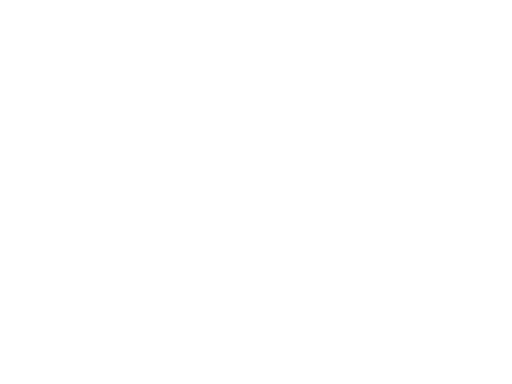

0.7
746904116.2191173


<IPython.core.display.Javascript object>


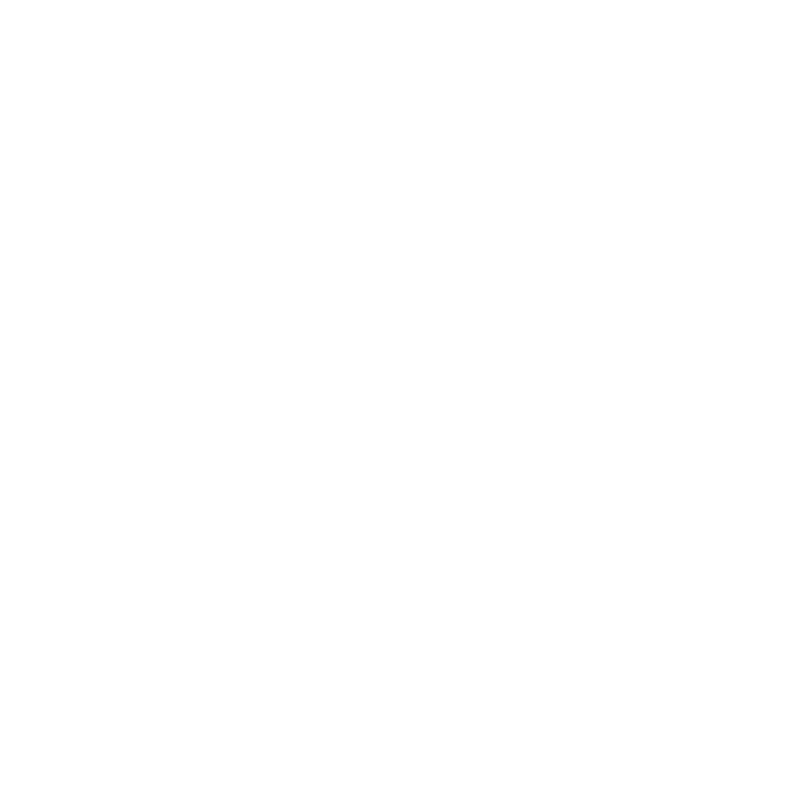

('bg:', 14231.376196040075)
('bg:', 14231.376196040075)
('bg:', 14231.376196040075)
('bg:', 14231.376196040075)
('bg:', 14231.376196040075)
('bg:', 14231.376196040075)
('bg:', 14231.376196040075)
('bg:', 14231.376196040075)


<IPython.core.display.Javascript object>


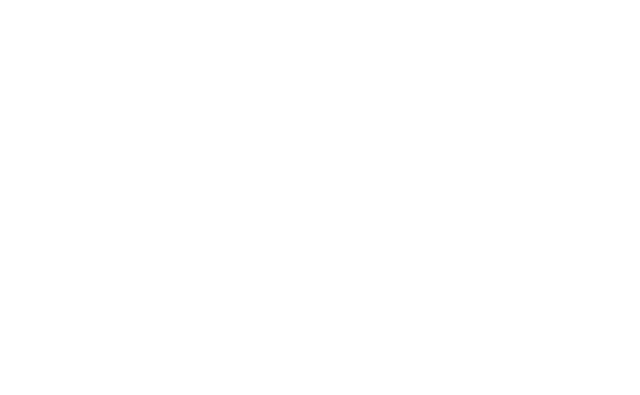

<IPython.core.display.Javascript object>


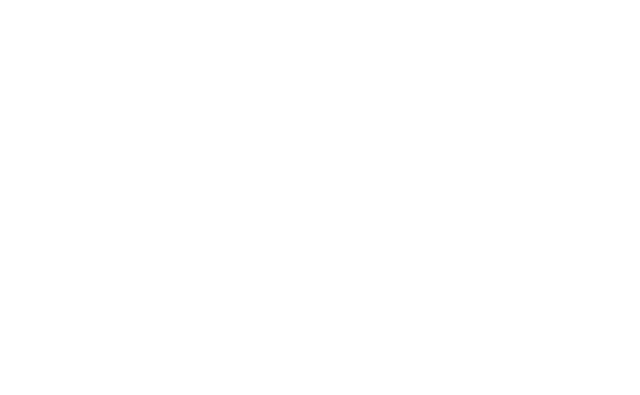

<IPython.core.display.Javascript object>


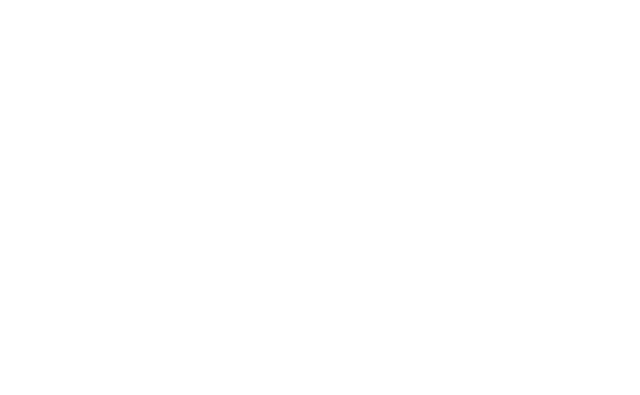

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:263: RuntimeWarning: divide by zero encountered in power


In [1105]:
#settings
ROI=3
#data_dir = "X:\\Ryan C\\Data\\DDM_Karthik\\20210715\\tif files\\Finished\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20210902\\"
#data_dir = "Y:\\Karthik_KRP\\Data\\DDM_DNA_MT\\20210902\\Philip data\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20211001\\"
#data_file = "%s_%s_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
#data_file = "%s_%s_BH-filter_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
data_file = "Trial_%s_%s%s128_FFTDIFFS_dts_ffts_ravs.p" %(video,side,ROI)
#data_file = "Trial_%s_B%s64_FFTDIFFS_dts_ffts_ravs.p" %(video, ROI)

dat = pickle.load(open(data_dir+data_file,'rb'))
ravs = dat['ravs'] 
dts  = dat['dts']
ffts = dat['ffts']
times = dts/framerate
print(dts)
print(times)

%matplotlib notebook
q_index = -1 #the last index
#backg = 2632 #change me! 
backg = np.mean(ravs[:,q_index])
pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=ravs[:,q_index],bg=backg, double=False, fps=framerate)
plt.plot(times, ravs[:,q_index],'ro') #plot the data
plt.plot(times, ddm.dTheory(times,*pars), '-k', lw=4) #see how well the initial guess performs
ax = plt.gca()
plt.text(0.8, 0.2, 'Index of q-value: %i' % q_index, horizontalalignment='center', verticalalignment='center', 
           transform=ax.transAxes, fontdict=font_plt)
plt.xlabel('Time (s)');
np.mean(ravs[:,q_index])
qq= [0.4,0.415,0.43,0.445,0.46,0.475,0.49,0.5,0.515,0.525,0.54,0.55,0.565,0.575,0.59,0.6,0.615,0.63,0.645,0.65,0.665,
         0.675,0.69,0.7,0.715,0.73,0.745,0.75,0.765,0.78,0.795,0.81,0.825,0.84,0.855,0.87,0.89,0.9,0.915,0.93,0.945,
         0.95,0.975,0.99,1.1]
pp=qq[1]

def two_rounds_fitting(data, times,pp):
    '''
    This function does two rounds of fitting. 
    First it uses SciPy's least-squares fitting:
        https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.leastsq.html
    Then, it uses the Levenberg-Marquardt method with the mpfit module. 
    '''

    pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=data, bg=backg, double=False, fps=framerate)
    #Paramters:
    # Amplitude-0, TimeConst-1, Background-2, Alpha (strtching exp), (... same for second exp..))
    minp[3]=0
    maxp[3]=2
    pars[3]=pp#CHANGE STRECTHING EXPONENT HERE
    
    maxp[2]=200000000
    minp[2]=10
    pars[2]=backg# change this to the amplitude of the q fit show in the plot above
    

    maxp[1] = 100000000000 #Decay Time Range
    minp[1] = 0.001
     
    maxp[5] = 100
    
    fix[3]= True#Fix alpha
    fix[2]= True #Fix bg
    
   
    fix[6]= False #6 is the stretching exponent for 2nd exponential
    pars[6] = 0.3
    minp[6] = 0.3 #min alpha2\n",
    maxp[6] = 1.5  #max alpha2\n",
    
    pars[5] = 0.1*pars[1] #5 is the time const for 2nd exponential
    minp[5] = 0.01
    '''
    #Leave this commented out for single exponential fits
    totamp = pars[0]+pars[4] ##0 and 4 are the amplitudes
    pars[4] = 0.4*totamp
    pars[0] = 0.4*totamp'''
    

    #The ddm.newFitLeastsq function does not check whether the parameters are within the
    #  minimum and maximum bounds. It uses SciPy's optimize.leastsq. 
    fitparams_lsq,theory_lsq = ddm.newFitLeastsq(data,times,pars,minp,maxp,lmin,lmax,fix,logfit=False)
    newPars = fitparams_lsq.copy()
    
    #We'll use the found parameters from SciPy's optimize.leastsq and feed them into the
    #  Levenberg-Marquardt function. Before we do so, we'll check that none of the found
    #  parameters are outside the min/max bounds. 
    for i,p in enumerate(fitparams_lsq):
        if p>maxp[i]:
            newPars[i] = maxp[i]*0.9
        if p<minp[i]:
            if p<0:
                newPars[i]=abs(p)
                if newPars[i]>maxp[i]:
                    newPars[i] = maxp[i]*0.9
                elif newPars[i]<minp[i]:
                    newPars[i] = minp[i]*1.1
            else:
                newPars[i] = minp[i]*1.1
                
    #Now use the Levenberg-Marquardt function. It returns the optimized paramters (fitparamsB), the 
    #  best fit (theoryB), any error codes, and the chi-squared value (the sum of squares of the error)
    fitparamsB, theoryB, errCodeB, chi2B = ddm.newFit(data,times,newPars,minp,maxp,lmin,lmax,fix,
                                                      logfit=False,quiet=True,factor=0.8)
    
    return fitparamsB, theoryB, chi2B
q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops

gg=np.zeros((11,45))

a_list=np.zeros((1,45))
for k in range(45):
    for i,q_index in enumerate([5,6,7,8,9,10,11,12,13,14,15]):
        pp=qq[k]
        fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],pp)
        gg[i,k]=chi2B
    #a_list[:,k]=sum(gg[:,k])/len(gg[:,k])
a_list=gg.mean(0)
#print(a_list)
min_ele=a_list[0]
rr=qq[0]
for i in range(1,len(a_list)):
    if a_list[i]<min_ele:
        min_ele=a_list[i]
        rr=qq[i]
print(rr)
print(min_ele)

%matplotlib notebook
plt.figure(figsize=(10,10)) #Create figure of size 10x10 (inches)

q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops
#Loop over four different q-values to do the fit
#for i,q_index in enumerate([2, 5,10,15,20,25,30,35]):
for i,q_index in enumerate([4,7,10,15,17,20,25,30]):
    fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],rr)
    #print len(theoryB)
    ax = plt.subplot(4,2,i+1) #creating 4 subplots in a 2x2 grid
    matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
    ax.semilogx(times,ravs[:,q_index],'ro',alpha=0.4)
    ax.plot(times[:len(theoryB)], theoryB, '-b',lw=3)
    ax.text(0.05,0.88,'Decay time: %.2f s' % fitparamsB[1], 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.76,'Stretching expo: %.2f, %.2f' % (fitparamsB[3], fitparamsB[6]), 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.64,'Amptlidue1: %.2f' % (fitparamsB[0]),
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel("Time (s)", fontdict=font_plt_ax)
    ax.set_title("Fit for q-index of %i. So q = %.3f 1/$\mu$m" % (q_index, q[q_index]), fontdict=font_plt_ax)
    print ("bg:", fitparamsB[2])
    plt.savefig(data_dir + "%s_%s_%s_ISFs.png" %(video,side,ROI))




# So, you have fixed the background AND changed the stretching exponent range, but your fits still seem kind of bad! You can continue onto the next steps to check out some of the other paramters. Your issue might be there!
fitparams = np.zeros((ravs.shape[1],7))
theory = np.zeros((ravs.shape[1],len(times[:end_time])))
tau = np.zeros_like(ravs[0,:]) #decay time
amp = np.zeros_like(tau) #amplitude
bg = np.zeros_like(tau) #background
alph = np.zeros_like(tau) #alpha (stretching exponent)
amp2 = np.zeros_like(tau) #amplitude
tau2 = np.zeros_like(tau) #background
alph2 = np.zeros_like(tau) #alpha (stretching exponent)
chi2 = np.zeros_like(tau)
for i in range(1,len(tau)):
    fitparams[i], theory[i], chi2[i] = two_rounds_fitting(ravs[:end_time,i], times[:end_time],rr)
    amp[i] = fitparams[i][0]
    bg[i] = fitparams[i][2]
    tau[i] = fitparams[i][1]
    alph[i] = fitparams[i][3]
    amp2[i] = fitparams[i][4]
    tau2[i] = fitparams[i][5]
    alph2[i] = fitparams[i][6]
#Plot the amplitude versus the wave vector

fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], amp[2:-1], 'ro')
ax.loglog(q[3:-1], amp2[2:-1], 'bd')
w = amp[2:-1].argmax() #argmax returns the index of the array that has the max value
q_for_max_a = q[2:-2][w]
ax.loglog(q[3:-1], bg[2:-1], 'bo') #Plot the background versus the wave vector
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("Amplitude (red); amp2 (red); bg (grn)", fontdict=font_plt_ax)

ax.text(0.2,0.7,'Max A at 1/q = %.3f' % (1.0/q_for_max_a), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);
ax.text(0.2,0.8,'Mean Background = %.3f' % (bg[4:14].mean()), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);




#Plot the str exponent versus the wave vector
fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], alph[2:-1], 'ro')
ax.loglog(q[3:-1], alph2[2:-1], 'bo')
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("stretching exponent", fontdict=font_plt_ax)









#Plot the decay time versus the wave vector
fig = plt.figure(figsize=(8,8/1.618)); ax = fig.gca(); 
#ax.loglog(q[3:-1], tau[2:-1], 'ro')
qs = q[2:-2]
qend=-1
q0=q[2:qend]
tau0 = ddm.newt(tau[2:qend],alph[2:qend])
#ax.loglog(qs, tau[2:-1], 'ro')
ax.loglog(q[3:qend], ddm.newt(tau[2:qend],alph[2:qend]),'bo') # this is for the first exponential
#ax.loglog(q[2:-31],tau[2:-30],'ro')
#ax.loglog(q[3:-30], ddm.newt(tau2[2:-30],alph2[2:-30]),'ro') # this is for the second
#ax.loglog(q[3:-30], tau2[2:-30],'go')


#aa=[0,1,2,3,4,5,6]
#bb=[10,11,12,13,14,15,16,17,18,19,20]
#Setting range of q values for fitting the data 
#for i in range(aa)
   # for j in range(bb)
minq=4
maxq=14

qmin=q[minq]
qmax=q[maxq]
new_taus=ddm.newt(tau[2:qend],alph[2:qend])

b = np.where((q>=qmin)&(q<=qmax))
ax.plot(q[b[0]+3],new_taus[b[0]],'r+',label='good q range')
#ax.plot(q[b], new_taus[b], 'r+')

ax.set_xlim(0.9,50)
ax.set_ylim(0.0001,10000)

## q^-2, does it look diffusive ?
diffusion_coeff = .1 # CHANGE DIFFUSION COEFFICIENT
power = 2.0 
ax.plot(q[1:-1], (1./diffusion_coeff) * 1./(q[1:-1]**power), '--c', label="Diffusive")


#Fitting data to a line
a = np.polyfit(np.log(q[b[0]+3]),np.log(new_taus[b[0]]), 1)

slope=a[0]
coef1 = np.exp(a[1])
alpha = 2./(-1*slope)
Dif = (1.0/coef1)**alpha
tau_fit = coef1*(q**(-2.0/alpha))
ax.plot(q, tau_fit, '-k', label = "best fit line")
plt.legend()

## does it fit some other power?
#adiffusion_coeff = .022
#power2 = 3
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')

#adiffusion_coeff = 0.018
#power2 = 1
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')


ax.text(0.55,0.15,'D = %.4f um2/s' % diffusion_coeff,
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
ax.text(3,380,"slope: %.4f" %slope)
ax.set_xlabel("q (um^-1)", fontdict=font_plt_ax)
ax.set_ylabel("tau (s)", fontdict=font_plt_ax)
ax.text(3,660,"alpha: %.4f" %alpha)
plt.savefig(data_dir+ "%s_%s_%s_Tau_vs_q.png" %(video,side,ROI))

#################################################################################################
allResults['fitparams_'+str(video)+'_'+str(ROI)] = fitparams
allResults['theory_'+str(video)+'_'+str(ROI)] = theory
allResults['chi2_'+str(video)+'_'+str(ROI)] = chi2
allResults['ravs_'+str(video)+'_'+str(ROI)] = ravs
allResults['dts'] = dts
allResults.keys()
ravs1=ravs[:,4]
ravs2=ravs[:,7]
ravs3=ravs[:,10]
ravs4=ravs[:,15]
ravs5=ravs[:,17]
ravs6=ravs[:,20]
ravs7=ravs[:,25]
ravs8=ravs[:,30]
a=[0]*(len(times)-len(q))
b=[0]*(len(times)-len(tau))
qs=np.append(q,a)
taus=np.append(tau,b)

Final_Data=np.transpose(np.vstack([times,ravs1,ravs2,ravs3,ravs4,ravs5,ravs6,ravs7,ravs8,qs,taus]))
Final_Data_1=(np.vstack([taus]))
np.savetxt(data_dir+ "onlyT_%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data_1, delimiter=',')
np.savetxt(data_dir+ "%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data, delimiter=',')
#np.savetxt('C:\\Users\\kpeddireddy\\Desktop\\test\\1_1_full_Final_Data.csv', Final_Data, delimiter=',')




import pandas as pd
df=pd.DataFrame(Final_Data_1)
df.to_csv(data_dir+ "%s_Tau_vs_q.csv" %(speed), mode='a', index=False, header=False)

[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192  193  194  196  197
  198 

<IPython.core.display.Javascript object>


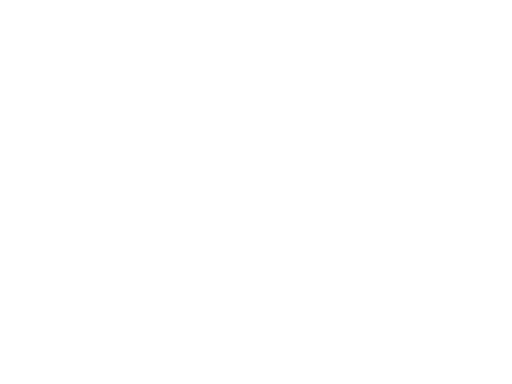

0.63
699671179.6525596


<IPython.core.display.Javascript object>


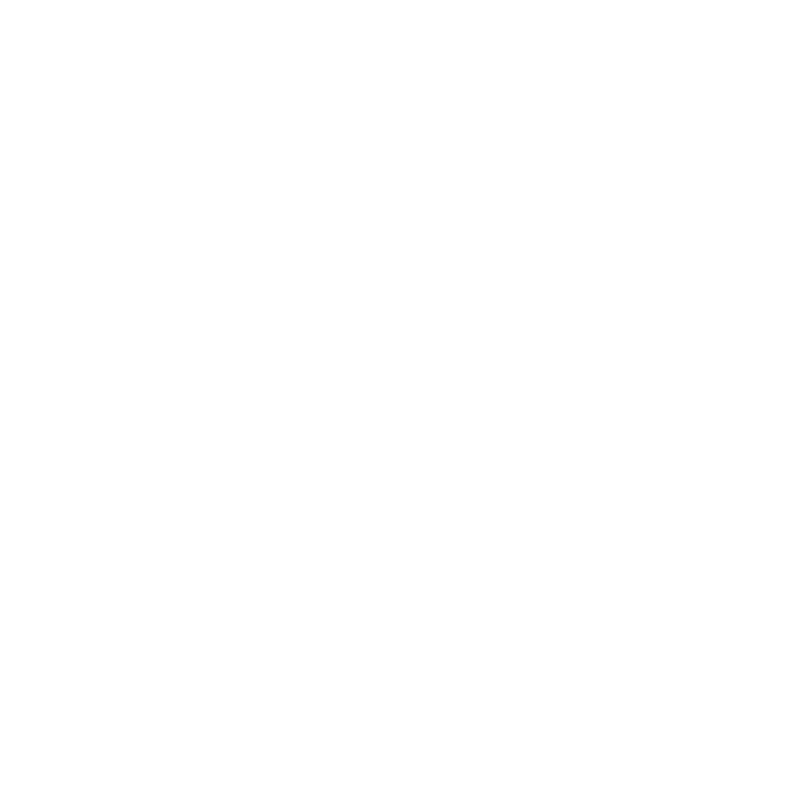

('bg:', 14205.390320338309)
('bg:', 14205.390320338309)
('bg:', 14205.390320338309)
('bg:', 14205.390320338309)
('bg:', 14205.390320338309)
('bg:', 14205.390320338309)
('bg:', 14205.390320338309)
('bg:', 14205.390320338309)


<IPython.core.display.Javascript object>


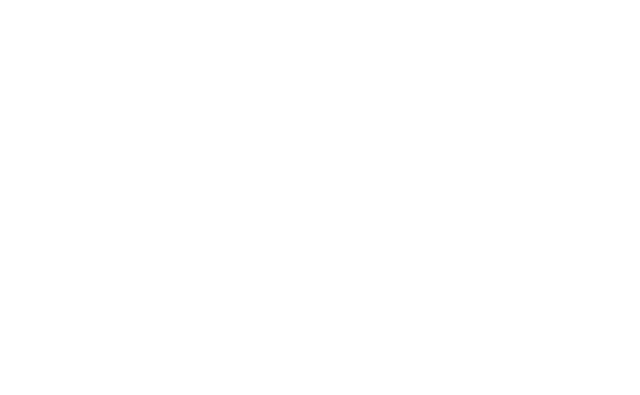

<IPython.core.display.Javascript object>


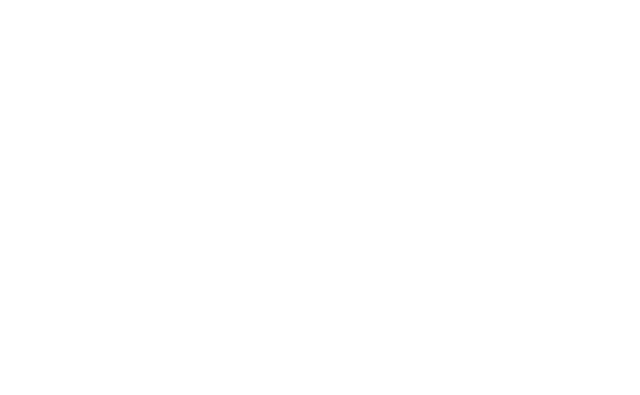

<IPython.core.display.Javascript object>


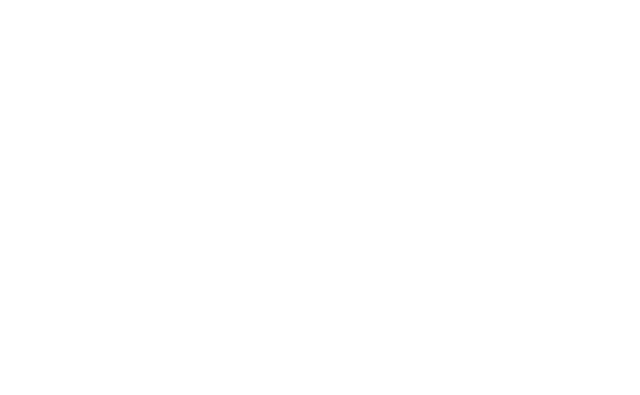

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:263: RuntimeWarning: divide by zero encountered in power


In [1106]:
#settings
ROI=4
#data_dir = "X:\\Ryan C\\Data\\DDM_Karthik\\20210715\\tif files\\Finished\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20210902\\"
#data_dir = "Y:\\Karthik_KRP\\Data\\DDM_DNA_MT\\20210902\\Philip data\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20211001\\"
#data_file = "%s_%s_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
#data_file = "%s_%s_BH-filter_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
data_file = "Trial_%s_%s%s128_FFTDIFFS_dts_ffts_ravs.p" %(video,side,ROI)
#data_file = "Trial_%s_B%s64_FFTDIFFS_dts_ffts_ravs.p" %(video, ROI)

dat = pickle.load(open(data_dir+data_file,'rb'))
ravs = dat['ravs'] 
dts  = dat['dts']
ffts = dat['ffts']
times = dts/framerate
print(dts)
print(times)

%matplotlib notebook
q_index = -1 #the last index
#backg = 2632 #change me! 
backg = np.mean(ravs[:,q_index])
pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=ravs[:,q_index],bg=backg, double=False, fps=framerate)
plt.plot(times, ravs[:,q_index],'ro') #plot the data
plt.plot(times, ddm.dTheory(times,*pars), '-k', lw=4) #see how well the initial guess performs
ax = plt.gca()
plt.text(0.8, 0.2, 'Index of q-value: %i' % q_index, horizontalalignment='center', verticalalignment='center', 
           transform=ax.transAxes, fontdict=font_plt)
plt.xlabel('Time (s)');
np.mean(ravs[:,q_index])
qq= [0.4,0.415,0.43,0.445,0.46,0.475,0.49,0.5,0.515,0.525,0.54,0.55,0.565,0.575,0.59,0.6,0.615,0.63,0.645,0.65,0.665,
         0.675,0.69,0.7,0.715,0.73,0.745,0.75,0.765,0.78,0.795,0.81,0.825,0.84,0.855,0.87,0.89,0.9,0.915,0.93,0.945,
         0.95,0.975,0.99,1.1]
pp=qq[1]

def two_rounds_fitting(data, times,pp):
    '''
    This function does two rounds of fitting. 
    First it uses SciPy's least-squares fitting:
        https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.leastsq.html
    Then, it uses the Levenberg-Marquardt method with the mpfit module. 
    '''

    pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=data, bg=backg, double=False, fps=framerate)
    #Paramters:
    # Amplitude-0, TimeConst-1, Background-2, Alpha (strtching exp), (... same for second exp..))
    minp[3]=0
    maxp[3]=2
    pars[3]=pp#CHANGE STRECTHING EXPONENT HERE
    
    maxp[2]=200000000
    minp[2]=10
    pars[2]=backg# change this to the amplitude of the q fit show in the plot above
    

    maxp[1] = 100000000000 #Decay Time Range
    minp[1] = 0.001
     
    maxp[5] = 100
    
    fix[3]= True#Fix alpha
    fix[2]= True #Fix bg
    
   
    fix[6]= False #6 is the stretching exponent for 2nd exponential
    pars[6] = 0.3
    minp[6] = 0.3 #min alpha2\n",
    maxp[6] = 1.5  #max alpha2\n",
    
    pars[5] = 0.1*pars[1] #5 is the time const for 2nd exponential
    minp[5] = 0.01
    '''
    #Leave this commented out for single exponential fits
    totamp = pars[0]+pars[4] ##0 and 4 are the amplitudes
    pars[4] = 0.4*totamp
    pars[0] = 0.4*totamp'''
    

    #The ddm.newFitLeastsq function does not check whether the parameters are within the
    #  minimum and maximum bounds. It uses SciPy's optimize.leastsq. 
    fitparams_lsq,theory_lsq = ddm.newFitLeastsq(data,times,pars,minp,maxp,lmin,lmax,fix,logfit=False)
    newPars = fitparams_lsq.copy()
    
    #We'll use the found parameters from SciPy's optimize.leastsq and feed them into the
    #  Levenberg-Marquardt function. Before we do so, we'll check that none of the found
    #  parameters are outside the min/max bounds. 
    for i,p in enumerate(fitparams_lsq):
        if p>maxp[i]:
            newPars[i] = maxp[i]*0.9
        if p<minp[i]:
            if p<0:
                newPars[i]=abs(p)
                if newPars[i]>maxp[i]:
                    newPars[i] = maxp[i]*0.9
                elif newPars[i]<minp[i]:
                    newPars[i] = minp[i]*1.1
            else:
                newPars[i] = minp[i]*1.1
                
    #Now use the Levenberg-Marquardt function. It returns the optimized paramters (fitparamsB), the 
    #  best fit (theoryB), any error codes, and the chi-squared value (the sum of squares of the error)
    fitparamsB, theoryB, errCodeB, chi2B = ddm.newFit(data,times,newPars,minp,maxp,lmin,lmax,fix,
                                                      logfit=False,quiet=True,factor=0.8)
    
    return fitparamsB, theoryB, chi2B
q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops

gg=np.zeros((11,45))

a_list=np.zeros((1,45))
for k in range(45):
    for i,q_index in enumerate([5,6,7,8,9,10,11,12,13,14,15]):
        pp=qq[k]
        fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],pp)
        gg[i,k]=chi2B
    #a_list[:,k]=sum(gg[:,k])/len(gg[:,k])
a_list=gg.mean(0)
#print(a_list)
min_ele=a_list[0]
rr=qq[0]
for i in range(1,len(a_list)):
    if a_list[i]<min_ele:
        min_ele=a_list[i]
        rr=qq[i]
print(rr)
print(min_ele)

%matplotlib notebook
plt.figure(figsize=(10,10)) #Create figure of size 10x10 (inches)

q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops
#Loop over four different q-values to do the fit
#for i,q_index in enumerate([2, 5,10,15,20,25,30,35]):
for i,q_index in enumerate([4,7,10,15,17,20,25,30]):
    fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],rr)
    #print len(theoryB)
    ax = plt.subplot(4,2,i+1) #creating 4 subplots in a 2x2 grid
    matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
    ax.semilogx(times,ravs[:,q_index],'ro',alpha=0.4)
    ax.plot(times[:len(theoryB)], theoryB, '-b',lw=3)
    ax.text(0.05,0.88,'Decay time: %.2f s' % fitparamsB[1], 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.76,'Stretching expo: %.2f, %.2f' % (fitparamsB[3], fitparamsB[6]), 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.64,'Amptlidue1: %.2f' % (fitparamsB[0]),
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel("Time (s)", fontdict=font_plt_ax)
    ax.set_title("Fit for q-index of %i. So q = %.3f 1/$\mu$m" % (q_index, q[q_index]), fontdict=font_plt_ax)
    print ("bg:", fitparamsB[2])
    plt.savefig(data_dir + "%s_%s_%s_ISFs.png" %(video,side,ROI))




# So, you have fixed the background AND changed the stretching exponent range, but your fits still seem kind of bad! You can continue onto the next steps to check out some of the other paramters. Your issue might be there!
fitparams = np.zeros((ravs.shape[1],7))
theory = np.zeros((ravs.shape[1],len(times[:end_time])))
tau = np.zeros_like(ravs[0,:]) #decay time
amp = np.zeros_like(tau) #amplitude
bg = np.zeros_like(tau) #background
alph = np.zeros_like(tau) #alpha (stretching exponent)
amp2 = np.zeros_like(tau) #amplitude
tau2 = np.zeros_like(tau) #background
alph2 = np.zeros_like(tau) #alpha (stretching exponent)
chi2 = np.zeros_like(tau)
for i in range(1,len(tau)):
    fitparams[i], theory[i], chi2[i] = two_rounds_fitting(ravs[:end_time,i], times[:end_time],rr)
    amp[i] = fitparams[i][0]
    bg[i] = fitparams[i][2]
    tau[i] = fitparams[i][1]
    alph[i] = fitparams[i][3]
    amp2[i] = fitparams[i][4]
    tau2[i] = fitparams[i][5]
    alph2[i] = fitparams[i][6]
#Plot the amplitude versus the wave vector

fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], amp[2:-1], 'ro')
ax.loglog(q[3:-1], amp2[2:-1], 'bd')
w = amp[2:-1].argmax() #argmax returns the index of the array that has the max value
q_for_max_a = q[2:-2][w]
ax.loglog(q[3:-1], bg[2:-1], 'bo') #Plot the background versus the wave vector
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("Amplitude (red); amp2 (red); bg (grn)", fontdict=font_plt_ax)

ax.text(0.2,0.7,'Max A at 1/q = %.3f' % (1.0/q_for_max_a), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);
ax.text(0.2,0.8,'Mean Background = %.3f' % (bg[4:14].mean()), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);




#Plot the str exponent versus the wave vector
fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], alph[2:-1], 'ro')
ax.loglog(q[3:-1], alph2[2:-1], 'bo')
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("stretching exponent", fontdict=font_plt_ax)









#Plot the decay time versus the wave vector
fig = plt.figure(figsize=(8,8/1.618)); ax = fig.gca(); 
#ax.loglog(q[3:-1], tau[2:-1], 'ro')
qs = q[2:-2]
qend=-1
q0=q[2:qend]
tau0 = ddm.newt(tau[2:qend],alph[2:qend])
#ax.loglog(qs, tau[2:-1], 'ro')
ax.loglog(q[3:qend], ddm.newt(tau[2:qend],alph[2:qend]),'bo') # this is for the first exponential
#ax.loglog(q[2:-31],tau[2:-30],'ro')
#ax.loglog(q[3:-30], ddm.newt(tau2[2:-30],alph2[2:-30]),'ro') # this is for the second
#ax.loglog(q[3:-30], tau2[2:-30],'go')


#aa=[0,1,2,3,4,5,6]
#bb=[10,11,12,13,14,15,16,17,18,19,20]
#Setting range of q values for fitting the data 
#for i in range(aa)
   # for j in range(bb)
minq=4
maxq=14

qmin=q[minq]
qmax=q[maxq]
new_taus=ddm.newt(tau[2:qend],alph[2:qend])

b = np.where((q>=qmin)&(q<=qmax))
ax.plot(q[b[0]+3],new_taus[b[0]],'r+',label='good q range')
#ax.plot(q[b], new_taus[b], 'r+')

ax.set_xlim(0.9,50)
ax.set_ylim(0.0001,10000)

## q^-2, does it look diffusive ?
diffusion_coeff = .1 # CHANGE DIFFUSION COEFFICIENT
power = 2.0 
ax.plot(q[1:-1], (1./diffusion_coeff) * 1./(q[1:-1]**power), '--c', label="Diffusive")


#Fitting data to a line
a = np.polyfit(np.log(q[b[0]+3]),np.log(new_taus[b[0]]), 1)

slope=a[0]
coef1 = np.exp(a[1])
alpha = 2./(-1*slope)
Dif = (1.0/coef1)**alpha
tau_fit = coef1*(q**(-2.0/alpha))
ax.plot(q, tau_fit, '-k', label = "best fit line")
plt.legend()

## does it fit some other power?
#adiffusion_coeff = .022
#power2 = 3
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')

#adiffusion_coeff = 0.018
#power2 = 1
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')


ax.text(0.55,0.15,'D = %.4f um2/s' % diffusion_coeff,
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
ax.text(3,380,"slope: %.4f" %slope)
ax.set_xlabel("q (um^-1)", fontdict=font_plt_ax)
ax.set_ylabel("tau (s)", fontdict=font_plt_ax)
ax.text(3,660,"alpha: %.4f" %alpha)
plt.savefig(data_dir+ "%s_%s_%s_Tau_vs_q.png" %(video,side,ROI))

#################################################################################################
allResults['fitparams_'+str(video)+'_'+str(ROI)] = fitparams
allResults['theory_'+str(video)+'_'+str(ROI)] = theory
allResults['chi2_'+str(video)+'_'+str(ROI)] = chi2
allResults['ravs_'+str(video)+'_'+str(ROI)] = ravs
allResults['dts'] = dts
allResults.keys()
ravs1=ravs[:,4]
ravs2=ravs[:,7]
ravs3=ravs[:,10]
ravs4=ravs[:,15]
ravs5=ravs[:,17]
ravs6=ravs[:,20]
ravs7=ravs[:,25]
ravs8=ravs[:,30]
a=[0]*(len(times)-len(q))
b=[0]*(len(times)-len(tau))
qs=np.append(q,a)
taus=np.append(tau,b)

Final_Data=np.transpose(np.vstack([times,ravs1,ravs2,ravs3,ravs4,ravs5,ravs6,ravs7,ravs8,qs,taus]))
Final_Data_1=(np.vstack([taus]))
np.savetxt(data_dir+ "onlyT_%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data_1, delimiter=',')
np.savetxt(data_dir+ "%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data, delimiter=',')
#np.savetxt('C:\\Users\\kpeddireddy\\Desktop\\test\\1_1_full_Final_Data.csv', Final_Data, delimiter=',')




import pandas as pd
df=pd.DataFrame(Final_Data_1)
df.to_csv(data_dir+ "%s_Tau_vs_q.csv" %(speed), mode='a', index=False, header=False)

[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192  193  194  196  197
  198 

<IPython.core.display.Javascript object>


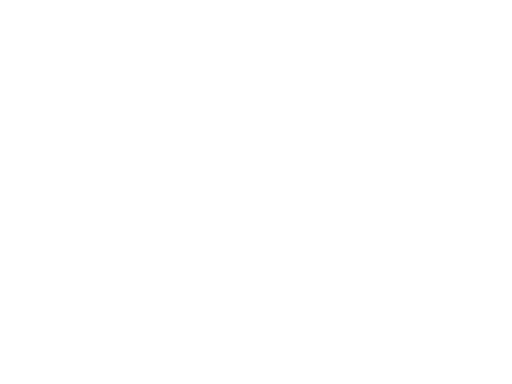

0.615
710497676.8122945


<IPython.core.display.Javascript object>


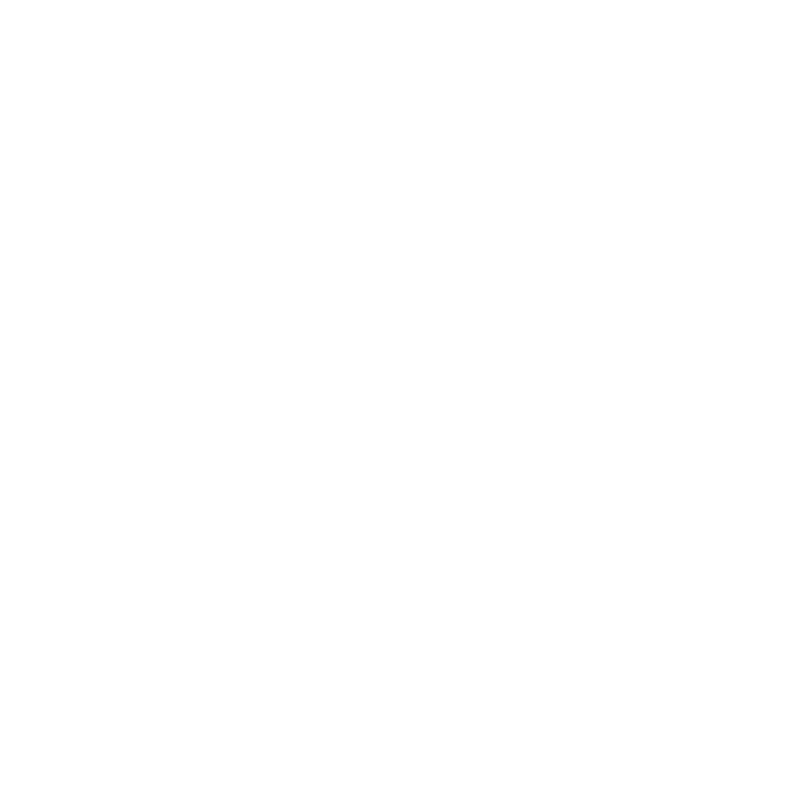

('bg:', 14208.96681878343)
('bg:', 14208.96681878343)
('bg:', 14208.96681878343)
('bg:', 14208.96681878343)
('bg:', 14208.96681878343)
('bg:', 14208.96681878343)
('bg:', 14208.96681878343)
('bg:', 14208.96681878343)


<IPython.core.display.Javascript object>


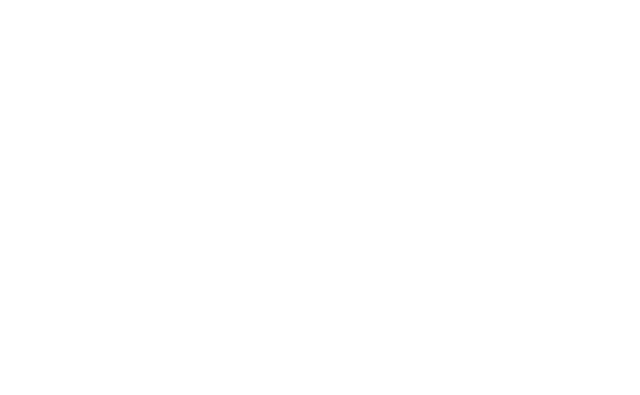

<IPython.core.display.Javascript object>


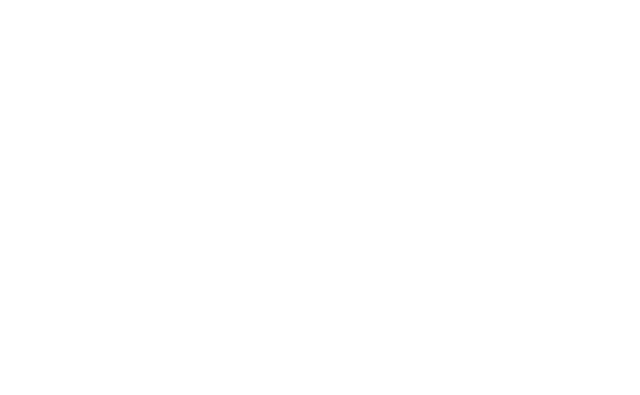

<IPython.core.display.Javascript object>


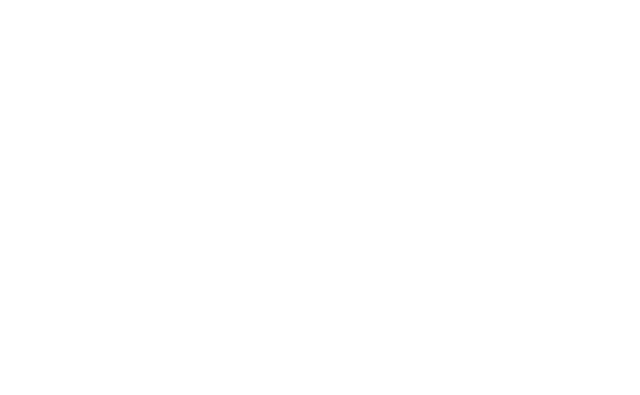

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:263: RuntimeWarning: divide by zero encountered in power


In [1107]:
#settings
ROI=5
#data_dir = "X:\\Ryan C\\Data\\DDM_Karthik\\20210715\\tif files\\Finished\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20210902\\"
#data_dir = "Y:\\Karthik_KRP\\Data\\DDM_DNA_MT\\20210902\\Philip data\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20211001\\"
#data_file = "%s_%s_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
#data_file = "%s_%s_BH-filter_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
data_file = "Trial_%s_%s%s128_FFTDIFFS_dts_ffts_ravs.p" %(video,side,ROI)
#data_file = "Trial_%s_B%s64_FFTDIFFS_dts_ffts_ravs.p" %(video, ROI)

dat = pickle.load(open(data_dir+data_file,'rb'))
ravs = dat['ravs'] 
dts  = dat['dts']
ffts = dat['ffts']
times = dts/framerate
print(dts)
print(times)

%matplotlib notebook
q_index = -1 #the last index
#backg = 2632 #change me! 
backg = np.mean(ravs[:,q_index])
pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=ravs[:,q_index],bg=backg, double=False, fps=framerate)
plt.plot(times, ravs[:,q_index],'ro') #plot the data
plt.plot(times, ddm.dTheory(times,*pars), '-k', lw=4) #see how well the initial guess performs
ax = plt.gca()
plt.text(0.8, 0.2, 'Index of q-value: %i' % q_index, horizontalalignment='center', verticalalignment='center', 
           transform=ax.transAxes, fontdict=font_plt)
plt.xlabel('Time (s)');
np.mean(ravs[:,q_index])
qq= [0.4,0.415,0.43,0.445,0.46,0.475,0.49,0.5,0.515,0.525,0.54,0.55,0.565,0.575,0.59,0.6,0.615,0.63,0.645,0.65,0.665,
         0.675,0.69,0.7,0.715,0.73,0.745,0.75,0.765,0.78,0.795,0.81,0.825,0.84,0.855,0.87,0.89,0.9,0.915,0.93,0.945,
         0.95,0.975,0.99,1.1]
pp=qq[1]

def two_rounds_fitting(data, times,pp):
    '''
    This function does two rounds of fitting. 
    First it uses SciPy's least-squares fitting:
        https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.leastsq.html
    Then, it uses the Levenberg-Marquardt method with the mpfit module. 
    '''

    pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=data, bg=backg, double=False, fps=framerate)
    #Paramters:
    # Amplitude-0, TimeConst-1, Background-2, Alpha (strtching exp), (... same for second exp..))
    minp[3]=0
    maxp[3]=2
    pars[3]=pp#CHANGE STRECTHING EXPONENT HERE
    
    maxp[2]=200000000
    minp[2]=10
    pars[2]=backg# change this to the amplitude of the q fit show in the plot above
    

    maxp[1] = 100000000000 #Decay Time Range
    minp[1] = 0.001
     
    maxp[5] = 100
    
    fix[3]= True#Fix alpha
    fix[2]= True #Fix bg
    
   
    fix[6]= False #6 is the stretching exponent for 2nd exponential
    pars[6] = 0.3
    minp[6] = 0.3 #min alpha2\n",
    maxp[6] = 1.5  #max alpha2\n",
    
    pars[5] = 0.1*pars[1] #5 is the time const for 2nd exponential
    minp[5] = 0.01
    '''
    #Leave this commented out for single exponential fits
    totamp = pars[0]+pars[4] ##0 and 4 are the amplitudes
    pars[4] = 0.4*totamp
    pars[0] = 0.4*totamp'''
    

    #The ddm.newFitLeastsq function does not check whether the parameters are within the
    #  minimum and maximum bounds. It uses SciPy's optimize.leastsq. 
    fitparams_lsq,theory_lsq = ddm.newFitLeastsq(data,times,pars,minp,maxp,lmin,lmax,fix,logfit=False)
    newPars = fitparams_lsq.copy()
    
    #We'll use the found parameters from SciPy's optimize.leastsq and feed them into the
    #  Levenberg-Marquardt function. Before we do so, we'll check that none of the found
    #  parameters are outside the min/max bounds. 
    for i,p in enumerate(fitparams_lsq):
        if p>maxp[i]:
            newPars[i] = maxp[i]*0.9
        if p<minp[i]:
            if p<0:
                newPars[i]=abs(p)
                if newPars[i]>maxp[i]:
                    newPars[i] = maxp[i]*0.9
                elif newPars[i]<minp[i]:
                    newPars[i] = minp[i]*1.1
            else:
                newPars[i] = minp[i]*1.1
                
    #Now use the Levenberg-Marquardt function. It returns the optimized paramters (fitparamsB), the 
    #  best fit (theoryB), any error codes, and the chi-squared value (the sum of squares of the error)
    fitparamsB, theoryB, errCodeB, chi2B = ddm.newFit(data,times,newPars,minp,maxp,lmin,lmax,fix,
                                                      logfit=False,quiet=True,factor=0.8)
    
    return fitparamsB, theoryB, chi2B
q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops

gg=np.zeros((11,45))

a_list=np.zeros((1,45))
for k in range(45):
    for i,q_index in enumerate([5,6,7,8,9,10,11,12,13,14,15]):
        pp=qq[k]
        fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],pp)
        gg[i,k]=chi2B
    #a_list[:,k]=sum(gg[:,k])/len(gg[:,k])
a_list=gg.mean(0)
#print(a_list)
min_ele=a_list[0]
rr=qq[0]
for i in range(1,len(a_list)):
    if a_list[i]<min_ele:
        min_ele=a_list[i]
        rr=qq[i]
print(rr)
print(min_ele)

%matplotlib notebook
plt.figure(figsize=(10,10)) #Create figure of size 10x10 (inches)

q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops
#Loop over four different q-values to do the fit
#for i,q_index in enumerate([2, 5,10,15,20,25,30,35]):
for i,q_index in enumerate([4,7,10,15,17,20,25,30]):
    fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],rr)
    #print len(theoryB)
    ax = plt.subplot(4,2,i+1) #creating 4 subplots in a 2x2 grid
    matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
    ax.semilogx(times,ravs[:,q_index],'ro',alpha=0.4)
    ax.plot(times[:len(theoryB)], theoryB, '-b',lw=3)
    ax.text(0.05,0.88,'Decay time: %.2f s' % fitparamsB[1], 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.76,'Stretching expo: %.2f, %.2f' % (fitparamsB[3], fitparamsB[6]), 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.64,'Amptlidue1: %.2f' % (fitparamsB[0]),
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel("Time (s)", fontdict=font_plt_ax)
    ax.set_title("Fit for q-index of %i. So q = %.3f 1/$\mu$m" % (q_index, q[q_index]), fontdict=font_plt_ax)
    print ("bg:", fitparamsB[2])
    plt.savefig(data_dir + "%s_%s_%s_ISFs.png" %(video,side,ROI))




# So, you have fixed the background AND changed the stretching exponent range, but your fits still seem kind of bad! You can continue onto the next steps to check out some of the other paramters. Your issue might be there!
fitparams = np.zeros((ravs.shape[1],7))
theory = np.zeros((ravs.shape[1],len(times[:end_time])))
tau = np.zeros_like(ravs[0,:]) #decay time
amp = np.zeros_like(tau) #amplitude
bg = np.zeros_like(tau) #background
alph = np.zeros_like(tau) #alpha (stretching exponent)
amp2 = np.zeros_like(tau) #amplitude
tau2 = np.zeros_like(tau) #background
alph2 = np.zeros_like(tau) #alpha (stretching exponent)
chi2 = np.zeros_like(tau)
for i in range(1,len(tau)):
    fitparams[i], theory[i], chi2[i] = two_rounds_fitting(ravs[:end_time,i], times[:end_time],rr)
    amp[i] = fitparams[i][0]
    bg[i] = fitparams[i][2]
    tau[i] = fitparams[i][1]
    alph[i] = fitparams[i][3]
    amp2[i] = fitparams[i][4]
    tau2[i] = fitparams[i][5]
    alph2[i] = fitparams[i][6]
#Plot the amplitude versus the wave vector

fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], amp[2:-1], 'ro')
ax.loglog(q[3:-1], amp2[2:-1], 'bd')
w = amp[2:-1].argmax() #argmax returns the index of the array that has the max value
q_for_max_a = q[2:-2][w]
ax.loglog(q[3:-1], bg[2:-1], 'bo') #Plot the background versus the wave vector
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("Amplitude (red); amp2 (red); bg (grn)", fontdict=font_plt_ax)

ax.text(0.2,0.7,'Max A at 1/q = %.3f' % (1.0/q_for_max_a), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);
ax.text(0.2,0.8,'Mean Background = %.3f' % (bg[4:14].mean()), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);




#Plot the str exponent versus the wave vector
fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], alph[2:-1], 'ro')
ax.loglog(q[3:-1], alph2[2:-1], 'bo')
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("stretching exponent", fontdict=font_plt_ax)









#Plot the decay time versus the wave vector
fig = plt.figure(figsize=(8,8/1.618)); ax = fig.gca(); 
#ax.loglog(q[3:-1], tau[2:-1], 'ro')
qs = q[2:-2]
qend=-1
q0=q[2:qend]
tau0 = ddm.newt(tau[2:qend],alph[2:qend])
#ax.loglog(qs, tau[2:-1], 'ro')
ax.loglog(q[3:qend], ddm.newt(tau[2:qend],alph[2:qend]),'bo') # this is for the first exponential
#ax.loglog(q[2:-31],tau[2:-30],'ro')
#ax.loglog(q[3:-30], ddm.newt(tau2[2:-30],alph2[2:-30]),'ro') # this is for the second
#ax.loglog(q[3:-30], tau2[2:-30],'go')


#aa=[0,1,2,3,4,5,6]
#bb=[10,11,12,13,14,15,16,17,18,19,20]
#Setting range of q values for fitting the data 
#for i in range(aa)
   # for j in range(bb)
minq=4
maxq=14

qmin=q[minq]
qmax=q[maxq]
new_taus=ddm.newt(tau[2:qend],alph[2:qend])

b = np.where((q>=qmin)&(q<=qmax))
ax.plot(q[b[0]+3],new_taus[b[0]],'r+',label='good q range')
#ax.plot(q[b], new_taus[b], 'r+')

ax.set_xlim(0.9,50)
ax.set_ylim(0.0001,10000)

## q^-2, does it look diffusive ?
diffusion_coeff = .1 # CHANGE DIFFUSION COEFFICIENT
power = 2.0 
ax.plot(q[1:-1], (1./diffusion_coeff) * 1./(q[1:-1]**power), '--c', label="Diffusive")


#Fitting data to a line
a = np.polyfit(np.log(q[b[0]+3]),np.log(new_taus[b[0]]), 1)

slope=a[0]
coef1 = np.exp(a[1])
alpha = 2./(-1*slope)
Dif = (1.0/coef1)**alpha
tau_fit = coef1*(q**(-2.0/alpha))
ax.plot(q, tau_fit, '-k', label = "best fit line")
plt.legend()

## does it fit some other power?
#adiffusion_coeff = .022
#power2 = 3
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')

#adiffusion_coeff = 0.018
#power2 = 1
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')


ax.text(0.55,0.15,'D = %.4f um2/s' % diffusion_coeff,
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
ax.text(3,380,"slope: %.4f" %slope)
ax.set_xlabel("q (um^-1)", fontdict=font_plt_ax)
ax.set_ylabel("tau (s)", fontdict=font_plt_ax)
ax.text(3,660,"alpha: %.4f" %alpha)
plt.savefig(data_dir+ "%s_%s_%s_Tau_vs_q.png" %(video,side,ROI))

#################################################################################################
allResults['fitparams_'+str(video)+'_'+str(ROI)] = fitparams
allResults['theory_'+str(video)+'_'+str(ROI)] = theory
allResults['chi2_'+str(video)+'_'+str(ROI)] = chi2
allResults['ravs_'+str(video)+'_'+str(ROI)] = ravs
allResults['dts'] = dts
allResults.keys()
ravs1=ravs[:,4]
ravs2=ravs[:,7]
ravs3=ravs[:,10]
ravs4=ravs[:,15]
ravs5=ravs[:,17]
ravs6=ravs[:,20]
ravs7=ravs[:,25]
ravs8=ravs[:,30]
a=[0]*(len(times)-len(q))
b=[0]*(len(times)-len(tau))
qs=np.append(q,a)
taus=np.append(tau,b)

Final_Data=np.transpose(np.vstack([times,ravs1,ravs2,ravs3,ravs4,ravs5,ravs6,ravs7,ravs8,qs,taus]))
Final_Data_1=(np.vstack([taus]))
np.savetxt(data_dir+ "onlyT_%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data_1, delimiter=',')
np.savetxt(data_dir+ "%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data, delimiter=',')
#np.savetxt('C:\\Users\\kpeddireddy\\Desktop\\test\\1_1_full_Final_Data.csv', Final_Data, delimiter=',')




import pandas as pd
df=pd.DataFrame(Final_Data_1)
df.to_csv(data_dir+ "%s_Tau_vs_q.csv" %(speed), mode='a', index=False, header=False)

[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192  193  194  196  197
  198 

<IPython.core.display.Javascript object>


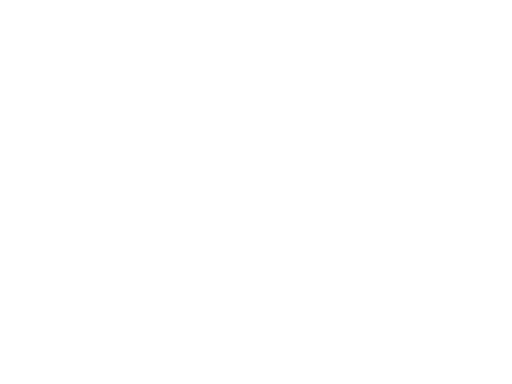

0.6
659717281.0503122


<IPython.core.display.Javascript object>


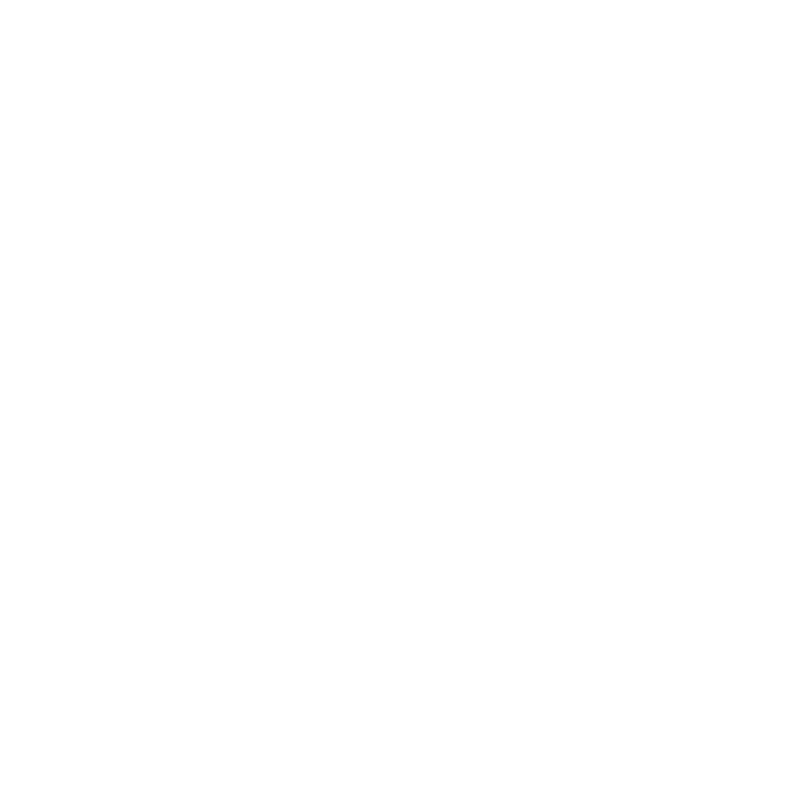

('bg:', 14161.421200320694)
('bg:', 14161.421200320694)
('bg:', 14161.421200320694)
('bg:', 14161.421200320694)
('bg:', 14161.421200320694)
('bg:', 14161.421200320694)
('bg:', 14161.421200320694)
('bg:', 14161.421200320694)


<IPython.core.display.Javascript object>


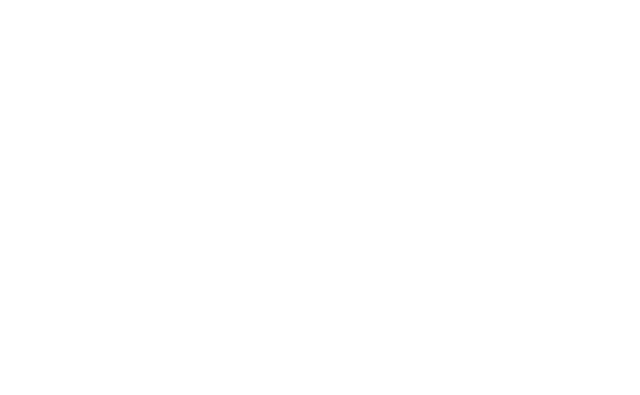

<IPython.core.display.Javascript object>


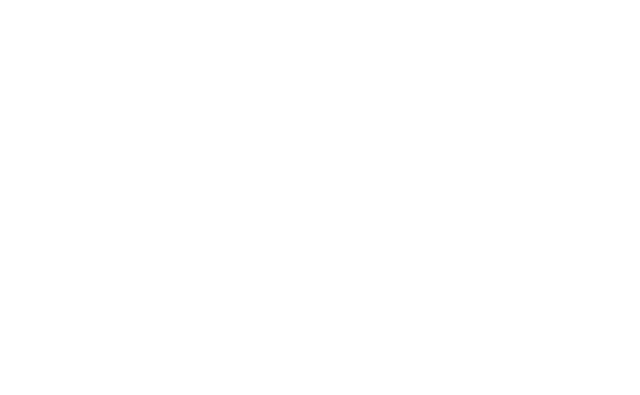

<IPython.core.display.Javascript object>


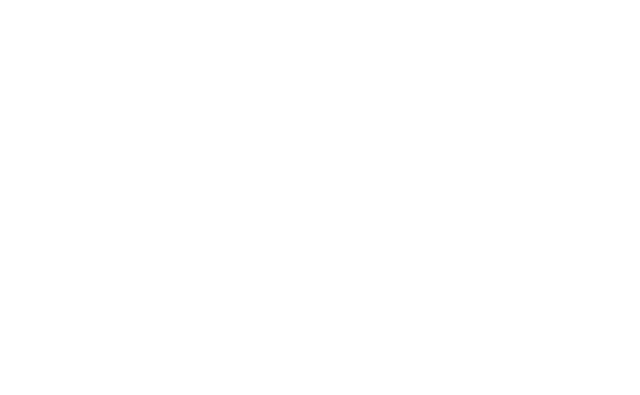

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:263: RuntimeWarning: divide by zero encountered in power


In [1108]:
#settings
ROI=6
#data_dir = "X:\\Ryan C\\Data\\DDM_Karthik\\20210715\\tif files\\Finished\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20210902\\"
#data_dir = "Y:\\Karthik_KRP\\Data\\DDM_DNA_MT\\20210902\\Philip data\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20211001\\"
#data_file = "%s_%s_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
#data_file = "%s_%s_BH-filter_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
data_file = "Trial_%s_%s%s128_FFTDIFFS_dts_ffts_ravs.p" %(video,side,ROI)
#data_file = "Trial_%s_B%s64_FFTDIFFS_dts_ffts_ravs.p" %(video, ROI)

dat = pickle.load(open(data_dir+data_file,'rb'))
ravs = dat['ravs'] 
dts  = dat['dts']
ffts = dat['ffts']
times = dts/framerate
print(dts)
print(times)

%matplotlib notebook
q_index = -1 #the last index
#backg = 2632 #change me! 
backg = np.mean(ravs[:,q_index])
pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=ravs[:,q_index],bg=backg, double=False, fps=framerate)
plt.plot(times, ravs[:,q_index],'ro') #plot the data
plt.plot(times, ddm.dTheory(times,*pars), '-k', lw=4) #see how well the initial guess performs
ax = plt.gca()
plt.text(0.8, 0.2, 'Index of q-value: %i' % q_index, horizontalalignment='center', verticalalignment='center', 
           transform=ax.transAxes, fontdict=font_plt)
plt.xlabel('Time (s)');
np.mean(ravs[:,q_index])
qq= [0.4,0.415,0.43,0.445,0.46,0.475,0.49,0.5,0.515,0.525,0.54,0.55,0.565,0.575,0.59,0.6,0.615,0.63,0.645,0.65,0.665,
         0.675,0.69,0.7,0.715,0.73,0.745,0.75,0.765,0.78,0.795,0.81,0.825,0.84,0.855,0.87,0.89,0.9,0.915,0.93,0.945,
         0.95,0.975,0.99,1.1]
pp=qq[1]

def two_rounds_fitting(data, times,pp):
    '''
    This function does two rounds of fitting. 
    First it uses SciPy's least-squares fitting:
        https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.leastsq.html
    Then, it uses the Levenberg-Marquardt method with the mpfit module. 
    '''

    pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=data, bg=backg, double=False, fps=framerate)
    #Paramters:
    # Amplitude-0, TimeConst-1, Background-2, Alpha (strtching exp), (... same for second exp..))
    minp[3]=0
    maxp[3]=2
    pars[3]=pp#CHANGE STRECTHING EXPONENT HERE
    
    maxp[2]=200000000
    minp[2]=10
    pars[2]=backg# change this to the amplitude of the q fit show in the plot above
    

    maxp[1] = 100000000000 #Decay Time Range
    minp[1] = 0.001
     
    maxp[5] = 100
    
    fix[3]= True#Fix alpha
    fix[2]= True #Fix bg
    
   
    fix[6]= False #6 is the stretching exponent for 2nd exponential
    pars[6] = 0.3
    minp[6] = 0.3 #min alpha2\n",
    maxp[6] = 1.5  #max alpha2\n",
    
    pars[5] = 0.1*pars[1] #5 is the time const for 2nd exponential
    minp[5] = 0.01
    '''
    #Leave this commented out for single exponential fits
    totamp = pars[0]+pars[4] ##0 and 4 are the amplitudes
    pars[4] = 0.4*totamp
    pars[0] = 0.4*totamp'''
    

    #The ddm.newFitLeastsq function does not check whether the parameters are within the
    #  minimum and maximum bounds. It uses SciPy's optimize.leastsq. 
    fitparams_lsq,theory_lsq = ddm.newFitLeastsq(data,times,pars,minp,maxp,lmin,lmax,fix,logfit=False)
    newPars = fitparams_lsq.copy()
    
    #We'll use the found parameters from SciPy's optimize.leastsq and feed them into the
    #  Levenberg-Marquardt function. Before we do so, we'll check that none of the found
    #  parameters are outside the min/max bounds. 
    for i,p in enumerate(fitparams_lsq):
        if p>maxp[i]:
            newPars[i] = maxp[i]*0.9
        if p<minp[i]:
            if p<0:
                newPars[i]=abs(p)
                if newPars[i]>maxp[i]:
                    newPars[i] = maxp[i]*0.9
                elif newPars[i]<minp[i]:
                    newPars[i] = minp[i]*1.1
            else:
                newPars[i] = minp[i]*1.1
                
    #Now use the Levenberg-Marquardt function. It returns the optimized paramters (fitparamsB), the 
    #  best fit (theoryB), any error codes, and the chi-squared value (the sum of squares of the error)
    fitparamsB, theoryB, errCodeB, chi2B = ddm.newFit(data,times,newPars,minp,maxp,lmin,lmax,fix,
                                                      logfit=False,quiet=True,factor=0.8)
    
    return fitparamsB, theoryB, chi2B
q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops

gg=np.zeros((11,45))

a_list=np.zeros((1,45))
for k in range(45):
    for i,q_index in enumerate([5,6,7,8,9,10,11,12,13,14,15]):
        pp=qq[k]
        fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],pp)
        gg[i,k]=chi2B
    #a_list[:,k]=sum(gg[:,k])/len(gg[:,k])
a_list=gg.mean(0)
#print(a_list)
min_ele=a_list[0]
rr=qq[0]
for i in range(1,len(a_list)):
    if a_list[i]<min_ele:
        min_ele=a_list[i]
        rr=qq[i]
print(rr)
print(min_ele)

%matplotlib notebook
plt.figure(figsize=(10,10)) #Create figure of size 10x10 (inches)

q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops
#Loop over four different q-values to do the fit
#for i,q_index in enumerate([2, 5,10,15,20,25,30,35]):
for i,q_index in enumerate([4,7,10,15,17,20,25,30]):
    fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],rr)
    #print len(theoryB)
    ax = plt.subplot(4,2,i+1) #creating 4 subplots in a 2x2 grid
    matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
    ax.semilogx(times,ravs[:,q_index],'ro',alpha=0.4)
    ax.plot(times[:len(theoryB)], theoryB, '-b',lw=3)
    ax.text(0.05,0.88,'Decay time: %.2f s' % fitparamsB[1], 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.76,'Stretching expo: %.2f, %.2f' % (fitparamsB[3], fitparamsB[6]), 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.64,'Amptlidue1: %.2f' % (fitparamsB[0]),
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel("Time (s)", fontdict=font_plt_ax)
    ax.set_title("Fit for q-index of %i. So q = %.3f 1/$\mu$m" % (q_index, q[q_index]), fontdict=font_plt_ax)
    print ("bg:", fitparamsB[2])
    plt.savefig(data_dir + "%s_%s_%s_ISFs.png" %(video,side,ROI))




# So, you have fixed the background AND changed the stretching exponent range, but your fits still seem kind of bad! You can continue onto the next steps to check out some of the other paramters. Your issue might be there!
fitparams = np.zeros((ravs.shape[1],7))
theory = np.zeros((ravs.shape[1],len(times[:end_time])))
tau = np.zeros_like(ravs[0,:]) #decay time
amp = np.zeros_like(tau) #amplitude
bg = np.zeros_like(tau) #background
alph = np.zeros_like(tau) #alpha (stretching exponent)
amp2 = np.zeros_like(tau) #amplitude
tau2 = np.zeros_like(tau) #background
alph2 = np.zeros_like(tau) #alpha (stretching exponent)
chi2 = np.zeros_like(tau)
for i in range(1,len(tau)):
    fitparams[i], theory[i], chi2[i] = two_rounds_fitting(ravs[:end_time,i], times[:end_time],rr)
    amp[i] = fitparams[i][0]
    bg[i] = fitparams[i][2]
    tau[i] = fitparams[i][1]
    alph[i] = fitparams[i][3]
    amp2[i] = fitparams[i][4]
    tau2[i] = fitparams[i][5]
    alph2[i] = fitparams[i][6]
#Plot the amplitude versus the wave vector

fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], amp[2:-1], 'ro')
ax.loglog(q[3:-1], amp2[2:-1], 'bd')
w = amp[2:-1].argmax() #argmax returns the index of the array that has the max value
q_for_max_a = q[2:-2][w]
ax.loglog(q[3:-1], bg[2:-1], 'bo') #Plot the background versus the wave vector
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("Amplitude (red); amp2 (red); bg (grn)", fontdict=font_plt_ax)

ax.text(0.2,0.7,'Max A at 1/q = %.3f' % (1.0/q_for_max_a), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);
ax.text(0.2,0.8,'Mean Background = %.3f' % (bg[4:14].mean()), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);




#Plot the str exponent versus the wave vector
fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], alph[2:-1], 'ro')
ax.loglog(q[3:-1], alph2[2:-1], 'bo')
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("stretching exponent", fontdict=font_plt_ax)









#Plot the decay time versus the wave vector
fig = plt.figure(figsize=(8,8/1.618)); ax = fig.gca(); 
#ax.loglog(q[3:-1], tau[2:-1], 'ro')
qs = q[2:-2]
qend=-1
q0=q[2:qend]
tau0 = ddm.newt(tau[2:qend],alph[2:qend])
#ax.loglog(qs, tau[2:-1], 'ro')
ax.loglog(q[3:qend], ddm.newt(tau[2:qend],alph[2:qend]),'bo') # this is for the first exponential
#ax.loglog(q[2:-31],tau[2:-30],'ro')
#ax.loglog(q[3:-30], ddm.newt(tau2[2:-30],alph2[2:-30]),'ro') # this is for the second
#ax.loglog(q[3:-30], tau2[2:-30],'go')


#aa=[0,1,2,3,4,5,6]
#bb=[10,11,12,13,14,15,16,17,18,19,20]
#Setting range of q values for fitting the data 
#for i in range(aa)
   # for j in range(bb)
minq=4
maxq=14

qmin=q[minq]
qmax=q[maxq]
new_taus=ddm.newt(tau[2:qend],alph[2:qend])

b = np.where((q>=qmin)&(q<=qmax))
ax.plot(q[b[0]+3],new_taus[b[0]],'r+',label='good q range')
#ax.plot(q[b], new_taus[b], 'r+')

ax.set_xlim(0.9,50)
ax.set_ylim(0.0001,10000)

## q^-2, does it look diffusive ?
diffusion_coeff = .1 # CHANGE DIFFUSION COEFFICIENT
power = 2.0 
ax.plot(q[1:-1], (1./diffusion_coeff) * 1./(q[1:-1]**power), '--c', label="Diffusive")


#Fitting data to a line
a = np.polyfit(np.log(q[b[0]+3]),np.log(new_taus[b[0]]), 1)

slope=a[0]
coef1 = np.exp(a[1])
alpha = 2./(-1*slope)
Dif = (1.0/coef1)**alpha
tau_fit = coef1*(q**(-2.0/alpha))
ax.plot(q, tau_fit, '-k', label = "best fit line")
plt.legend()

## does it fit some other power?
#adiffusion_coeff = .022
#power2 = 3
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')

#adiffusion_coeff = 0.018
#power2 = 1
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')


ax.text(0.55,0.15,'D = %.4f um2/s' % diffusion_coeff,
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
ax.text(3,380,"slope: %.4f" %slope)
ax.set_xlabel("q (um^-1)", fontdict=font_plt_ax)
ax.set_ylabel("tau (s)", fontdict=font_plt_ax)
ax.text(3,660,"alpha: %.4f" %alpha)
plt.savefig(data_dir+ "%s_%s_%s_Tau_vs_q.png" %(video,side,ROI))

#################################################################################################
allResults['fitparams_'+str(video)+'_'+str(ROI)] = fitparams
allResults['theory_'+str(video)+'_'+str(ROI)] = theory
allResults['chi2_'+str(video)+'_'+str(ROI)] = chi2
allResults['ravs_'+str(video)+'_'+str(ROI)] = ravs
allResults['dts'] = dts
allResults.keys()
ravs1=ravs[:,4]
ravs2=ravs[:,7]
ravs3=ravs[:,10]
ravs4=ravs[:,15]
ravs5=ravs[:,17]
ravs6=ravs[:,20]
ravs7=ravs[:,25]
ravs8=ravs[:,30]
a=[0]*(len(times)-len(q))
b=[0]*(len(times)-len(tau))
qs=np.append(q,a)
taus=np.append(tau,b)

Final_Data=np.transpose(np.vstack([times,ravs1,ravs2,ravs3,ravs4,ravs5,ravs6,ravs7,ravs8,qs,taus]))
Final_Data_1=(np.vstack([taus]))
np.savetxt(data_dir+ "onlyT_%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data_1, delimiter=',')
np.savetxt(data_dir+ "%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data, delimiter=',')
#np.savetxt('C:\\Users\\kpeddireddy\\Desktop\\test\\1_1_full_Final_Data.csv', Final_Data, delimiter=',')




import pandas as pd
df=pd.DataFrame(Final_Data_1)
df.to_csv(data_dir+ "%s_Tau_vs_q.csv" %(speed), mode='a', index=False, header=False)

[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192  193  194  196  197
  198 

<IPython.core.display.Javascript object>


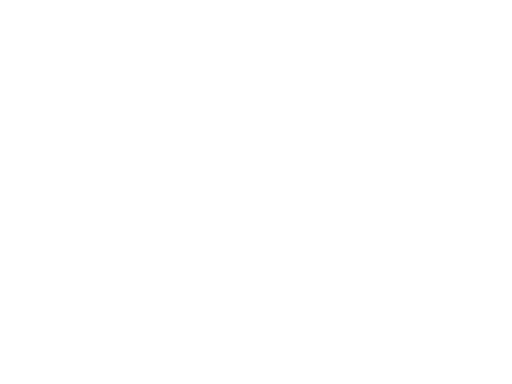

0.59
676404718.4543862


<IPython.core.display.Javascript object>


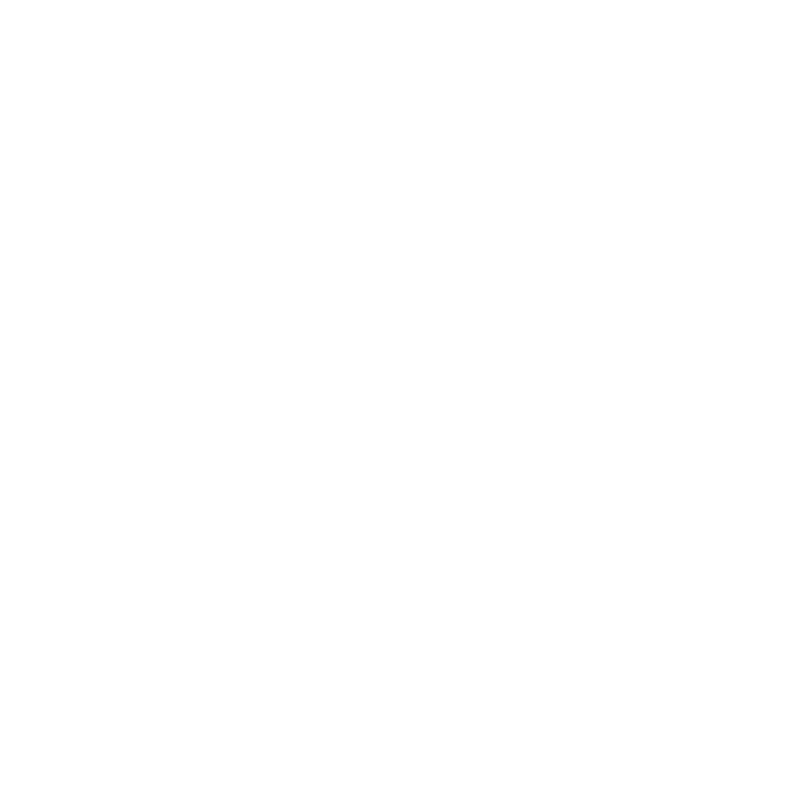

('bg:', 14196.996966311039)
('bg:', 14196.996966311039)
('bg:', 14196.996966311039)
('bg:', 14196.996966311039)
('bg:', 14196.996966311039)
('bg:', 14196.996966311039)
('bg:', 14196.996966311039)
('bg:', 14196.996966311039)


<IPython.core.display.Javascript object>


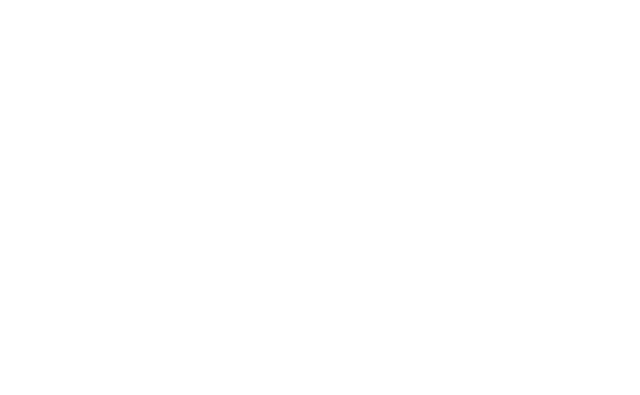

<IPython.core.display.Javascript object>


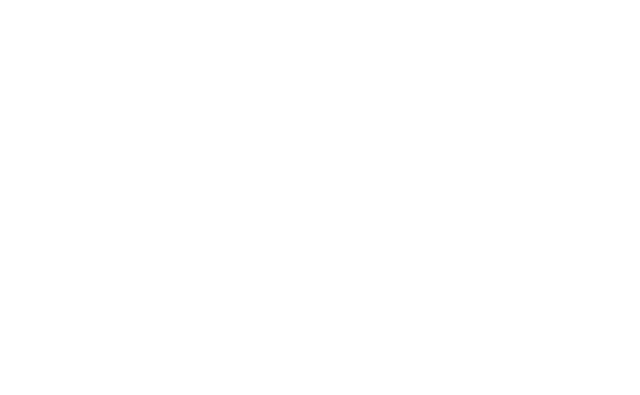

<IPython.core.display.Javascript object>


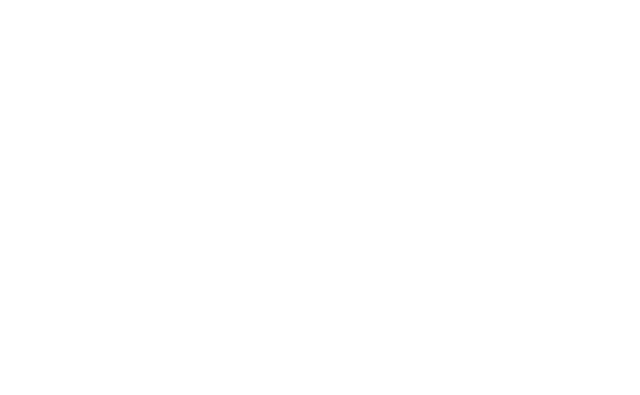

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:263: RuntimeWarning: divide by zero encountered in power


In [1109]:
#settings
ROI=7
#data_dir = "X:\\Ryan C\\Data\\DDM_Karthik\\20210715\\tif files\\Finished\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20210902\\"
#data_dir = "Y:\\Karthik_KRP\\Data\\DDM_DNA_MT\\20210902\\Philip data\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20211001\\"
#data_file = "%s_%s_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
#data_file = "%s_%s_BH-filter_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
data_file = "Trial_%s_%s%s128_FFTDIFFS_dts_ffts_ravs.p" %(video,side,ROI)
#data_file = "Trial_%s_B%s64_FFTDIFFS_dts_ffts_ravs.p" %(video, ROI)

dat = pickle.load(open(data_dir+data_file,'rb'))
ravs = dat['ravs'] 
dts  = dat['dts']
ffts = dat['ffts']
times = dts/framerate
print(dts)
print(times)

%matplotlib notebook
q_index = -1 #the last index
#backg = 2632 #change me! 
backg = np.mean(ravs[:,q_index])
pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=ravs[:,q_index],bg=backg, double=False, fps=framerate)
plt.plot(times, ravs[:,q_index],'ro') #plot the data
plt.plot(times, ddm.dTheory(times,*pars), '-k', lw=4) #see how well the initial guess performs
ax = plt.gca()
plt.text(0.8, 0.2, 'Index of q-value: %i' % q_index, horizontalalignment='center', verticalalignment='center', 
           transform=ax.transAxes, fontdict=font_plt)
plt.xlabel('Time (s)');
np.mean(ravs[:,q_index])
qq= [0.4,0.415,0.43,0.445,0.46,0.475,0.49,0.5,0.515,0.525,0.54,0.55,0.565,0.575,0.59,0.6,0.615,0.63,0.645,0.65,0.665,
         0.675,0.69,0.7,0.715,0.73,0.745,0.75,0.765,0.78,0.795,0.81,0.825,0.84,0.855,0.87,0.89,0.9,0.915,0.93,0.945,
         0.95,0.975,0.99,1.1]
pp=qq[1]

def two_rounds_fitting(data, times,pp):
    '''
    This function does two rounds of fitting. 
    First it uses SciPy's least-squares fitting:
        https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.leastsq.html
    Then, it uses the Levenberg-Marquardt method with the mpfit module. 
    '''

    pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=data, bg=backg, double=False, fps=framerate)
    #Paramters:
    # Amplitude-0, TimeConst-1, Background-2, Alpha (strtching exp), (... same for second exp..))
    minp[3]=0
    maxp[3]=2
    pars[3]=pp#CHANGE STRECTHING EXPONENT HERE
    
    maxp[2]=200000000
    minp[2]=10
    pars[2]=backg# change this to the amplitude of the q fit show in the plot above
    

    maxp[1] = 100000000000 #Decay Time Range
    minp[1] = 0.001
     
    maxp[5] = 100
    
    fix[3]= True#Fix alpha
    fix[2]= True #Fix bg
    
   
    fix[6]= False #6 is the stretching exponent for 2nd exponential
    pars[6] = 0.3
    minp[6] = 0.3 #min alpha2\n",
    maxp[6] = 1.5  #max alpha2\n",
    
    pars[5] = 0.1*pars[1] #5 is the time const for 2nd exponential
    minp[5] = 0.01
    '''
    #Leave this commented out for single exponential fits
    totamp = pars[0]+pars[4] ##0 and 4 are the amplitudes
    pars[4] = 0.4*totamp
    pars[0] = 0.4*totamp'''
    

    #The ddm.newFitLeastsq function does not check whether the parameters are within the
    #  minimum and maximum bounds. It uses SciPy's optimize.leastsq. 
    fitparams_lsq,theory_lsq = ddm.newFitLeastsq(data,times,pars,minp,maxp,lmin,lmax,fix,logfit=False)
    newPars = fitparams_lsq.copy()
    
    #We'll use the found parameters from SciPy's optimize.leastsq and feed them into the
    #  Levenberg-Marquardt function. Before we do so, we'll check that none of the found
    #  parameters are outside the min/max bounds. 
    for i,p in enumerate(fitparams_lsq):
        if p>maxp[i]:
            newPars[i] = maxp[i]*0.9
        if p<minp[i]:
            if p<0:
                newPars[i]=abs(p)
                if newPars[i]>maxp[i]:
                    newPars[i] = maxp[i]*0.9
                elif newPars[i]<minp[i]:
                    newPars[i] = minp[i]*1.1
            else:
                newPars[i] = minp[i]*1.1
                
    #Now use the Levenberg-Marquardt function. It returns the optimized paramters (fitparamsB), the 
    #  best fit (theoryB), any error codes, and the chi-squared value (the sum of squares of the error)
    fitparamsB, theoryB, errCodeB, chi2B = ddm.newFit(data,times,newPars,minp,maxp,lmin,lmax,fix,
                                                      logfit=False,quiet=True,factor=0.8)
    
    return fitparamsB, theoryB, chi2B
q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops

gg=np.zeros((11,45))

a_list=np.zeros((1,45))
for k in range(45):
    for i,q_index in enumerate([5,6,7,8,9,10,11,12,13,14,15]):
        pp=qq[k]
        fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],pp)
        gg[i,k]=chi2B
    #a_list[:,k]=sum(gg[:,k])/len(gg[:,k])
a_list=gg.mean(0)
#print(a_list)
min_ele=a_list[0]
rr=qq[0]
for i in range(1,len(a_list)):
    if a_list[i]<min_ele:
        min_ele=a_list[i]
        rr=qq[i]
print(rr)
print(min_ele)

%matplotlib notebook
plt.figure(figsize=(10,10)) #Create figure of size 10x10 (inches)

q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops
#Loop over four different q-values to do the fit
#for i,q_index in enumerate([2, 5,10,15,20,25,30,35]):
for i,q_index in enumerate([4,7,10,15,17,20,25,30]):
    fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],rr)
    #print len(theoryB)
    ax = plt.subplot(4,2,i+1) #creating 4 subplots in a 2x2 grid
    matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
    ax.semilogx(times,ravs[:,q_index],'ro',alpha=0.4)
    ax.plot(times[:len(theoryB)], theoryB, '-b',lw=3)
    ax.text(0.05,0.88,'Decay time: %.2f s' % fitparamsB[1], 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.76,'Stretching expo: %.2f, %.2f' % (fitparamsB[3], fitparamsB[6]), 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.64,'Amptlidue1: %.2f' % (fitparamsB[0]),
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel("Time (s)", fontdict=font_plt_ax)
    ax.set_title("Fit for q-index of %i. So q = %.3f 1/$\mu$m" % (q_index, q[q_index]), fontdict=font_plt_ax)
    print ("bg:", fitparamsB[2])
    plt.savefig(data_dir + "%s_%s_%s_ISFs.png" %(video,side,ROI))




# So, you have fixed the background AND changed the stretching exponent range, but your fits still seem kind of bad! You can continue onto the next steps to check out some of the other paramters. Your issue might be there!
fitparams = np.zeros((ravs.shape[1],7))
theory = np.zeros((ravs.shape[1],len(times[:end_time])))
tau = np.zeros_like(ravs[0,:]) #decay time
amp = np.zeros_like(tau) #amplitude
bg = np.zeros_like(tau) #background
alph = np.zeros_like(tau) #alpha (stretching exponent)
amp2 = np.zeros_like(tau) #amplitude
tau2 = np.zeros_like(tau) #background
alph2 = np.zeros_like(tau) #alpha (stretching exponent)
chi2 = np.zeros_like(tau)
for i in range(1,len(tau)):
    fitparams[i], theory[i], chi2[i] = two_rounds_fitting(ravs[:end_time,i], times[:end_time],rr)
    amp[i] = fitparams[i][0]
    bg[i] = fitparams[i][2]
    tau[i] = fitparams[i][1]
    alph[i] = fitparams[i][3]
    amp2[i] = fitparams[i][4]
    tau2[i] = fitparams[i][5]
    alph2[i] = fitparams[i][6]
#Plot the amplitude versus the wave vector

fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], amp[2:-1], 'ro')
ax.loglog(q[3:-1], amp2[2:-1], 'bd')
w = amp[2:-1].argmax() #argmax returns the index of the array that has the max value
q_for_max_a = q[2:-2][w]
ax.loglog(q[3:-1], bg[2:-1], 'bo') #Plot the background versus the wave vector
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("Amplitude (red); amp2 (red); bg (grn)", fontdict=font_plt_ax)

ax.text(0.2,0.7,'Max A at 1/q = %.3f' % (1.0/q_for_max_a), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);
ax.text(0.2,0.8,'Mean Background = %.3f' % (bg[4:14].mean()), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);




#Plot the str exponent versus the wave vector
fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], alph[2:-1], 'ro')
ax.loglog(q[3:-1], alph2[2:-1], 'bo')
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("stretching exponent", fontdict=font_plt_ax)









#Plot the decay time versus the wave vector
fig = plt.figure(figsize=(8,8/1.618)); ax = fig.gca(); 
#ax.loglog(q[3:-1], tau[2:-1], 'ro')
qs = q[2:-2]
qend=-1
q0=q[2:qend]
tau0 = ddm.newt(tau[2:qend],alph[2:qend])
#ax.loglog(qs, tau[2:-1], 'ro')
ax.loglog(q[3:qend], ddm.newt(tau[2:qend],alph[2:qend]),'bo') # this is for the first exponential
#ax.loglog(q[2:-31],tau[2:-30],'ro')
#ax.loglog(q[3:-30], ddm.newt(tau2[2:-30],alph2[2:-30]),'ro') # this is for the second
#ax.loglog(q[3:-30], tau2[2:-30],'go')


#aa=[0,1,2,3,4,5,6]
#bb=[10,11,12,13,14,15,16,17,18,19,20]
#Setting range of q values for fitting the data 
#for i in range(aa)
   # for j in range(bb)
minq=4
maxq=14

qmin=q[minq]
qmax=q[maxq]
new_taus=ddm.newt(tau[2:qend],alph[2:qend])

b = np.where((q>=qmin)&(q<=qmax))
ax.plot(q[b[0]+3],new_taus[b[0]],'r+',label='good q range')
#ax.plot(q[b], new_taus[b], 'r+')

ax.set_xlim(0.9,50)
ax.set_ylim(0.0001,10000)

## q^-2, does it look diffusive ?
diffusion_coeff = .1 # CHANGE DIFFUSION COEFFICIENT
power = 2.0 
ax.plot(q[1:-1], (1./diffusion_coeff) * 1./(q[1:-1]**power), '--c', label="Diffusive")


#Fitting data to a line
a = np.polyfit(np.log(q[b[0]+3]),np.log(new_taus[b[0]]), 1)

slope=a[0]
coef1 = np.exp(a[1])
alpha = 2./(-1*slope)
Dif = (1.0/coef1)**alpha
tau_fit = coef1*(q**(-2.0/alpha))
ax.plot(q, tau_fit, '-k', label = "best fit line")
plt.legend()

## does it fit some other power?
#adiffusion_coeff = .022
#power2 = 3
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')

#adiffusion_coeff = 0.018
#power2 = 1
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')


ax.text(0.55,0.15,'D = %.4f um2/s' % diffusion_coeff,
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
ax.text(3,380,"slope: %.4f" %slope)
ax.set_xlabel("q (um^-1)", fontdict=font_plt_ax)
ax.set_ylabel("tau (s)", fontdict=font_plt_ax)
ax.text(3,660,"alpha: %.4f" %alpha)
plt.savefig(data_dir+ "%s_%s_%s_Tau_vs_q.png" %(video,side,ROI))

#################################################################################################
allResults['fitparams_'+str(video)+'_'+str(ROI)] = fitparams
allResults['theory_'+str(video)+'_'+str(ROI)] = theory
allResults['chi2_'+str(video)+'_'+str(ROI)] = chi2
allResults['ravs_'+str(video)+'_'+str(ROI)] = ravs
allResults['dts'] = dts
allResults.keys()
ravs1=ravs[:,4]
ravs2=ravs[:,7]
ravs3=ravs[:,10]
ravs4=ravs[:,15]
ravs5=ravs[:,17]
ravs6=ravs[:,20]
ravs7=ravs[:,25]
ravs8=ravs[:,30]
a=[0]*(len(times)-len(q))
b=[0]*(len(times)-len(tau))
qs=np.append(q,a)
taus=np.append(tau,b)

Final_Data=np.transpose(np.vstack([times,ravs1,ravs2,ravs3,ravs4,ravs5,ravs6,ravs7,ravs8,qs,taus]))
Final_Data_1=(np.vstack([taus]))
np.savetxt(data_dir+ "onlyT_%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data_1, delimiter=',')
np.savetxt(data_dir+ "%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data, delimiter=',')
#np.savetxt('C:\\Users\\kpeddireddy\\Desktop\\test\\1_1_full_Final_Data.csv', Final_Data, delimiter=',')




import pandas as pd
df=pd.DataFrame(Final_Data_1)
df.to_csv(data_dir+ "%s_Tau_vs_q.csv" %(speed), mode='a', index=False, header=False)

[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192  193  194  196  197
  198 

<IPython.core.display.Javascript object>


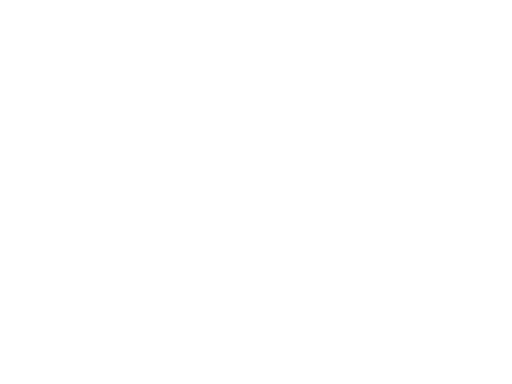

0.615
694919499.2636311


<IPython.core.display.Javascript object>


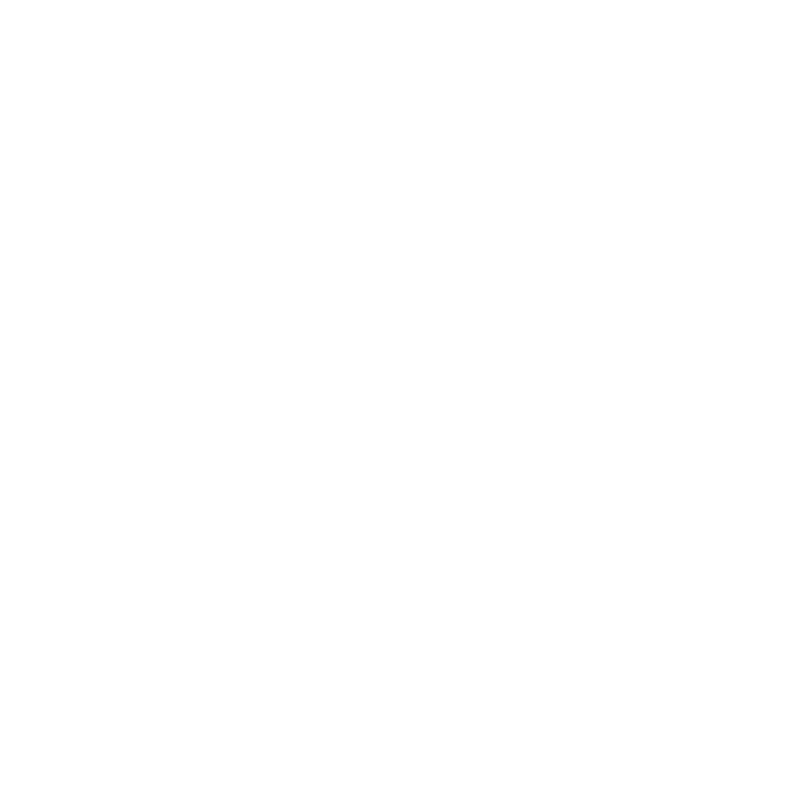

('bg:', 14254.180461359296)
('bg:', 14254.180461359296)
('bg:', 14254.180461359296)
('bg:', 14254.180461359296)
('bg:', 14254.180461359296)
('bg:', 14254.180461359296)
('bg:', 14254.180461359296)
('bg:', 14254.180461359296)


<IPython.core.display.Javascript object>


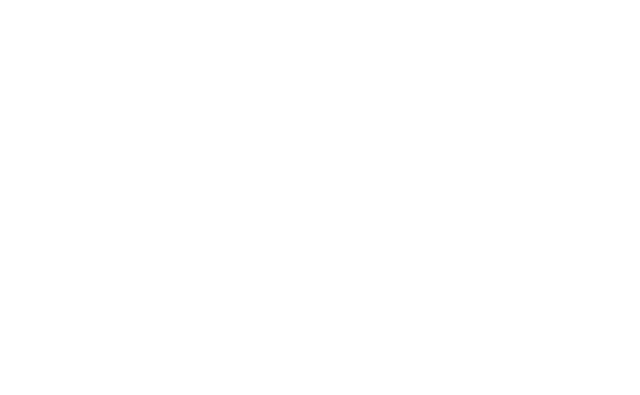

<IPython.core.display.Javascript object>


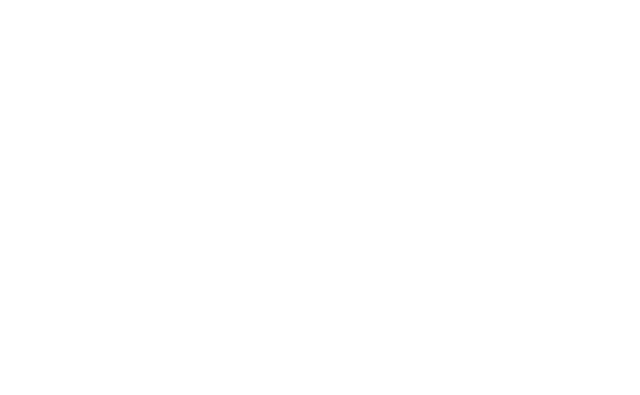

<IPython.core.display.Javascript object>


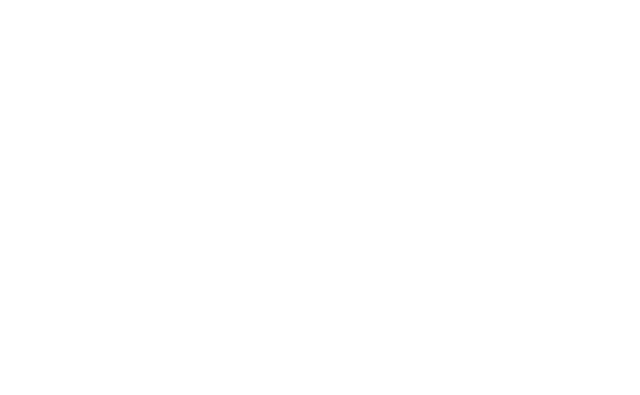

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:263: RuntimeWarning: divide by zero encountered in power


In [1110]:
#settings
ROI=8
#data_dir = "X:\\Ryan C\\Data\\DDM_Karthik\\20210715\\tif files\\Finished\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20210902\\"
#data_dir = "Y:\\Karthik_KRP\\Data\\DDM_DNA_MT\\20210902\\Philip data\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20211001\\"
#data_file = "%s_%s_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
#data_file = "%s_%s_BH-filter_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
data_file = "Trial_%s_%s%s128_FFTDIFFS_dts_ffts_ravs.p" %(video,side,ROI)
#data_file = "Trial_%s_B%s64_FFTDIFFS_dts_ffts_ravs.p" %(video, ROI)

dat = pickle.load(open(data_dir+data_file,'rb'))
ravs = dat['ravs'] 
dts  = dat['dts']
ffts = dat['ffts']
times = dts/framerate
print(dts)
print(times)

%matplotlib notebook
q_index = -1 #the last index
#backg = 2632 #change me! 
backg = np.mean(ravs[:,q_index])
pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=ravs[:,q_index],bg=backg, double=False, fps=framerate)
plt.plot(times, ravs[:,q_index],'ro') #plot the data
plt.plot(times, ddm.dTheory(times,*pars), '-k', lw=4) #see how well the initial guess performs
ax = plt.gca()
plt.text(0.8, 0.2, 'Index of q-value: %i' % q_index, horizontalalignment='center', verticalalignment='center', 
           transform=ax.transAxes, fontdict=font_plt)
plt.xlabel('Time (s)');
np.mean(ravs[:,q_index])
qq= [0.4,0.415,0.43,0.445,0.46,0.475,0.49,0.5,0.515,0.525,0.54,0.55,0.565,0.575,0.59,0.6,0.615,0.63,0.645,0.65,0.665,
         0.675,0.69,0.7,0.715,0.73,0.745,0.75,0.765,0.78,0.795,0.81,0.825,0.84,0.855,0.87,0.89,0.9,0.915,0.93,0.945,
         0.95,0.975,0.99,1.1]
pp=qq[1]

def two_rounds_fitting(data, times,pp):
    '''
    This function does two rounds of fitting. 
    First it uses SciPy's least-squares fitting:
        https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.leastsq.html
    Then, it uses the Levenberg-Marquardt method with the mpfit module. 
    '''

    pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=data, bg=backg, double=False, fps=framerate)
    #Paramters:
    # Amplitude-0, TimeConst-1, Background-2, Alpha (strtching exp), (... same for second exp..))
    minp[3]=0
    maxp[3]=2
    pars[3]=pp#CHANGE STRECTHING EXPONENT HERE
    
    maxp[2]=200000000
    minp[2]=10
    pars[2]=backg# change this to the amplitude of the q fit show in the plot above
    

    maxp[1] = 100000000000 #Decay Time Range
    minp[1] = 0.001
     
    maxp[5] = 100
    
    fix[3]= True#Fix alpha
    fix[2]= True #Fix bg
    
   
    fix[6]= False #6 is the stretching exponent for 2nd exponential
    pars[6] = 0.3
    minp[6] = 0.3 #min alpha2\n",
    maxp[6] = 1.5  #max alpha2\n",
    
    pars[5] = 0.1*pars[1] #5 is the time const for 2nd exponential
    minp[5] = 0.01
    '''
    #Leave this commented out for single exponential fits
    totamp = pars[0]+pars[4] ##0 and 4 are the amplitudes
    pars[4] = 0.4*totamp
    pars[0] = 0.4*totamp'''
    

    #The ddm.newFitLeastsq function does not check whether the parameters are within the
    #  minimum and maximum bounds. It uses SciPy's optimize.leastsq. 
    fitparams_lsq,theory_lsq = ddm.newFitLeastsq(data,times,pars,minp,maxp,lmin,lmax,fix,logfit=False)
    newPars = fitparams_lsq.copy()
    
    #We'll use the found parameters from SciPy's optimize.leastsq and feed them into the
    #  Levenberg-Marquardt function. Before we do so, we'll check that none of the found
    #  parameters are outside the min/max bounds. 
    for i,p in enumerate(fitparams_lsq):
        if p>maxp[i]:
            newPars[i] = maxp[i]*0.9
        if p<minp[i]:
            if p<0:
                newPars[i]=abs(p)
                if newPars[i]>maxp[i]:
                    newPars[i] = maxp[i]*0.9
                elif newPars[i]<minp[i]:
                    newPars[i] = minp[i]*1.1
            else:
                newPars[i] = minp[i]*1.1
                
    #Now use the Levenberg-Marquardt function. It returns the optimized paramters (fitparamsB), the 
    #  best fit (theoryB), any error codes, and the chi-squared value (the sum of squares of the error)
    fitparamsB, theoryB, errCodeB, chi2B = ddm.newFit(data,times,newPars,minp,maxp,lmin,lmax,fix,
                                                      logfit=False,quiet=True,factor=0.8)
    
    return fitparamsB, theoryB, chi2B
q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops

gg=np.zeros((11,45))

a_list=np.zeros((1,45))
for k in range(45):
    for i,q_index in enumerate([5,6,7,8,9,10,11,12,13,14,15]):
        pp=qq[k]
        fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],pp)
        gg[i,k]=chi2B
    #a_list[:,k]=sum(gg[:,k])/len(gg[:,k])
a_list=gg.mean(0)
#print(a_list)
min_ele=a_list[0]
rr=qq[0]
for i in range(1,len(a_list)):
    if a_list[i]<min_ele:
        min_ele=a_list[i]
        rr=qq[i]
print(rr)
print(min_ele)

%matplotlib notebook
plt.figure(figsize=(10,10)) #Create figure of size 10x10 (inches)

q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops
#Loop over four different q-values to do the fit
#for i,q_index in enumerate([2, 5,10,15,20,25,30,35]):
for i,q_index in enumerate([4,7,10,15,17,20,25,30]):
    fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],rr)
    #print len(theoryB)
    ax = plt.subplot(4,2,i+1) #creating 4 subplots in a 2x2 grid
    matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
    ax.semilogx(times,ravs[:,q_index],'ro',alpha=0.4)
    ax.plot(times[:len(theoryB)], theoryB, '-b',lw=3)
    ax.text(0.05,0.88,'Decay time: %.2f s' % fitparamsB[1], 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.76,'Stretching expo: %.2f, %.2f' % (fitparamsB[3], fitparamsB[6]), 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.64,'Amptlidue1: %.2f' % (fitparamsB[0]),
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel("Time (s)", fontdict=font_plt_ax)
    ax.set_title("Fit for q-index of %i. So q = %.3f 1/$\mu$m" % (q_index, q[q_index]), fontdict=font_plt_ax)
    print ("bg:", fitparamsB[2])
    plt.savefig(data_dir + "%s_%s_%s_ISFs.png" %(video,side,ROI))




# So, you have fixed the background AND changed the stretching exponent range, but your fits still seem kind of bad! You can continue onto the next steps to check out some of the other paramters. Your issue might be there!
fitparams = np.zeros((ravs.shape[1],7))
theory = np.zeros((ravs.shape[1],len(times[:end_time])))
tau = np.zeros_like(ravs[0,:]) #decay time
amp = np.zeros_like(tau) #amplitude
bg = np.zeros_like(tau) #background
alph = np.zeros_like(tau) #alpha (stretching exponent)
amp2 = np.zeros_like(tau) #amplitude
tau2 = np.zeros_like(tau) #background
alph2 = np.zeros_like(tau) #alpha (stretching exponent)
chi2 = np.zeros_like(tau)
for i in range(1,len(tau)):
    fitparams[i], theory[i], chi2[i] = two_rounds_fitting(ravs[:end_time,i], times[:end_time],rr)
    amp[i] = fitparams[i][0]
    bg[i] = fitparams[i][2]
    tau[i] = fitparams[i][1]
    alph[i] = fitparams[i][3]
    amp2[i] = fitparams[i][4]
    tau2[i] = fitparams[i][5]
    alph2[i] = fitparams[i][6]
#Plot the amplitude versus the wave vector

fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], amp[2:-1], 'ro')
ax.loglog(q[3:-1], amp2[2:-1], 'bd')
w = amp[2:-1].argmax() #argmax returns the index of the array that has the max value
q_for_max_a = q[2:-2][w]
ax.loglog(q[3:-1], bg[2:-1], 'bo') #Plot the background versus the wave vector
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("Amplitude (red); amp2 (red); bg (grn)", fontdict=font_plt_ax)

ax.text(0.2,0.7,'Max A at 1/q = %.3f' % (1.0/q_for_max_a), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);
ax.text(0.2,0.8,'Mean Background = %.3f' % (bg[4:14].mean()), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);




#Plot the str exponent versus the wave vector
fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], alph[2:-1], 'ro')
ax.loglog(q[3:-1], alph2[2:-1], 'bo')
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("stretching exponent", fontdict=font_plt_ax)









#Plot the decay time versus the wave vector
fig = plt.figure(figsize=(8,8/1.618)); ax = fig.gca(); 
#ax.loglog(q[3:-1], tau[2:-1], 'ro')
qs = q[2:-2]
qend=-1
q0=q[2:qend]
tau0 = ddm.newt(tau[2:qend],alph[2:qend])
#ax.loglog(qs, tau[2:-1], 'ro')
ax.loglog(q[3:qend], ddm.newt(tau[2:qend],alph[2:qend]),'bo') # this is for the first exponential
#ax.loglog(q[2:-31],tau[2:-30],'ro')
#ax.loglog(q[3:-30], ddm.newt(tau2[2:-30],alph2[2:-30]),'ro') # this is for the second
#ax.loglog(q[3:-30], tau2[2:-30],'go')


#aa=[0,1,2,3,4,5,6]
#bb=[10,11,12,13,14,15,16,17,18,19,20]
#Setting range of q values for fitting the data 
#for i in range(aa)
   # for j in range(bb)
minq=4
maxq=14

qmin=q[minq]
qmax=q[maxq]
new_taus=ddm.newt(tau[2:qend],alph[2:qend])

b = np.where((q>=qmin)&(q<=qmax))
ax.plot(q[b[0]+3],new_taus[b[0]],'r+',label='good q range')
#ax.plot(q[b], new_taus[b], 'r+')

ax.set_xlim(0.9,50)
ax.set_ylim(0.0001,10000)

## q^-2, does it look diffusive ?
diffusion_coeff = .1 # CHANGE DIFFUSION COEFFICIENT
power = 2.0 
ax.plot(q[1:-1], (1./diffusion_coeff) * 1./(q[1:-1]**power), '--c', label="Diffusive")


#Fitting data to a line
a = np.polyfit(np.log(q[b[0]+3]),np.log(new_taus[b[0]]), 1)

slope=a[0]
coef1 = np.exp(a[1])
alpha = 2./(-1*slope)
Dif = (1.0/coef1)**alpha
tau_fit = coef1*(q**(-2.0/alpha))
ax.plot(q, tau_fit, '-k', label = "best fit line")
plt.legend()

## does it fit some other power?
#adiffusion_coeff = .022
#power2 = 3
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')

#adiffusion_coeff = 0.018
#power2 = 1
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')


ax.text(0.55,0.15,'D = %.4f um2/s' % diffusion_coeff,
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
ax.text(3,380,"slope: %.4f" %slope)
ax.set_xlabel("q (um^-1)", fontdict=font_plt_ax)
ax.set_ylabel("tau (s)", fontdict=font_plt_ax)
ax.text(3,660,"alpha: %.4f" %alpha)
plt.savefig(data_dir+ "%s_%s_%s_Tau_vs_q.png" %(video,side,ROI))

#################################################################################################
allResults['fitparams_'+str(video)+'_'+str(ROI)] = fitparams
allResults['theory_'+str(video)+'_'+str(ROI)] = theory
allResults['chi2_'+str(video)+'_'+str(ROI)] = chi2
allResults['ravs_'+str(video)+'_'+str(ROI)] = ravs
allResults['dts'] = dts
allResults.keys()
ravs1=ravs[:,4]
ravs2=ravs[:,7]
ravs3=ravs[:,10]
ravs4=ravs[:,15]
ravs5=ravs[:,17]
ravs6=ravs[:,20]
ravs7=ravs[:,25]
ravs8=ravs[:,30]
a=[0]*(len(times)-len(q))
b=[0]*(len(times)-len(tau))
qs=np.append(q,a)
taus=np.append(tau,b)

Final_Data=np.transpose(np.vstack([times,ravs1,ravs2,ravs3,ravs4,ravs5,ravs6,ravs7,ravs8,qs,taus]))
Final_Data_1=(np.vstack([taus]))
np.savetxt(data_dir+ "onlyT_%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data_1, delimiter=',')
np.savetxt(data_dir+ "%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data, delimiter=',')
#np.savetxt('C:\\Users\\kpeddireddy\\Desktop\\test\\1_1_full_Final_Data.csv', Final_Data, delimiter=',')




import pandas as pd
df=pd.DataFrame(Final_Data_1)
df.to_csv(data_dir+ "%s_Tau_vs_q.csv" %(speed), mode='a', index=False, header=False)

[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192  193  194  196  197
  198 

<IPython.core.display.Javascript object>


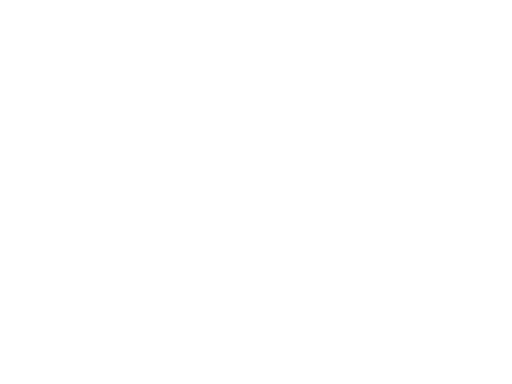

0.615
750881397.710724


<IPython.core.display.Javascript object>


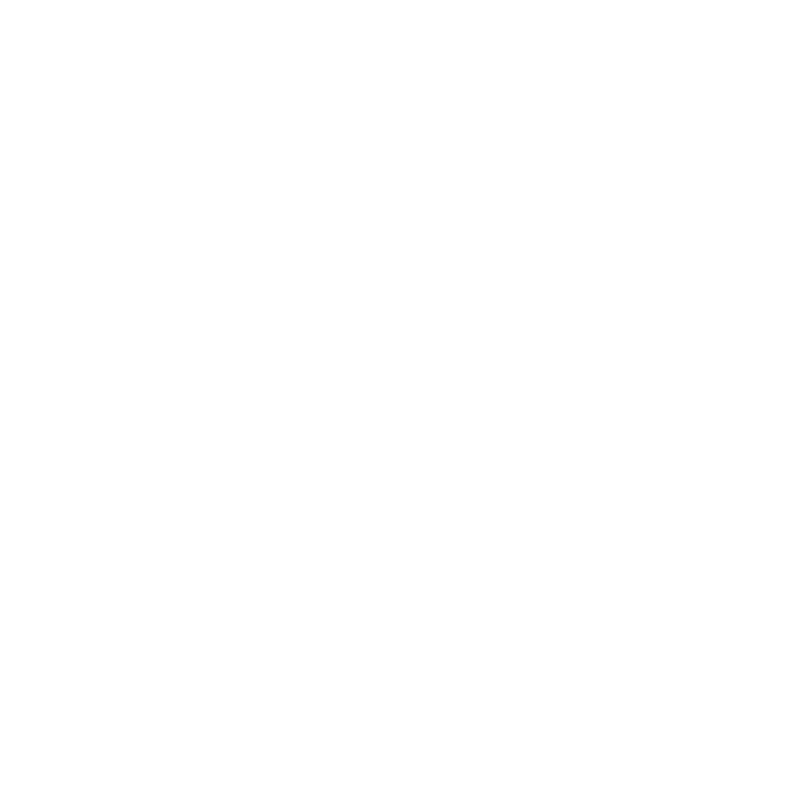

('bg:', 14196.1452717014)
('bg:', 14196.1452717014)
('bg:', 14196.1452717014)
('bg:', 14196.1452717014)
('bg:', 14196.1452717014)
('bg:', 14196.1452717014)
('bg:', 14196.1452717014)
('bg:', 14196.1452717014)


<IPython.core.display.Javascript object>


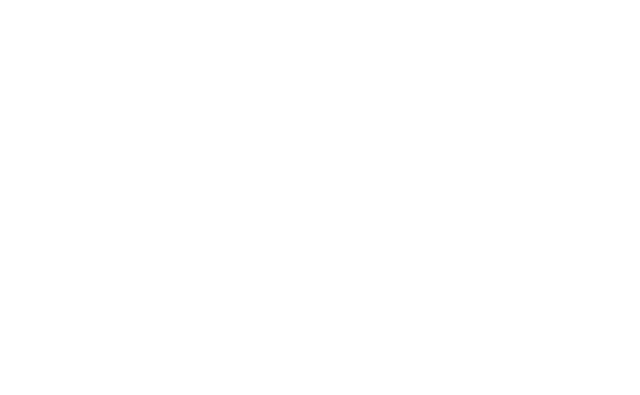

<IPython.core.display.Javascript object>


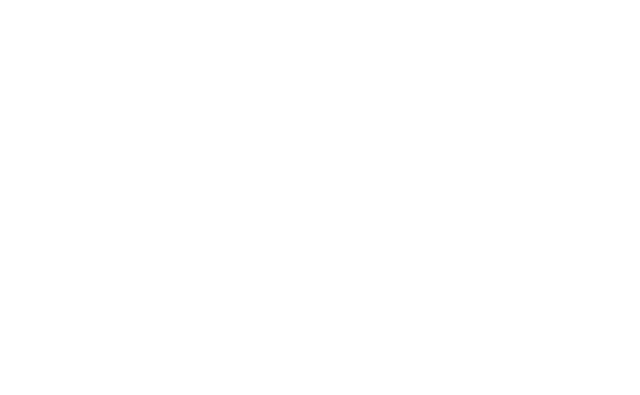

<IPython.core.display.Javascript object>


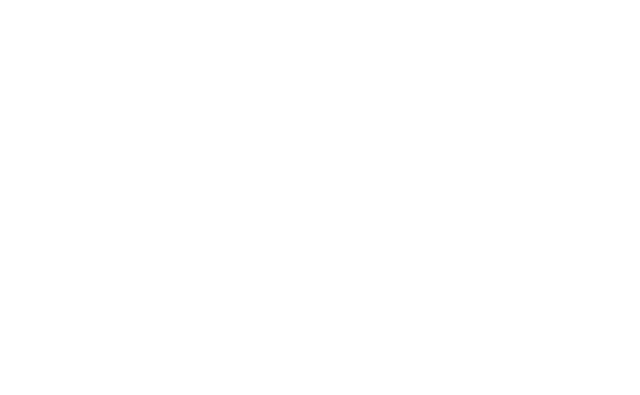

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:263: RuntimeWarning: divide by zero encountered in power


In [1111]:
#settings
ROI=9
#data_dir = "X:\\Ryan C\\Data\\DDM_Karthik\\20210715\\tif files\\Finished\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20210902\\"
#data_dir = "Y:\\Karthik_KRP\\Data\\DDM_DNA_MT\\20210902\\Philip data\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20211001\\"
#data_file = "%s_%s_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
#data_file = "%s_%s_BH-filter_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
data_file = "Trial_%s_%s%s128_FFTDIFFS_dts_ffts_ravs.p" %(video,side,ROI)
#data_file = "Trial_%s_B%s64_FFTDIFFS_dts_ffts_ravs.p" %(video, ROI)

dat = pickle.load(open(data_dir+data_file,'rb'))
ravs = dat['ravs'] 
dts  = dat['dts']
ffts = dat['ffts']
times = dts/framerate
print(dts)
print(times)

%matplotlib notebook
q_index = -1 #the last index
#backg = 2632 #change me! 
backg = np.mean(ravs[:,q_index])
pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=ravs[:,q_index],bg=backg, double=False, fps=framerate)
plt.plot(times, ravs[:,q_index],'ro') #plot the data
plt.plot(times, ddm.dTheory(times,*pars), '-k', lw=4) #see how well the initial guess performs
ax = plt.gca()
plt.text(0.8, 0.2, 'Index of q-value: %i' % q_index, horizontalalignment='center', verticalalignment='center', 
           transform=ax.transAxes, fontdict=font_plt)
plt.xlabel('Time (s)');
np.mean(ravs[:,q_index])
qq= [0.4,0.415,0.43,0.445,0.46,0.475,0.49,0.5,0.515,0.525,0.54,0.55,0.565,0.575,0.59,0.6,0.615,0.63,0.645,0.65,0.665,
         0.675,0.69,0.7,0.715,0.73,0.745,0.75,0.765,0.78,0.795,0.81,0.825,0.84,0.855,0.87,0.89,0.9,0.915,0.93,0.945,
         0.95,0.975,0.99,1.1]
pp=qq[1]

def two_rounds_fitting(data, times,pp):
    '''
    This function does two rounds of fitting. 
    First it uses SciPy's least-squares fitting:
        https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.leastsq.html
    Then, it uses the Levenberg-Marquardt method with the mpfit module. 
    '''

    pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=data, bg=backg, double=False, fps=framerate)
    #Paramters:
    # Amplitude-0, TimeConst-1, Background-2, Alpha (strtching exp), (... same for second exp..))
    minp[3]=0
    maxp[3]=2
    pars[3]=pp#CHANGE STRECTHING EXPONENT HERE
    
    maxp[2]=200000000
    minp[2]=10
    pars[2]=backg# change this to the amplitude of the q fit show in the plot above
    

    maxp[1] = 100000000000 #Decay Time Range
    minp[1] = 0.001
     
    maxp[5] = 100
    
    fix[3]= True#Fix alpha
    fix[2]= True #Fix bg
    
   
    fix[6]= False #6 is the stretching exponent for 2nd exponential
    pars[6] = 0.3
    minp[6] = 0.3 #min alpha2\n",
    maxp[6] = 1.5  #max alpha2\n",
    
    pars[5] = 0.1*pars[1] #5 is the time const for 2nd exponential
    minp[5] = 0.01
    '''
    #Leave this commented out for single exponential fits
    totamp = pars[0]+pars[4] ##0 and 4 are the amplitudes
    pars[4] = 0.4*totamp
    pars[0] = 0.4*totamp'''
    

    #The ddm.newFitLeastsq function does not check whether the parameters are within the
    #  minimum and maximum bounds. It uses SciPy's optimize.leastsq. 
    fitparams_lsq,theory_lsq = ddm.newFitLeastsq(data,times,pars,minp,maxp,lmin,lmax,fix,logfit=False)
    newPars = fitparams_lsq.copy()
    
    #We'll use the found parameters from SciPy's optimize.leastsq and feed them into the
    #  Levenberg-Marquardt function. Before we do so, we'll check that none of the found
    #  parameters are outside the min/max bounds. 
    for i,p in enumerate(fitparams_lsq):
        if p>maxp[i]:
            newPars[i] = maxp[i]*0.9
        if p<minp[i]:
            if p<0:
                newPars[i]=abs(p)
                if newPars[i]>maxp[i]:
                    newPars[i] = maxp[i]*0.9
                elif newPars[i]<minp[i]:
                    newPars[i] = minp[i]*1.1
            else:
                newPars[i] = minp[i]*1.1
                
    #Now use the Levenberg-Marquardt function. It returns the optimized paramters (fitparamsB), the 
    #  best fit (theoryB), any error codes, and the chi-squared value (the sum of squares of the error)
    fitparamsB, theoryB, errCodeB, chi2B = ddm.newFit(data,times,newPars,minp,maxp,lmin,lmax,fix,
                                                      logfit=False,quiet=True,factor=0.8)
    
    return fitparamsB, theoryB, chi2B
q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops

gg=np.zeros((11,45))

a_list=np.zeros((1,45))
for k in range(45):
    for i,q_index in enumerate([5,6,7,8,9,10,11,12,13,14,15]):
        pp=qq[k]
        fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],pp)
        gg[i,k]=chi2B
    #a_list[:,k]=sum(gg[:,k])/len(gg[:,k])
a_list=gg.mean(0)
#print(a_list)
min_ele=a_list[0]
rr=qq[0]
for i in range(1,len(a_list)):
    if a_list[i]<min_ele:
        min_ele=a_list[i]
        rr=qq[i]
print(rr)
print(min_ele)

%matplotlib notebook
plt.figure(figsize=(10,10)) #Create figure of size 10x10 (inches)

q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops
#Loop over four different q-values to do the fit
#for i,q_index in enumerate([2, 5,10,15,20,25,30,35]):
for i,q_index in enumerate([4,7,10,15,17,20,25,30]):
    fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],rr)
    #print len(theoryB)
    ax = plt.subplot(4,2,i+1) #creating 4 subplots in a 2x2 grid
    matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
    ax.semilogx(times,ravs[:,q_index],'ro',alpha=0.4)
    ax.plot(times[:len(theoryB)], theoryB, '-b',lw=3)
    ax.text(0.05,0.88,'Decay time: %.2f s' % fitparamsB[1], 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.76,'Stretching expo: %.2f, %.2f' % (fitparamsB[3], fitparamsB[6]), 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.64,'Amptlidue1: %.2f' % (fitparamsB[0]),
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel("Time (s)", fontdict=font_plt_ax)
    ax.set_title("Fit for q-index of %i. So q = %.3f 1/$\mu$m" % (q_index, q[q_index]), fontdict=font_plt_ax)
    print ("bg:", fitparamsB[2])
    plt.savefig(data_dir + "%s_%s_%s_ISFs.png" %(video,side,ROI))




# So, you have fixed the background AND changed the stretching exponent range, but your fits still seem kind of bad! You can continue onto the next steps to check out some of the other paramters. Your issue might be there!
fitparams = np.zeros((ravs.shape[1],7))
theory = np.zeros((ravs.shape[1],len(times[:end_time])))
tau = np.zeros_like(ravs[0,:]) #decay time
amp = np.zeros_like(tau) #amplitude
bg = np.zeros_like(tau) #background
alph = np.zeros_like(tau) #alpha (stretching exponent)
amp2 = np.zeros_like(tau) #amplitude
tau2 = np.zeros_like(tau) #background
alph2 = np.zeros_like(tau) #alpha (stretching exponent)
chi2 = np.zeros_like(tau)
for i in range(1,len(tau)):
    fitparams[i], theory[i], chi2[i] = two_rounds_fitting(ravs[:end_time,i], times[:end_time],rr)
    amp[i] = fitparams[i][0]
    bg[i] = fitparams[i][2]
    tau[i] = fitparams[i][1]
    alph[i] = fitparams[i][3]
    amp2[i] = fitparams[i][4]
    tau2[i] = fitparams[i][5]
    alph2[i] = fitparams[i][6]
#Plot the amplitude versus the wave vector

fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], amp[2:-1], 'ro')
ax.loglog(q[3:-1], amp2[2:-1], 'bd')
w = amp[2:-1].argmax() #argmax returns the index of the array that has the max value
q_for_max_a = q[2:-2][w]
ax.loglog(q[3:-1], bg[2:-1], 'bo') #Plot the background versus the wave vector
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("Amplitude (red); amp2 (red); bg (grn)", fontdict=font_plt_ax)

ax.text(0.2,0.7,'Max A at 1/q = %.3f' % (1.0/q_for_max_a), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);
ax.text(0.2,0.8,'Mean Background = %.3f' % (bg[4:14].mean()), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);




#Plot the str exponent versus the wave vector
fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], alph[2:-1], 'ro')
ax.loglog(q[3:-1], alph2[2:-1], 'bo')
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("stretching exponent", fontdict=font_plt_ax)









#Plot the decay time versus the wave vector
fig = plt.figure(figsize=(8,8/1.618)); ax = fig.gca(); 
#ax.loglog(q[3:-1], tau[2:-1], 'ro')
qs = q[2:-2]
qend=-1
q0=q[2:qend]
tau0 = ddm.newt(tau[2:qend],alph[2:qend])
#ax.loglog(qs, tau[2:-1], 'ro')
ax.loglog(q[3:qend], ddm.newt(tau[2:qend],alph[2:qend]),'bo') # this is for the first exponential
#ax.loglog(q[2:-31],tau[2:-30],'ro')
#ax.loglog(q[3:-30], ddm.newt(tau2[2:-30],alph2[2:-30]),'ro') # this is for the second
#ax.loglog(q[3:-30], tau2[2:-30],'go')


#aa=[0,1,2,3,4,5,6]
#bb=[10,11,12,13,14,15,16,17,18,19,20]
#Setting range of q values for fitting the data 
#for i in range(aa)
   # for j in range(bb)
minq=4
maxq=14

qmin=q[minq]
qmax=q[maxq]
new_taus=ddm.newt(tau[2:qend],alph[2:qend])

b = np.where((q>=qmin)&(q<=qmax))
ax.plot(q[b[0]+3],new_taus[b[0]],'r+',label='good q range')
#ax.plot(q[b], new_taus[b], 'r+')

ax.set_xlim(0.9,50)
ax.set_ylim(0.0001,10000)

## q^-2, does it look diffusive ?
diffusion_coeff = .1 # CHANGE DIFFUSION COEFFICIENT
power = 2.0 
ax.plot(q[1:-1], (1./diffusion_coeff) * 1./(q[1:-1]**power), '--c', label="Diffusive")


#Fitting data to a line
a = np.polyfit(np.log(q[b[0]+3]),np.log(new_taus[b[0]]), 1)

slope=a[0]
coef1 = np.exp(a[1])
alpha = 2./(-1*slope)
Dif = (1.0/coef1)**alpha
tau_fit = coef1*(q**(-2.0/alpha))
ax.plot(q, tau_fit, '-k', label = "best fit line")
plt.legend()

## does it fit some other power?
#adiffusion_coeff = .022
#power2 = 3
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')

#adiffusion_coeff = 0.018
#power2 = 1
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')


ax.text(0.55,0.15,'D = %.4f um2/s' % diffusion_coeff,
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
ax.text(3,380,"slope: %.4f" %slope)
ax.set_xlabel("q (um^-1)", fontdict=font_plt_ax)
ax.set_ylabel("tau (s)", fontdict=font_plt_ax)
ax.text(3,660,"alpha: %.4f" %alpha)
plt.savefig(data_dir+ "%s_%s_%s_Tau_vs_q.png" %(video,side,ROI))

#################################################################################################
allResults['fitparams_'+str(video)+'_'+str(ROI)] = fitparams
allResults['theory_'+str(video)+'_'+str(ROI)] = theory
allResults['chi2_'+str(video)+'_'+str(ROI)] = chi2
allResults['ravs_'+str(video)+'_'+str(ROI)] = ravs
allResults['dts'] = dts
allResults.keys()
ravs1=ravs[:,4]
ravs2=ravs[:,7]
ravs3=ravs[:,10]
ravs4=ravs[:,15]
ravs5=ravs[:,17]
ravs6=ravs[:,20]
ravs7=ravs[:,25]
ravs8=ravs[:,30]
a=[0]*(len(times)-len(q))
b=[0]*(len(times)-len(tau))
qs=np.append(q,a)
taus=np.append(tau,b)

Final_Data=np.transpose(np.vstack([times,ravs1,ravs2,ravs3,ravs4,ravs5,ravs6,ravs7,ravs8,qs,taus]))
Final_Data_1=(np.vstack([taus]))
np.savetxt(data_dir+ "onlyT_%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data_1, delimiter=',')
np.savetxt(data_dir+ "%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data, delimiter=',')
#np.savetxt('C:\\Users\\kpeddireddy\\Desktop\\test\\1_1_full_Final_Data.csv', Final_Data, delimiter=',')




import pandas as pd
df=pd.DataFrame(Final_Data_1)
df.to_csv(data_dir+ "%s_Tau_vs_q.csv" %(speed), mode='a', index=False, header=False)

[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192  193  194  196  197
  198 

<IPython.core.display.Javascript object>


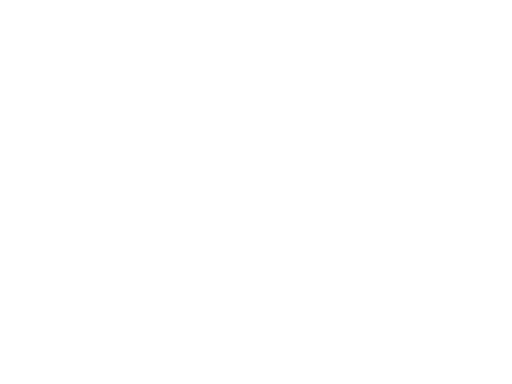

0.615
764229251.0198997


<IPython.core.display.Javascript object>


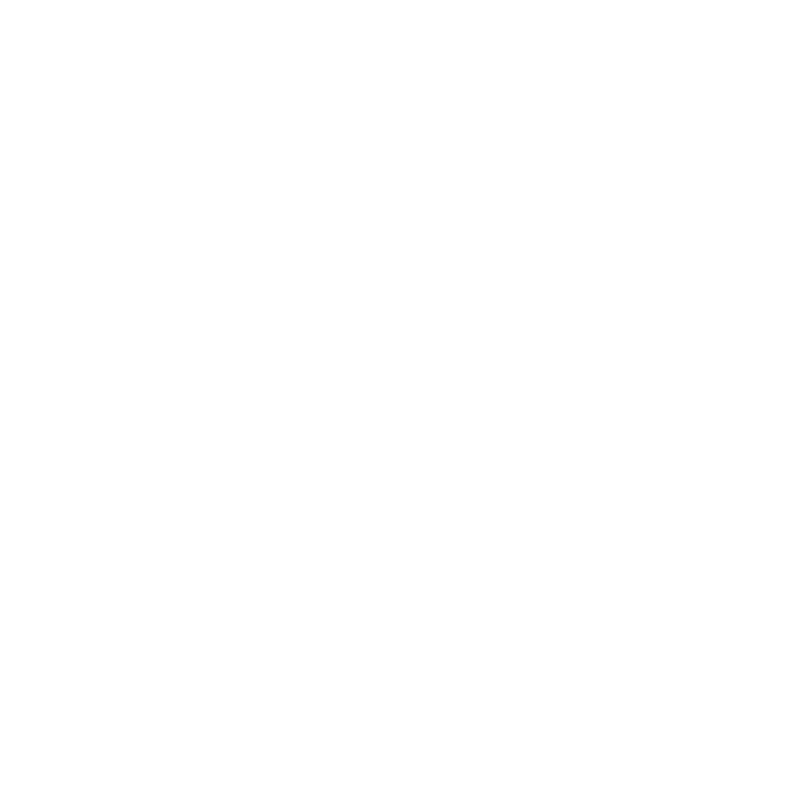

('bg:', 14210.868110682093)
('bg:', 14210.868110682093)
('bg:', 14210.868110682093)
('bg:', 14210.868110682093)
('bg:', 14210.868110682093)
('bg:', 14210.868110682093)
('bg:', 14210.868110682093)
('bg:', 14210.868110682093)


<IPython.core.display.Javascript object>


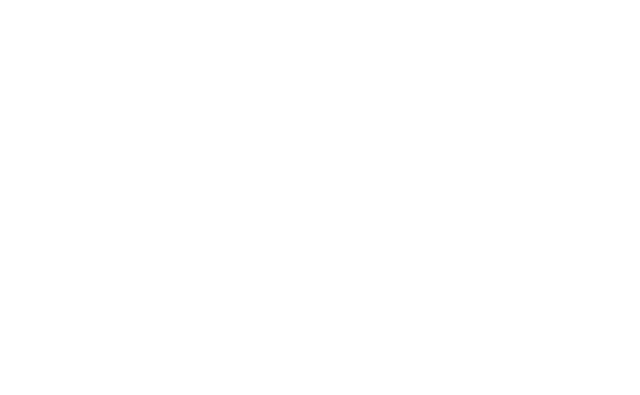

<IPython.core.display.Javascript object>


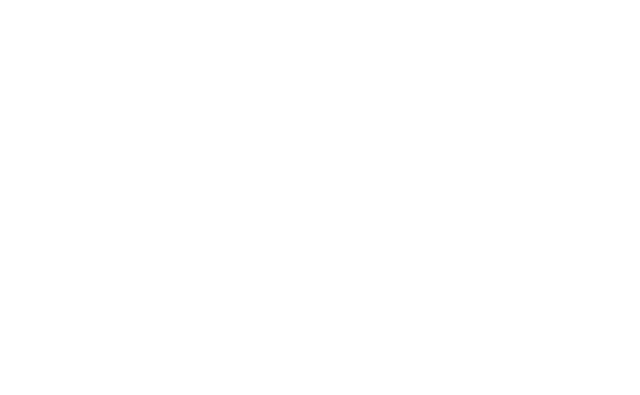

<IPython.core.display.Javascript object>


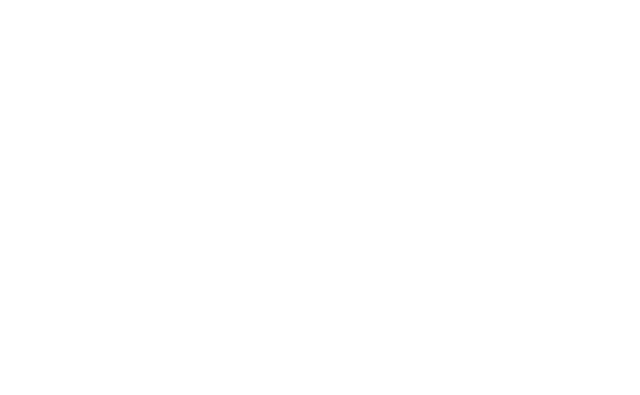

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:263: RuntimeWarning: divide by zero encountered in power


In [1112]:
#settings
ROI=10
#data_dir = "X:\\Ryan C\\Data\\DDM_Karthik\\20210715\\tif files\\Finished\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20210902\\"
#data_dir = "Y:\\Karthik_KRP\\Data\\DDM_DNA_MT\\20210902\\Philip data\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20211001\\"
#data_file = "%s_%s_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
#data_file = "%s_%s_BH-filter_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
data_file = "Trial_%s_%s%s128_FFTDIFFS_dts_ffts_ravs.p" %(video,side,ROI)
#data_file = "Trial_%s_B%s64_FFTDIFFS_dts_ffts_ravs.p" %(video, ROI)

dat = pickle.load(open(data_dir+data_file,'rb'))
ravs = dat['ravs'] 
dts  = dat['dts']
ffts = dat['ffts']
times = dts/framerate
print(dts)
print(times)

%matplotlib notebook
q_index = -1 #the last index
#backg = 2632 #change me! 
backg = np.mean(ravs[:,q_index])
pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=ravs[:,q_index],bg=backg, double=False, fps=framerate)
plt.plot(times, ravs[:,q_index],'ro') #plot the data
plt.plot(times, ddm.dTheory(times,*pars), '-k', lw=4) #see how well the initial guess performs
ax = plt.gca()
plt.text(0.8, 0.2, 'Index of q-value: %i' % q_index, horizontalalignment='center', verticalalignment='center', 
           transform=ax.transAxes, fontdict=font_plt)
plt.xlabel('Time (s)');
np.mean(ravs[:,q_index])
qq= [0.4,0.415,0.43,0.445,0.46,0.475,0.49,0.5,0.515,0.525,0.54,0.55,0.565,0.575,0.59,0.6,0.615,0.63,0.645,0.65,0.665,
         0.675,0.69,0.7,0.715,0.73,0.745,0.75,0.765,0.78,0.795,0.81,0.825,0.84,0.855,0.87,0.89,0.9,0.915,0.93,0.945,
         0.95,0.975,0.99,1.1]
pp=qq[1]

def two_rounds_fitting(data, times,pp):
    '''
    This function does two rounds of fitting. 
    First it uses SciPy's least-squares fitting:
        https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.leastsq.html
    Then, it uses the Levenberg-Marquardt method with the mpfit module. 
    '''

    pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=data, bg=backg, double=False, fps=framerate)
    #Paramters:
    # Amplitude-0, TimeConst-1, Background-2, Alpha (strtching exp), (... same for second exp..))
    minp[3]=0
    maxp[3]=2
    pars[3]=pp#CHANGE STRECTHING EXPONENT HERE
    
    maxp[2]=200000000
    minp[2]=10
    pars[2]=backg# change this to the amplitude of the q fit show in the plot above
    

    maxp[1] = 100000000000 #Decay Time Range
    minp[1] = 0.001
     
    maxp[5] = 100
    
    fix[3]= True#Fix alpha
    fix[2]= True #Fix bg
    
   
    fix[6]= False #6 is the stretching exponent for 2nd exponential
    pars[6] = 0.3
    minp[6] = 0.3 #min alpha2\n",
    maxp[6] = 1.5  #max alpha2\n",
    
    pars[5] = 0.1*pars[1] #5 is the time const for 2nd exponential
    minp[5] = 0.01
    '''
    #Leave this commented out for single exponential fits
    totamp = pars[0]+pars[4] ##0 and 4 are the amplitudes
    pars[4] = 0.4*totamp
    pars[0] = 0.4*totamp'''
    

    #The ddm.newFitLeastsq function does not check whether the parameters are within the
    #  minimum and maximum bounds. It uses SciPy's optimize.leastsq. 
    fitparams_lsq,theory_lsq = ddm.newFitLeastsq(data,times,pars,minp,maxp,lmin,lmax,fix,logfit=False)
    newPars = fitparams_lsq.copy()
    
    #We'll use the found parameters from SciPy's optimize.leastsq and feed them into the
    #  Levenberg-Marquardt function. Before we do so, we'll check that none of the found
    #  parameters are outside the min/max bounds. 
    for i,p in enumerate(fitparams_lsq):
        if p>maxp[i]:
            newPars[i] = maxp[i]*0.9
        if p<minp[i]:
            if p<0:
                newPars[i]=abs(p)
                if newPars[i]>maxp[i]:
                    newPars[i] = maxp[i]*0.9
                elif newPars[i]<minp[i]:
                    newPars[i] = minp[i]*1.1
            else:
                newPars[i] = minp[i]*1.1
                
    #Now use the Levenberg-Marquardt function. It returns the optimized paramters (fitparamsB), the 
    #  best fit (theoryB), any error codes, and the chi-squared value (the sum of squares of the error)
    fitparamsB, theoryB, errCodeB, chi2B = ddm.newFit(data,times,newPars,minp,maxp,lmin,lmax,fix,
                                                      logfit=False,quiet=True,factor=0.8)
    
    return fitparamsB, theoryB, chi2B
q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops

gg=np.zeros((11,45))

a_list=np.zeros((1,45))
for k in range(45):
    for i,q_index in enumerate([5,6,7,8,9,10,11,12,13,14,15]):
        pp=qq[k]
        fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],pp)
        gg[i,k]=chi2B
    #a_list[:,k]=sum(gg[:,k])/len(gg[:,k])
a_list=gg.mean(0)
#print(a_list)
min_ele=a_list[0]
rr=qq[0]
for i in range(1,len(a_list)):
    if a_list[i]<min_ele:
        min_ele=a_list[i]
        rr=qq[i]
print(rr)
print(min_ele)

%matplotlib notebook
plt.figure(figsize=(10,10)) #Create figure of size 10x10 (inches)

q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops
#Loop over four different q-values to do the fit
#for i,q_index in enumerate([2, 5,10,15,20,25,30,35]):
for i,q_index in enumerate([4,7,10,15,17,20,25,30]):
    fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],rr)
    #print len(theoryB)
    ax = plt.subplot(4,2,i+1) #creating 4 subplots in a 2x2 grid
    matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
    ax.semilogx(times,ravs[:,q_index],'ro',alpha=0.4)
    ax.plot(times[:len(theoryB)], theoryB, '-b',lw=3)
    ax.text(0.05,0.88,'Decay time: %.2f s' % fitparamsB[1], 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.76,'Stretching expo: %.2f, %.2f' % (fitparamsB[3], fitparamsB[6]), 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.64,'Amptlidue1: %.2f' % (fitparamsB[0]),
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel("Time (s)", fontdict=font_plt_ax)
    ax.set_title("Fit for q-index of %i. So q = %.3f 1/$\mu$m" % (q_index, q[q_index]), fontdict=font_plt_ax)
    print ("bg:", fitparamsB[2])
    plt.savefig(data_dir + "%s_%s_%s_ISFs.png" %(video,side,ROI))




# So, you have fixed the background AND changed the stretching exponent range, but your fits still seem kind of bad! You can continue onto the next steps to check out some of the other paramters. Your issue might be there!
fitparams = np.zeros((ravs.shape[1],7))
theory = np.zeros((ravs.shape[1],len(times[:end_time])))
tau = np.zeros_like(ravs[0,:]) #decay time
amp = np.zeros_like(tau) #amplitude
bg = np.zeros_like(tau) #background
alph = np.zeros_like(tau) #alpha (stretching exponent)
amp2 = np.zeros_like(tau) #amplitude
tau2 = np.zeros_like(tau) #background
alph2 = np.zeros_like(tau) #alpha (stretching exponent)
chi2 = np.zeros_like(tau)
for i in range(1,len(tau)):
    fitparams[i], theory[i], chi2[i] = two_rounds_fitting(ravs[:end_time,i], times[:end_time],rr)
    amp[i] = fitparams[i][0]
    bg[i] = fitparams[i][2]
    tau[i] = fitparams[i][1]
    alph[i] = fitparams[i][3]
    amp2[i] = fitparams[i][4]
    tau2[i] = fitparams[i][5]
    alph2[i] = fitparams[i][6]
#Plot the amplitude versus the wave vector

fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], amp[2:-1], 'ro')
ax.loglog(q[3:-1], amp2[2:-1], 'bd')
w = amp[2:-1].argmax() #argmax returns the index of the array that has the max value
q_for_max_a = q[2:-2][w]
ax.loglog(q[3:-1], bg[2:-1], 'bo') #Plot the background versus the wave vector
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("Amplitude (red); amp2 (red); bg (grn)", fontdict=font_plt_ax)

ax.text(0.2,0.7,'Max A at 1/q = %.3f' % (1.0/q_for_max_a), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);
ax.text(0.2,0.8,'Mean Background = %.3f' % (bg[4:14].mean()), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);




#Plot the str exponent versus the wave vector
fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], alph[2:-1], 'ro')
ax.loglog(q[3:-1], alph2[2:-1], 'bo')
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("stretching exponent", fontdict=font_plt_ax)









#Plot the decay time versus the wave vector
fig = plt.figure(figsize=(8,8/1.618)); ax = fig.gca(); 
#ax.loglog(q[3:-1], tau[2:-1], 'ro')
qs = q[2:-2]
qend=-1
q0=q[2:qend]
tau0 = ddm.newt(tau[2:qend],alph[2:qend])
#ax.loglog(qs, tau[2:-1], 'ro')
ax.loglog(q[3:qend], ddm.newt(tau[2:qend],alph[2:qend]),'bo') # this is for the first exponential
#ax.loglog(q[2:-31],tau[2:-30],'ro')
#ax.loglog(q[3:-30], ddm.newt(tau2[2:-30],alph2[2:-30]),'ro') # this is for the second
#ax.loglog(q[3:-30], tau2[2:-30],'go')


#aa=[0,1,2,3,4,5,6]
#bb=[10,11,12,13,14,15,16,17,18,19,20]
#Setting range of q values for fitting the data 
#for i in range(aa)
   # for j in range(bb)
minq=4
maxq=14

qmin=q[minq]
qmax=q[maxq]
new_taus=ddm.newt(tau[2:qend],alph[2:qend])

b = np.where((q>=qmin)&(q<=qmax))
ax.plot(q[b[0]+3],new_taus[b[0]],'r+',label='good q range')
#ax.plot(q[b], new_taus[b], 'r+')

ax.set_xlim(0.9,50)
ax.set_ylim(0.0001,10000)

## q^-2, does it look diffusive ?
diffusion_coeff = .1 # CHANGE DIFFUSION COEFFICIENT
power = 2.0 
ax.plot(q[1:-1], (1./diffusion_coeff) * 1./(q[1:-1]**power), '--c', label="Diffusive")


#Fitting data to a line
a = np.polyfit(np.log(q[b[0]+3]),np.log(new_taus[b[0]]), 1)

slope=a[0]
coef1 = np.exp(a[1])
alpha = 2./(-1*slope)
Dif = (1.0/coef1)**alpha
tau_fit = coef1*(q**(-2.0/alpha))
ax.plot(q, tau_fit, '-k', label = "best fit line")
plt.legend()

## does it fit some other power?
#adiffusion_coeff = .022
#power2 = 3
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')

#adiffusion_coeff = 0.018
#power2 = 1
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')


ax.text(0.55,0.15,'D = %.4f um2/s' % diffusion_coeff,
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
ax.text(3,380,"slope: %.4f" %slope)
ax.set_xlabel("q (um^-1)", fontdict=font_plt_ax)
ax.set_ylabel("tau (s)", fontdict=font_plt_ax)
ax.text(3,660,"alpha: %.4f" %alpha)
plt.savefig(data_dir+ "%s_%s_%s_Tau_vs_q.png" %(video,side,ROI))

#################################################################################################
allResults['fitparams_'+str(video)+'_'+str(ROI)] = fitparams
allResults['theory_'+str(video)+'_'+str(ROI)] = theory
allResults['chi2_'+str(video)+'_'+str(ROI)] = chi2
allResults['ravs_'+str(video)+'_'+str(ROI)] = ravs
allResults['dts'] = dts
allResults.keys()
ravs1=ravs[:,4]
ravs2=ravs[:,7]
ravs3=ravs[:,10]
ravs4=ravs[:,15]
ravs5=ravs[:,17]
ravs6=ravs[:,20]
ravs7=ravs[:,25]
ravs8=ravs[:,30]
a=[0]*(len(times)-len(q))
b=[0]*(len(times)-len(tau))
qs=np.append(q,a)
taus=np.append(tau,b)

Final_Data=np.transpose(np.vstack([times,ravs1,ravs2,ravs3,ravs4,ravs5,ravs6,ravs7,ravs8,qs,taus]))
Final_Data_1=(np.vstack([taus]))
np.savetxt(data_dir+ "onlyT_%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data_1, delimiter=',')
np.savetxt(data_dir+ "%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data, delimiter=',')
#np.savetxt('C:\\Users\\kpeddireddy\\Desktop\\test\\1_1_full_Final_Data.csv', Final_Data, delimiter=',')




import pandas as pd
df=pd.DataFrame(Final_Data_1)
df.to_csv(data_dir+ "%s_Tau_vs_q.csv" %(speed), mode='a', index=False, header=False)

[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192  193  194  196  197
  198 

<IPython.core.display.Javascript object>


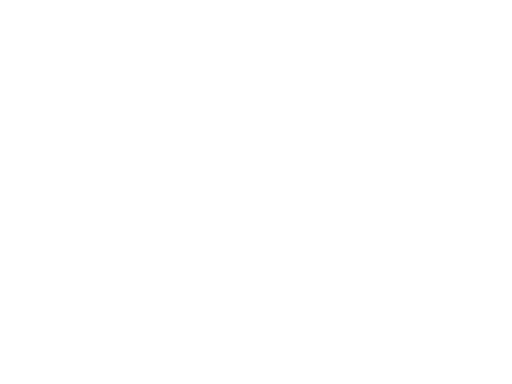

0.795
904549174.8083354


<IPython.core.display.Javascript object>


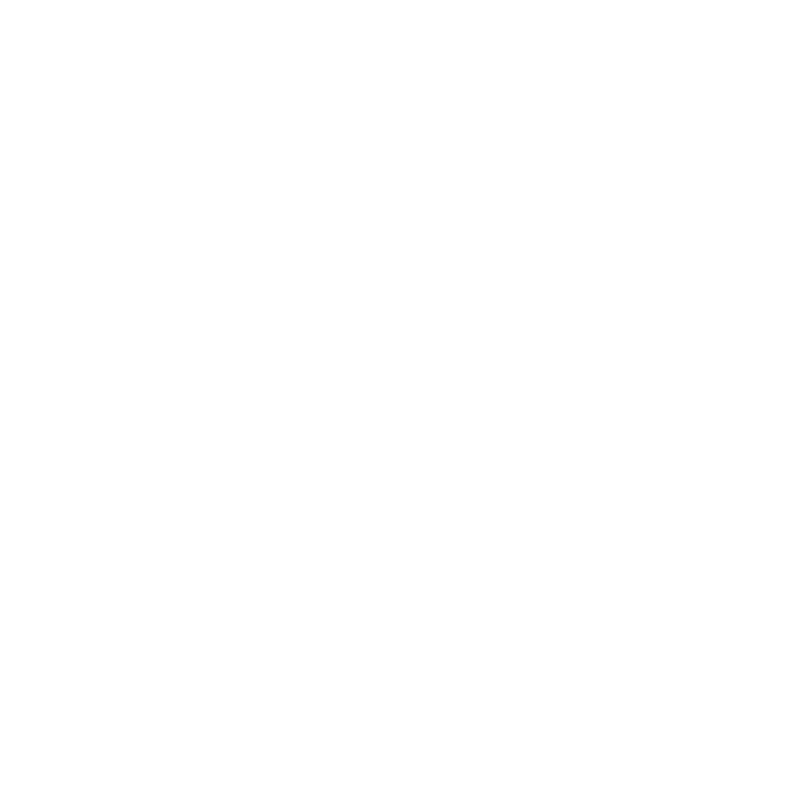

('bg:', 14218.55728333234)
('bg:', 14218.55728333234)
('bg:', 14218.55728333234)
('bg:', 14218.55728333234)
('bg:', 14218.55728333234)
('bg:', 14218.55728333234)
('bg:', 14218.55728333234)
('bg:', 14218.55728333234)


<IPython.core.display.Javascript object>


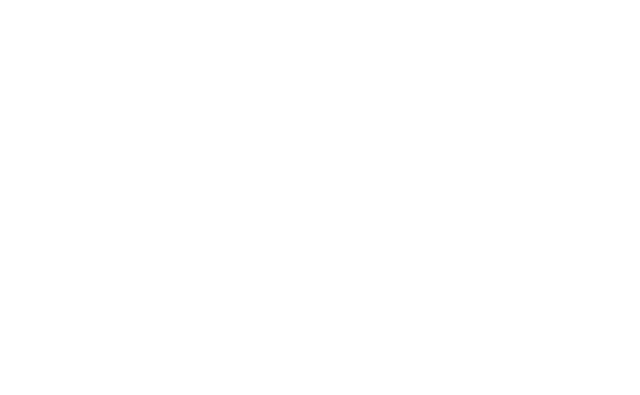

<IPython.core.display.Javascript object>


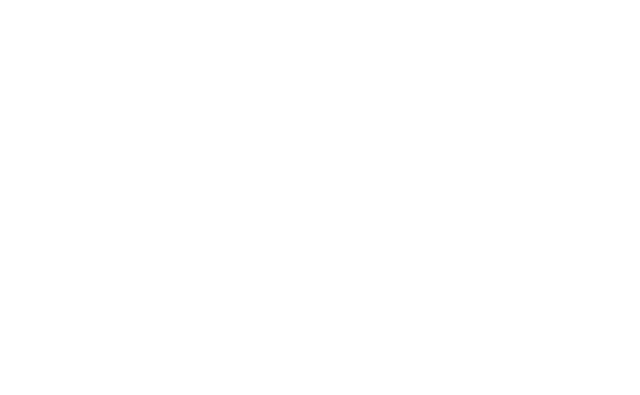

<IPython.core.display.Javascript object>


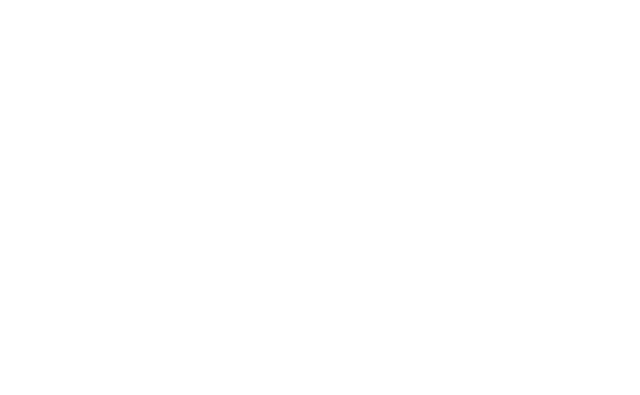

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:264: RuntimeWarning: divide by zero encountered in power


In [1113]:
#settings
ROI=1
side='T'
#data_dir = "X:\\Ryan C\\Data\\DDM_Karthik\\20210715\\tif files\\Finished\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20210902\\"
#data_dir = "Y:\\Karthik_KRP\\Data\\DDM_DNA_MT\\20210902\\Philip data\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20211001\\"
#data_file = "%s_%s_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
#data_file = "%s_%s_BH-filter_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
data_file = "Trial_%s_%s%s128_FFTDIFFS_dts_ffts_ravs.p" %(video,side,ROI)
#data_file = "Trial_%s_B%s64_FFTDIFFS_dts_ffts_ravs.p" %(video, ROI)

dat = pickle.load(open(data_dir+data_file,'rb'))
ravs = dat['ravs'] 
dts  = dat['dts']
ffts = dat['ffts']
times = dts/framerate
print(dts)
print(times)

%matplotlib notebook
q_index = -1 #the last index
#backg = 2632 #change me! 
backg = np.mean(ravs[:,q_index])
pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=ravs[:,q_index],bg=backg, double=False, fps=framerate)
plt.plot(times, ravs[:,q_index],'ro') #plot the data
plt.plot(times, ddm.dTheory(times,*pars), '-k', lw=4) #see how well the initial guess performs
ax = plt.gca()
plt.text(0.8, 0.2, 'Index of q-value: %i' % q_index, horizontalalignment='center', verticalalignment='center', 
           transform=ax.transAxes, fontdict=font_plt)
plt.xlabel('Time (s)');
np.mean(ravs[:,q_index])
qq= [0.4,0.415,0.43,0.445,0.46,0.475,0.49,0.5,0.515,0.525,0.54,0.55,0.565,0.575,0.59,0.6,0.615,0.63,0.645,0.65,0.665,
         0.675,0.69,0.7,0.715,0.73,0.745,0.75,0.765,0.78,0.795,0.81,0.825,0.84,0.855,0.87,0.89,0.9,0.915,0.93,0.945,
         0.95,0.975,0.99,1.1]
pp=qq[1]

def two_rounds_fitting(data, times,pp):
    '''
    This function does two rounds of fitting. 
    First it uses SciPy's least-squares fitting:
        https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.leastsq.html
    Then, it uses the Levenberg-Marquardt method with the mpfit module. 
    '''

    pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=data, bg=backg, double=False, fps=framerate)
    #Paramters:
    # Amplitude-0, TimeConst-1, Background-2, Alpha (strtching exp), (... same for second exp..))
    minp[3]=0
    maxp[3]=2
    pars[3]=pp#CHANGE STRECTHING EXPONENT HERE
    
    maxp[2]=200000000
    minp[2]=10
    pars[2]=backg# change this to the amplitude of the q fit show in the plot above
    

    maxp[1] = 100000000000 #Decay Time Range
    minp[1] = 0.001
     
    maxp[5] = 100
    
    fix[3]= True#Fix alpha
    fix[2]= True #Fix bg
    
   
    fix[6]= False #6 is the stretching exponent for 2nd exponential
    pars[6] = 0.3
    minp[6] = 0.3 #min alpha2\n",
    maxp[6] = 1.5  #max alpha2\n",
    
    pars[5] = 0.1*pars[1] #5 is the time const for 2nd exponential
    minp[5] = 0.01
    '''
    #Leave this commented out for single exponential fits
    totamp = pars[0]+pars[4] ##0 and 4 are the amplitudes
    pars[4] = 0.4*totamp
    pars[0] = 0.4*totamp'''
    

    #The ddm.newFitLeastsq function does not check whether the parameters are within the
    #  minimum and maximum bounds. It uses SciPy's optimize.leastsq. 
    fitparams_lsq,theory_lsq = ddm.newFitLeastsq(data,times,pars,minp,maxp,lmin,lmax,fix,logfit=False)
    newPars = fitparams_lsq.copy()
    
    #We'll use the found parameters from SciPy's optimize.leastsq and feed them into the
    #  Levenberg-Marquardt function. Before we do so, we'll check that none of the found
    #  parameters are outside the min/max bounds. 
    for i,p in enumerate(fitparams_lsq):
        if p>maxp[i]:
            newPars[i] = maxp[i]*0.9
        if p<minp[i]:
            if p<0:
                newPars[i]=abs(p)
                if newPars[i]>maxp[i]:
                    newPars[i] = maxp[i]*0.9
                elif newPars[i]<minp[i]:
                    newPars[i] = minp[i]*1.1
            else:
                newPars[i] = minp[i]*1.1
                
    #Now use the Levenberg-Marquardt function. It returns the optimized paramters (fitparamsB), the 
    #  best fit (theoryB), any error codes, and the chi-squared value (the sum of squares of the error)
    fitparamsB, theoryB, errCodeB, chi2B = ddm.newFit(data,times,newPars,minp,maxp,lmin,lmax,fix,
                                                      logfit=False,quiet=True,factor=0.8)
    
    return fitparamsB, theoryB, chi2B
q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops

gg=np.zeros((11,45))

a_list=np.zeros((1,45))
for k in range(45):
    for i,q_index in enumerate([5,6,7,8,9,10,11,12,13,14,15]):
        pp=qq[k]
        fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],pp)
        gg[i,k]=chi2B
    #a_list[:,k]=sum(gg[:,k])/len(gg[:,k])
a_list=gg.mean(0)
#print(a_list)
min_ele=a_list[0]
rr=qq[0]
for i in range(1,len(a_list)):
    if a_list[i]<min_ele:
        min_ele=a_list[i]
        rr=qq[i]
print(rr)
print(min_ele)

%matplotlib notebook
plt.figure(figsize=(10,10)) #Create figure of size 10x10 (inches)

q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops
#Loop over four different q-values to do the fit
#for i,q_index in enumerate([2, 5,10,15,20,25,30,35]):
for i,q_index in enumerate([4,7,10,15,17,20,25,30]):
    fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],rr)
    #print len(theoryB)
    ax = plt.subplot(4,2,i+1) #creating 4 subplots in a 2x2 grid
    matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
    ax.semilogx(times,ravs[:,q_index],'ro',alpha=0.4)
    ax.plot(times[:len(theoryB)], theoryB, '-b',lw=3)
    ax.text(0.05,0.88,'Decay time: %.2f s' % fitparamsB[1], 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.76,'Stretching expo: %.2f, %.2f' % (fitparamsB[3], fitparamsB[6]), 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.64,'Amptlidue1: %.2f' % (fitparamsB[0]),
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel("Time (s)", fontdict=font_plt_ax)
    ax.set_title("Fit for q-index of %i. So q = %.3f 1/$\mu$m" % (q_index, q[q_index]), fontdict=font_plt_ax)
    print ("bg:", fitparamsB[2])
    plt.savefig(data_dir + "%s_%s_%s_ISFs.png" %(video,side,ROI))




# So, you have fixed the background AND changed the stretching exponent range, but your fits still seem kind of bad! You can continue onto the next steps to check out some of the other paramters. Your issue might be there!
fitparams = np.zeros((ravs.shape[1],7))
theory = np.zeros((ravs.shape[1],len(times[:end_time])))
tau = np.zeros_like(ravs[0,:]) #decay time
amp = np.zeros_like(tau) #amplitude
bg = np.zeros_like(tau) #background
alph = np.zeros_like(tau) #alpha (stretching exponent)
amp2 = np.zeros_like(tau) #amplitude
tau2 = np.zeros_like(tau) #background
alph2 = np.zeros_like(tau) #alpha (stretching exponent)
chi2 = np.zeros_like(tau)
for i in range(1,len(tau)):
    fitparams[i], theory[i], chi2[i] = two_rounds_fitting(ravs[:end_time,i], times[:end_time],rr)
    amp[i] = fitparams[i][0]
    bg[i] = fitparams[i][2]
    tau[i] = fitparams[i][1]
    alph[i] = fitparams[i][3]
    amp2[i] = fitparams[i][4]
    tau2[i] = fitparams[i][5]
    alph2[i] = fitparams[i][6]
#Plot the amplitude versus the wave vector

fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], amp[2:-1], 'ro')
ax.loglog(q[3:-1], amp2[2:-1], 'bd')
w = amp[2:-1].argmax() #argmax returns the index of the array that has the max value
q_for_max_a = q[2:-2][w]
ax.loglog(q[3:-1], bg[2:-1], 'bo') #Plot the background versus the wave vector
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("Amplitude (red); amp2 (red); bg (grn)", fontdict=font_plt_ax)

ax.text(0.2,0.7,'Max A at 1/q = %.3f' % (1.0/q_for_max_a), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);
ax.text(0.2,0.8,'Mean Background = %.3f' % (bg[4:14].mean()), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);




#Plot the str exponent versus the wave vector
fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], alph[2:-1], 'ro')
ax.loglog(q[3:-1], alph2[2:-1], 'bo')
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("stretching exponent", fontdict=font_plt_ax)









#Plot the decay time versus the wave vector
fig = plt.figure(figsize=(8,8/1.618)); ax = fig.gca(); 
#ax.loglog(q[3:-1], tau[2:-1], 'ro')
qs = q[2:-2]
qend=-1
q0=q[2:qend]
tau0 = ddm.newt(tau[2:qend],alph[2:qend])
#ax.loglog(qs, tau[2:-1], 'ro')
ax.loglog(q[3:qend], ddm.newt(tau[2:qend],alph[2:qend]),'bo') # this is for the first exponential
#ax.loglog(q[2:-31],tau[2:-30],'ro')
#ax.loglog(q[3:-30], ddm.newt(tau2[2:-30],alph2[2:-30]),'ro') # this is for the second
#ax.loglog(q[3:-30], tau2[2:-30],'go')


#aa=[0,1,2,3,4,5,6]
#bb=[10,11,12,13,14,15,16,17,18,19,20]
#Setting range of q values for fitting the data 
#for i in range(aa)
   # for j in range(bb)
minq=4
maxq=14

qmin=q[minq]
qmax=q[maxq]
new_taus=ddm.newt(tau[2:qend],alph[2:qend])

b = np.where((q>=qmin)&(q<=qmax))
ax.plot(q[b[0]+3],new_taus[b[0]],'r+',label='good q range')
#ax.plot(q[b], new_taus[b], 'r+')

ax.set_xlim(0.9,50)
ax.set_ylim(0.0001,10000)

## q^-2, does it look diffusive ?
diffusion_coeff = .1 # CHANGE DIFFUSION COEFFICIENT
power = 2.0 
ax.plot(q[1:-1], (1./diffusion_coeff) * 1./(q[1:-1]**power), '--c', label="Diffusive")


#Fitting data to a line
a = np.polyfit(np.log(q[b[0]+3]),np.log(new_taus[b[0]]), 1)

slope=a[0]
coef1 = np.exp(a[1])
alpha = 2./(-1*slope)
Dif = (1.0/coef1)**alpha
tau_fit = coef1*(q**(-2.0/alpha))
ax.plot(q, tau_fit, '-k', label = "best fit line")
plt.legend()

## does it fit some other power?
#adiffusion_coeff = .022
#power2 = 3
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')

#adiffusion_coeff = 0.018
#power2 = 1
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')


ax.text(0.55,0.15,'D = %.4f um2/s' % diffusion_coeff,
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
ax.text(3,380,"slope: %.4f" %slope)
ax.set_xlabel("q (um^-1)", fontdict=font_plt_ax)
ax.set_ylabel("tau (s)", fontdict=font_plt_ax)
ax.text(3,660,"alpha: %.4f" %alpha)
plt.savefig(data_dir+ "%s_%s_%s_Tau_vs_q.png" %(video,side,ROI))

#################################################################################################
allResults['fitparams_'+str(video)+'_'+str(ROI)] = fitparams
allResults['theory_'+str(video)+'_'+str(ROI)] = theory
allResults['chi2_'+str(video)+'_'+str(ROI)] = chi2
allResults['ravs_'+str(video)+'_'+str(ROI)] = ravs
allResults['dts'] = dts
allResults.keys()
ravs1=ravs[:,4]
ravs2=ravs[:,7]
ravs3=ravs[:,10]
ravs4=ravs[:,15]
ravs5=ravs[:,17]
ravs6=ravs[:,20]
ravs7=ravs[:,25]
ravs8=ravs[:,30]
a=[0]*(len(times)-len(q))
b=[0]*(len(times)-len(tau))
qs=np.append(q,a)
taus=np.append(tau,b)

Final_Data=np.transpose(np.vstack([times,ravs1,ravs2,ravs3,ravs4,ravs5,ravs6,ravs7,ravs8,qs,taus]))
Final_Data_1=(np.vstack([taus]))
np.savetxt(data_dir+ "onlyT_%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data_1, delimiter=',')
np.savetxt(data_dir+ "%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data, delimiter=',')
#np.savetxt('C:\\Users\\kpeddireddy\\Desktop\\test\\1_1_full_Final_Data.csv', Final_Data, delimiter=',')




import pandas as pd
df=pd.DataFrame(Final_Data_1)
df.to_csv(data_dir+ "%s_Tau_vs_q.csv" %(speed), mode='a', index=False, header=False)

[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192  193  194  196  197
  198 

<IPython.core.display.Javascript object>


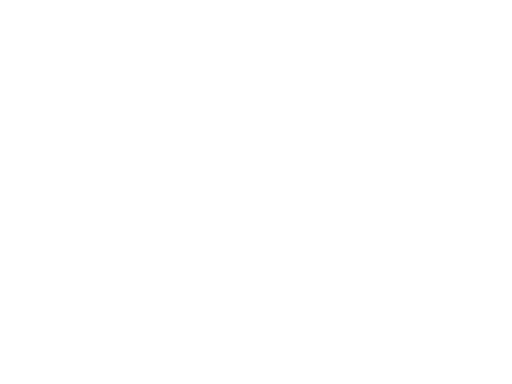

0.73
683351250.0668555


<IPython.core.display.Javascript object>


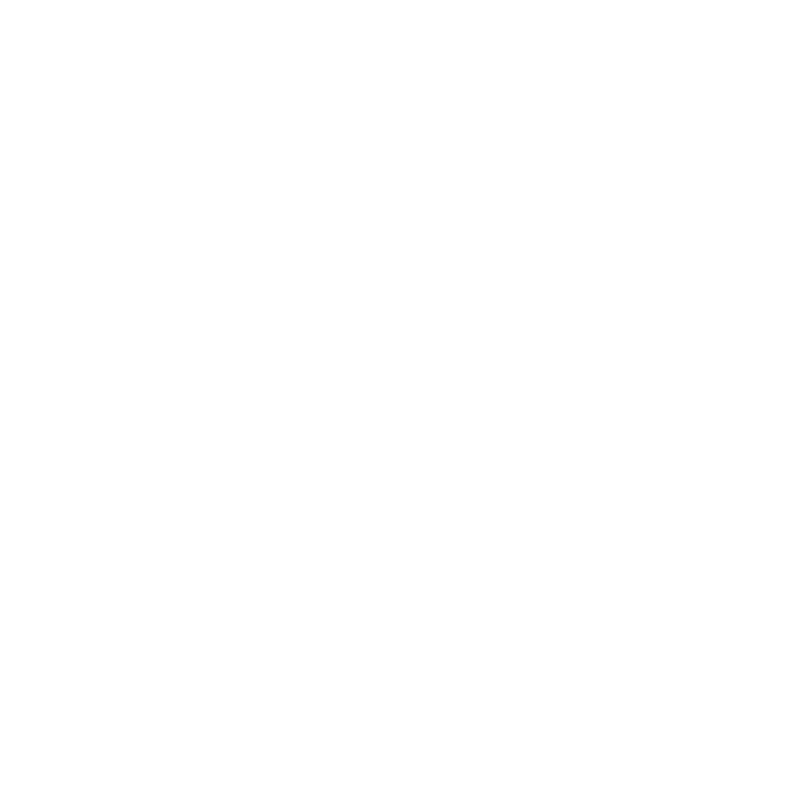

('bg:', 14241.722753469154)
('bg:', 14241.722753469154)
('bg:', 14241.722753469154)
('bg:', 14241.722753469154)
('bg:', 14241.722753469154)
('bg:', 14241.722753469154)
('bg:', 14241.722753469154)
('bg:', 14241.722753469154)


<IPython.core.display.Javascript object>


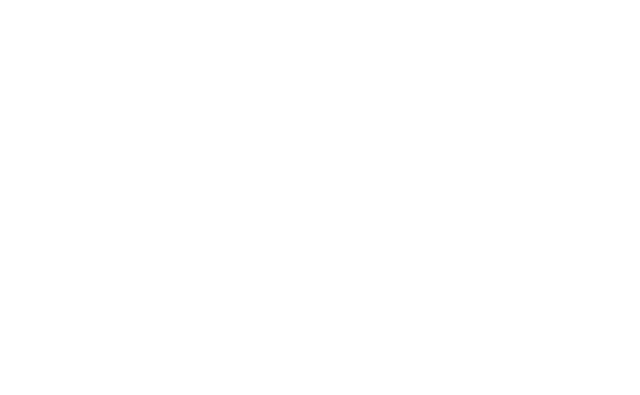

<IPython.core.display.Javascript object>


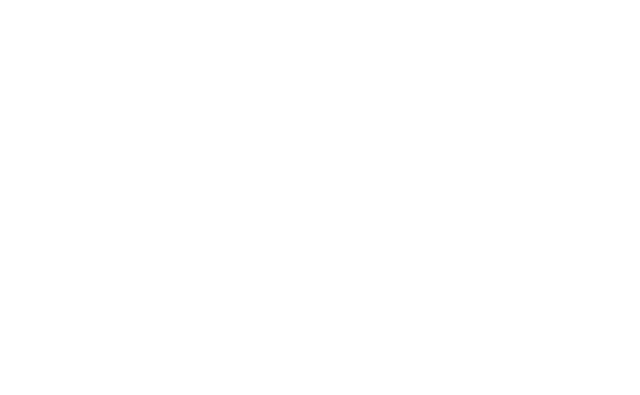

<IPython.core.display.Javascript object>


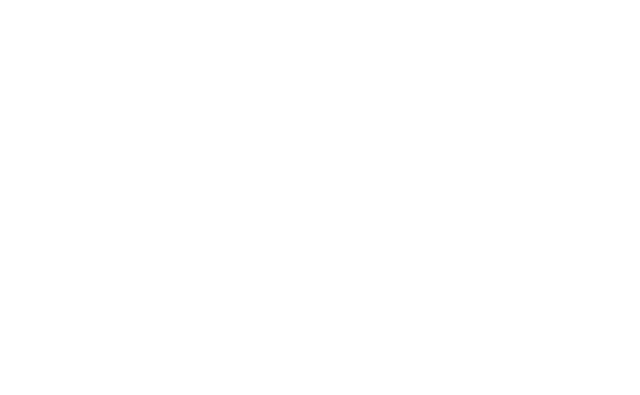

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:263: RuntimeWarning: divide by zero encountered in power


In [1114]:
#settings
ROI=2
#data_dir = "X:\\Ryan C\\Data\\DDM_Karthik\\20210715\\tif files\\Finished\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20210902\\"
#data_dir = "Y:\\Karthik_KRP\\Data\\DDM_DNA_MT\\20210902\\Philip data\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20211001\\"
#data_file = "%s_%s_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
#data_file = "%s_%s_BH-filter_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
data_file = "Trial_%s_%s%s128_FFTDIFFS_dts_ffts_ravs.p" %(video,side,ROI)
#data_file = "Trial_%s_B%s64_FFTDIFFS_dts_ffts_ravs.p" %(video, ROI)

dat = pickle.load(open(data_dir+data_file,'rb'))
ravs = dat['ravs'] 
dts  = dat['dts']
ffts = dat['ffts']
times = dts/framerate
print(dts)
print(times)

%matplotlib notebook
q_index = -1 #the last index
#backg = 2632 #change me! 
backg = np.mean(ravs[:,q_index])
pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=ravs[:,q_index],bg=backg, double=False, fps=framerate)
plt.plot(times, ravs[:,q_index],'ro') #plot the data
plt.plot(times, ddm.dTheory(times,*pars), '-k', lw=4) #see how well the initial guess performs
ax = plt.gca()
plt.text(0.8, 0.2, 'Index of q-value: %i' % q_index, horizontalalignment='center', verticalalignment='center', 
           transform=ax.transAxes, fontdict=font_plt)
plt.xlabel('Time (s)');
np.mean(ravs[:,q_index])
qq= [0.4,0.415,0.43,0.445,0.46,0.475,0.49,0.5,0.515,0.525,0.54,0.55,0.565,0.575,0.59,0.6,0.615,0.63,0.645,0.65,0.665,
         0.675,0.69,0.7,0.715,0.73,0.745,0.75,0.765,0.78,0.795,0.81,0.825,0.84,0.855,0.87,0.89,0.9,0.915,0.93,0.945,
         0.95,0.975,0.99,1.1]
pp=qq[1]

def two_rounds_fitting(data, times,pp):
    '''
    This function does two rounds of fitting. 
    First it uses SciPy's least-squares fitting:
        https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.leastsq.html
    Then, it uses the Levenberg-Marquardt method with the mpfit module. 
    '''

    pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=data, bg=backg, double=False, fps=framerate)
    #Paramters:
    # Amplitude-0, TimeConst-1, Background-2, Alpha (strtching exp), (... same for second exp..))
    minp[3]=0
    maxp[3]=2
    pars[3]=pp#CHANGE STRECTHING EXPONENT HERE
    
    maxp[2]=200000000
    minp[2]=10
    pars[2]=backg# change this to the amplitude of the q fit show in the plot above
    

    maxp[1] = 100000000000 #Decay Time Range
    minp[1] = 0.001
     
    maxp[5] = 100
    
    fix[3]= True#Fix alpha
    fix[2]= True #Fix bg
    
   
    fix[6]= False #6 is the stretching exponent for 2nd exponential
    pars[6] = 0.3
    minp[6] = 0.3 #min alpha2\n",
    maxp[6] = 1.5  #max alpha2\n",
    
    pars[5] = 0.1*pars[1] #5 is the time const for 2nd exponential
    minp[5] = 0.01
    '''
    #Leave this commented out for single exponential fits
    totamp = pars[0]+pars[4] ##0 and 4 are the amplitudes
    pars[4] = 0.4*totamp
    pars[0] = 0.4*totamp'''
    

    #The ddm.newFitLeastsq function does not check whether the parameters are within the
    #  minimum and maximum bounds. It uses SciPy's optimize.leastsq. 
    fitparams_lsq,theory_lsq = ddm.newFitLeastsq(data,times,pars,minp,maxp,lmin,lmax,fix,logfit=False)
    newPars = fitparams_lsq.copy()
    
    #We'll use the found parameters from SciPy's optimize.leastsq and feed them into the
    #  Levenberg-Marquardt function. Before we do so, we'll check that none of the found
    #  parameters are outside the min/max bounds. 
    for i,p in enumerate(fitparams_lsq):
        if p>maxp[i]:
            newPars[i] = maxp[i]*0.9
        if p<minp[i]:
            if p<0:
                newPars[i]=abs(p)
                if newPars[i]>maxp[i]:
                    newPars[i] = maxp[i]*0.9
                elif newPars[i]<minp[i]:
                    newPars[i] = minp[i]*1.1
            else:
                newPars[i] = minp[i]*1.1
                
    #Now use the Levenberg-Marquardt function. It returns the optimized paramters (fitparamsB), the 
    #  best fit (theoryB), any error codes, and the chi-squared value (the sum of squares of the error)
    fitparamsB, theoryB, errCodeB, chi2B = ddm.newFit(data,times,newPars,minp,maxp,lmin,lmax,fix,
                                                      logfit=False,quiet=True,factor=0.8)
    
    return fitparamsB, theoryB, chi2B
q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops

gg=np.zeros((11,45))

a_list=np.zeros((1,45))
for k in range(45):
    for i,q_index in enumerate([5,6,7,8,9,10,11,12,13,14,15]):
        pp=qq[k]
        fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],pp)
        gg[i,k]=chi2B
    #a_list[:,k]=sum(gg[:,k])/len(gg[:,k])
a_list=gg.mean(0)
#print(a_list)
min_ele=a_list[0]
rr=qq[0]
for i in range(1,len(a_list)):
    if a_list[i]<min_ele:
        min_ele=a_list[i]
        rr=qq[i]
print(rr)
print(min_ele)

%matplotlib notebook
plt.figure(figsize=(10,10)) #Create figure of size 10x10 (inches)

q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops
#Loop over four different q-values to do the fit
#for i,q_index in enumerate([2, 5,10,15,20,25,30,35]):
for i,q_index in enumerate([4,7,10,15,17,20,25,30]):
    fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],rr)
    #print len(theoryB)
    ax = plt.subplot(4,2,i+1) #creating 4 subplots in a 2x2 grid
    matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
    ax.semilogx(times,ravs[:,q_index],'ro',alpha=0.4)
    ax.plot(times[:len(theoryB)], theoryB, '-b',lw=3)
    ax.text(0.05,0.88,'Decay time: %.2f s' % fitparamsB[1], 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.76,'Stretching expo: %.2f, %.2f' % (fitparamsB[3], fitparamsB[6]), 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.64,'Amptlidue1: %.2f' % (fitparamsB[0]),
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel("Time (s)", fontdict=font_plt_ax)
    ax.set_title("Fit for q-index of %i. So q = %.3f 1/$\mu$m" % (q_index, q[q_index]), fontdict=font_plt_ax)
    print ("bg:", fitparamsB[2])
    plt.savefig(data_dir + "%s_%s_%s_ISFs.png" %(video,side,ROI))




# So, you have fixed the background AND changed the stretching exponent range, but your fits still seem kind of bad! You can continue onto the next steps to check out some of the other paramters. Your issue might be there!
fitparams = np.zeros((ravs.shape[1],7))
theory = np.zeros((ravs.shape[1],len(times[:end_time])))
tau = np.zeros_like(ravs[0,:]) #decay time
amp = np.zeros_like(tau) #amplitude
bg = np.zeros_like(tau) #background
alph = np.zeros_like(tau) #alpha (stretching exponent)
amp2 = np.zeros_like(tau) #amplitude
tau2 = np.zeros_like(tau) #background
alph2 = np.zeros_like(tau) #alpha (stretching exponent)
chi2 = np.zeros_like(tau)
for i in range(1,len(tau)):
    fitparams[i], theory[i], chi2[i] = two_rounds_fitting(ravs[:end_time,i], times[:end_time],rr)
    amp[i] = fitparams[i][0]
    bg[i] = fitparams[i][2]
    tau[i] = fitparams[i][1]
    alph[i] = fitparams[i][3]
    amp2[i] = fitparams[i][4]
    tau2[i] = fitparams[i][5]
    alph2[i] = fitparams[i][6]
#Plot the amplitude versus the wave vector

fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], amp[2:-1], 'ro')
ax.loglog(q[3:-1], amp2[2:-1], 'bd')
w = amp[2:-1].argmax() #argmax returns the index of the array that has the max value
q_for_max_a = q[2:-2][w]
ax.loglog(q[3:-1], bg[2:-1], 'bo') #Plot the background versus the wave vector
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("Amplitude (red); amp2 (red); bg (grn)", fontdict=font_plt_ax)

ax.text(0.2,0.7,'Max A at 1/q = %.3f' % (1.0/q_for_max_a), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);
ax.text(0.2,0.8,'Mean Background = %.3f' % (bg[4:14].mean()), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);




#Plot the str exponent versus the wave vector
fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], alph[2:-1], 'ro')
ax.loglog(q[3:-1], alph2[2:-1], 'bo')
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("stretching exponent", fontdict=font_plt_ax)









#Plot the decay time versus the wave vector
fig = plt.figure(figsize=(8,8/1.618)); ax = fig.gca(); 
#ax.loglog(q[3:-1], tau[2:-1], 'ro')
qs = q[2:-2]
qend=-1
q0=q[2:qend]
tau0 = ddm.newt(tau[2:qend],alph[2:qend])
#ax.loglog(qs, tau[2:-1], 'ro')
ax.loglog(q[3:qend], ddm.newt(tau[2:qend],alph[2:qend]),'bo') # this is for the first exponential
#ax.loglog(q[2:-31],tau[2:-30],'ro')
#ax.loglog(q[3:-30], ddm.newt(tau2[2:-30],alph2[2:-30]),'ro') # this is for the second
#ax.loglog(q[3:-30], tau2[2:-30],'go')


#aa=[0,1,2,3,4,5,6]
#bb=[10,11,12,13,14,15,16,17,18,19,20]
#Setting range of q values for fitting the data 
#for i in range(aa)
   # for j in range(bb)
minq=4
maxq=14

qmin=q[minq]
qmax=q[maxq]
new_taus=ddm.newt(tau[2:qend],alph[2:qend])

b = np.where((q>=qmin)&(q<=qmax))
ax.plot(q[b[0]+3],new_taus[b[0]],'r+',label='good q range')
#ax.plot(q[b], new_taus[b], 'r+')

ax.set_xlim(0.9,50)
ax.set_ylim(0.0001,10000)

## q^-2, does it look diffusive ?
diffusion_coeff = .1 # CHANGE DIFFUSION COEFFICIENT
power = 2.0 
ax.plot(q[1:-1], (1./diffusion_coeff) * 1./(q[1:-1]**power), '--c', label="Diffusive")


#Fitting data to a line
a = np.polyfit(np.log(q[b[0]+3]),np.log(new_taus[b[0]]), 1)

slope=a[0]
coef1 = np.exp(a[1])
alpha = 2./(-1*slope)
Dif = (1.0/coef1)**alpha
tau_fit = coef1*(q**(-2.0/alpha))
ax.plot(q, tau_fit, '-k', label = "best fit line")
plt.legend()

## does it fit some other power?
#adiffusion_coeff = .022
#power2 = 3
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')

#adiffusion_coeff = 0.018
#power2 = 1
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')


ax.text(0.55,0.15,'D = %.4f um2/s' % diffusion_coeff,
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
ax.text(3,380,"slope: %.4f" %slope)
ax.set_xlabel("q (um^-1)", fontdict=font_plt_ax)
ax.set_ylabel("tau (s)", fontdict=font_plt_ax)
ax.text(3,660,"alpha: %.4f" %alpha)
plt.savefig(data_dir+ "%s_%s_%s_Tau_vs_q.png" %(video,side,ROI))

#################################################################################################
allResults['fitparams_'+str(video)+'_'+str(ROI)] = fitparams
allResults['theory_'+str(video)+'_'+str(ROI)] = theory
allResults['chi2_'+str(video)+'_'+str(ROI)] = chi2
allResults['ravs_'+str(video)+'_'+str(ROI)] = ravs
allResults['dts'] = dts
allResults.keys()
ravs1=ravs[:,4]
ravs2=ravs[:,7]
ravs3=ravs[:,10]
ravs4=ravs[:,15]
ravs5=ravs[:,17]
ravs6=ravs[:,20]
ravs7=ravs[:,25]
ravs8=ravs[:,30]
a=[0]*(len(times)-len(q))
b=[0]*(len(times)-len(tau))
qs=np.append(q,a)
taus=np.append(tau,b)

Final_Data=np.transpose(np.vstack([times,ravs1,ravs2,ravs3,ravs4,ravs5,ravs6,ravs7,ravs8,qs,taus]))
Final_Data_1=(np.vstack([taus]))
np.savetxt(data_dir+ "onlyT_%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data_1, delimiter=',')
np.savetxt(data_dir+ "%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data, delimiter=',')
#np.savetxt('C:\\Users\\kpeddireddy\\Desktop\\test\\1_1_full_Final_Data.csv', Final_Data, delimiter=',')




import pandas as pd
df=pd.DataFrame(Final_Data_1)
df.to_csv(data_dir+ "%s_Tau_vs_q.csv" %(speed), mode='a', index=False, header=False)

[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192  193  194  196  197
  198 

<IPython.core.display.Javascript object>


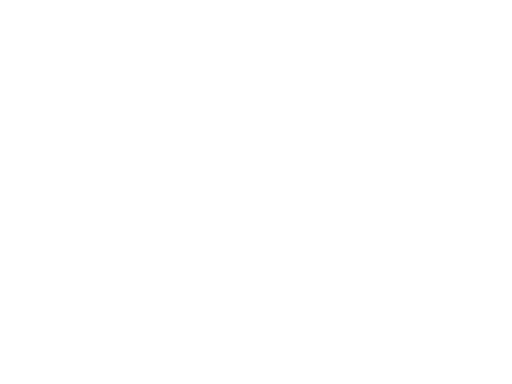

0.675
648436871.1003071


<IPython.core.display.Javascript object>


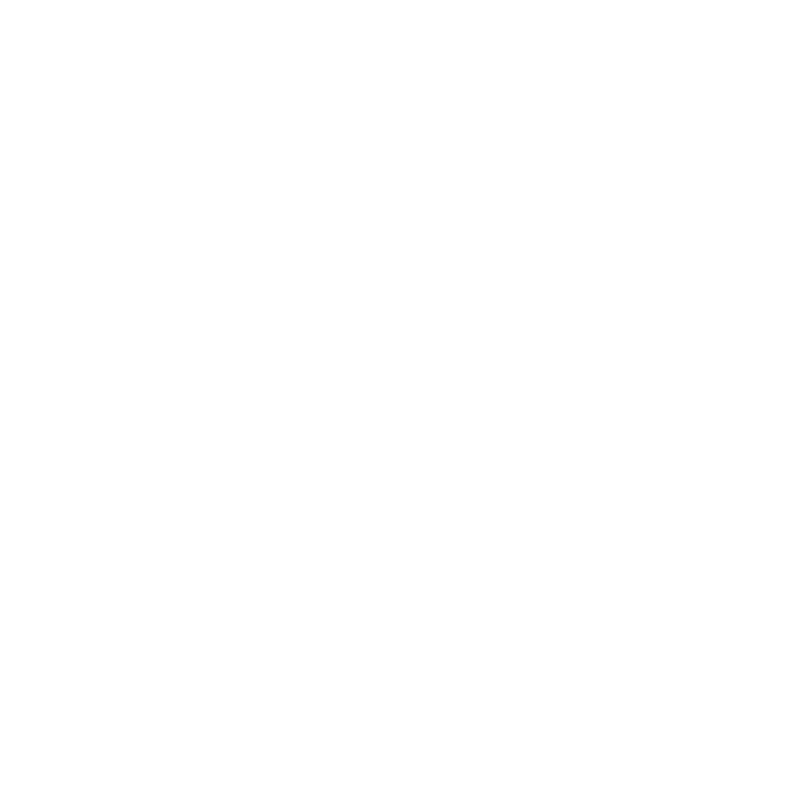

('bg:', 14262.045370440299)
('bg:', 14262.045370440299)
('bg:', 14262.045370440299)
('bg:', 14262.045370440299)
('bg:', 14262.045370440299)
('bg:', 14262.045370440299)
('bg:', 14262.045370440299)
('bg:', 14262.045370440299)


<IPython.core.display.Javascript object>


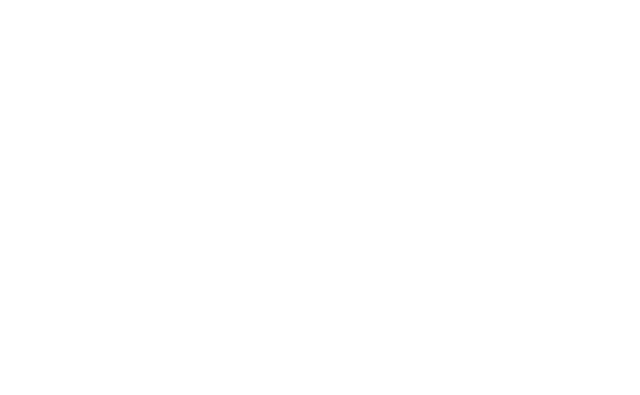

<IPython.core.display.Javascript object>


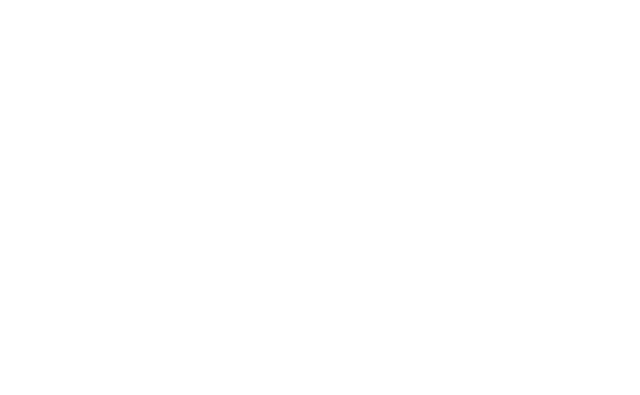

<IPython.core.display.Javascript object>


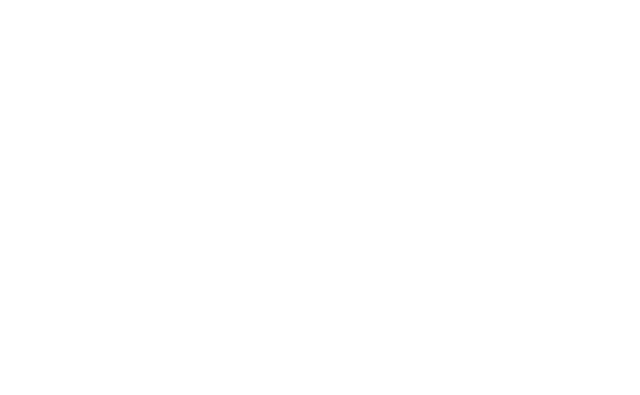

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:263: RuntimeWarning: divide by zero encountered in power


In [1115]:
#settings
ROI=3
#data_dir = "X:\\Ryan C\\Data\\DDM_Karthik\\20210715\\tif files\\Finished\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20210902\\"
#data_dir = "Y:\\Karthik_KRP\\Data\\DDM_DNA_MT\\20210902\\Philip data\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20211001\\"
#data_file = "%s_%s_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
#data_file = "%s_%s_BH-filter_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
data_file = "Trial_%s_%s%s128_FFTDIFFS_dts_ffts_ravs.p" %(video,side,ROI)
#data_file = "Trial_%s_B%s64_FFTDIFFS_dts_ffts_ravs.p" %(video, ROI)

dat = pickle.load(open(data_dir+data_file,'rb'))
ravs = dat['ravs'] 
dts  = dat['dts']
ffts = dat['ffts']
times = dts/framerate
print(dts)
print(times)

%matplotlib notebook
q_index = -1 #the last index
#backg = 2632 #change me! 
backg = np.mean(ravs[:,q_index])
pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=ravs[:,q_index],bg=backg, double=False, fps=framerate)
plt.plot(times, ravs[:,q_index],'ro') #plot the data
plt.plot(times, ddm.dTheory(times,*pars), '-k', lw=4) #see how well the initial guess performs
ax = plt.gca()
plt.text(0.8, 0.2, 'Index of q-value: %i' % q_index, horizontalalignment='center', verticalalignment='center', 
           transform=ax.transAxes, fontdict=font_plt)
plt.xlabel('Time (s)');
np.mean(ravs[:,q_index])
qq= [0.4,0.415,0.43,0.445,0.46,0.475,0.49,0.5,0.515,0.525,0.54,0.55,0.565,0.575,0.59,0.6,0.615,0.63,0.645,0.65,0.665,
         0.675,0.69,0.7,0.715,0.73,0.745,0.75,0.765,0.78,0.795,0.81,0.825,0.84,0.855,0.87,0.89,0.9,0.915,0.93,0.945,
         0.95,0.975,0.99,1.1]
pp=qq[1]

def two_rounds_fitting(data, times,pp):
    '''
    This function does two rounds of fitting. 
    First it uses SciPy's least-squares fitting:
        https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.leastsq.html
    Then, it uses the Levenberg-Marquardt method with the mpfit module. 
    '''

    pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=data, bg=backg, double=False, fps=framerate)
    #Paramters:
    # Amplitude-0, TimeConst-1, Background-2, Alpha (strtching exp), (... same for second exp..))
    minp[3]=0
    maxp[3]=2
    pars[3]=pp#CHANGE STRECTHING EXPONENT HERE
    
    maxp[2]=200000000
    minp[2]=10
    pars[2]=backg# change this to the amplitude of the q fit show in the plot above
    

    maxp[1] = 100000000000 #Decay Time Range
    minp[1] = 0.001
     
    maxp[5] = 100
    
    fix[3]= True#Fix alpha
    fix[2]= True #Fix bg
    
   
    fix[6]= False #6 is the stretching exponent for 2nd exponential
    pars[6] = 0.3
    minp[6] = 0.3 #min alpha2\n",
    maxp[6] = 1.5  #max alpha2\n",
    
    pars[5] = 0.1*pars[1] #5 is the time const for 2nd exponential
    minp[5] = 0.01
    '''
    #Leave this commented out for single exponential fits
    totamp = pars[0]+pars[4] ##0 and 4 are the amplitudes
    pars[4] = 0.4*totamp
    pars[0] = 0.4*totamp'''
    

    #The ddm.newFitLeastsq function does not check whether the parameters are within the
    #  minimum and maximum bounds. It uses SciPy's optimize.leastsq. 
    fitparams_lsq,theory_lsq = ddm.newFitLeastsq(data,times,pars,minp,maxp,lmin,lmax,fix,logfit=False)
    newPars = fitparams_lsq.copy()
    
    #We'll use the found parameters from SciPy's optimize.leastsq and feed them into the
    #  Levenberg-Marquardt function. Before we do so, we'll check that none of the found
    #  parameters are outside the min/max bounds. 
    for i,p in enumerate(fitparams_lsq):
        if p>maxp[i]:
            newPars[i] = maxp[i]*0.9
        if p<minp[i]:
            if p<0:
                newPars[i]=abs(p)
                if newPars[i]>maxp[i]:
                    newPars[i] = maxp[i]*0.9
                elif newPars[i]<minp[i]:
                    newPars[i] = minp[i]*1.1
            else:
                newPars[i] = minp[i]*1.1
                
    #Now use the Levenberg-Marquardt function. It returns the optimized paramters (fitparamsB), the 
    #  best fit (theoryB), any error codes, and the chi-squared value (the sum of squares of the error)
    fitparamsB, theoryB, errCodeB, chi2B = ddm.newFit(data,times,newPars,minp,maxp,lmin,lmax,fix,
                                                      logfit=False,quiet=True,factor=0.8)
    
    return fitparamsB, theoryB, chi2B
q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops

gg=np.zeros((11,45))

a_list=np.zeros((1,45))
for k in range(45):
    for i,q_index in enumerate([5,6,7,8,9,10,11,12,13,14,15]):
        pp=qq[k]
        fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],pp)
        gg[i,k]=chi2B
    #a_list[:,k]=sum(gg[:,k])/len(gg[:,k])
a_list=gg.mean(0)
#print(a_list)
min_ele=a_list[0]
rr=qq[0]
for i in range(1,len(a_list)):
    if a_list[i]<min_ele:
        min_ele=a_list[i]
        rr=qq[i]
print(rr)
print(min_ele)

%matplotlib notebook
plt.figure(figsize=(10,10)) #Create figure of size 10x10 (inches)

q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops
#Loop over four different q-values to do the fit
#for i,q_index in enumerate([2, 5,10,15,20,25,30,35]):
for i,q_index in enumerate([4,7,10,15,17,20,25,30]):
    fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],rr)
    #print len(theoryB)
    ax = plt.subplot(4,2,i+1) #creating 4 subplots in a 2x2 grid
    matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
    ax.semilogx(times,ravs[:,q_index],'ro',alpha=0.4)
    ax.plot(times[:len(theoryB)], theoryB, '-b',lw=3)
    ax.text(0.05,0.88,'Decay time: %.2f s' % fitparamsB[1], 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.76,'Stretching expo: %.2f, %.2f' % (fitparamsB[3], fitparamsB[6]), 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.64,'Amptlidue1: %.2f' % (fitparamsB[0]),
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel("Time (s)", fontdict=font_plt_ax)
    ax.set_title("Fit for q-index of %i. So q = %.3f 1/$\mu$m" % (q_index, q[q_index]), fontdict=font_plt_ax)
    print ("bg:", fitparamsB[2])
    plt.savefig(data_dir + "%s_%s_%s_ISFs.png" %(video,side,ROI))




# So, you have fixed the background AND changed the stretching exponent range, but your fits still seem kind of bad! You can continue onto the next steps to check out some of the other paramters. Your issue might be there!
fitparams = np.zeros((ravs.shape[1],7))
theory = np.zeros((ravs.shape[1],len(times[:end_time])))
tau = np.zeros_like(ravs[0,:]) #decay time
amp = np.zeros_like(tau) #amplitude
bg = np.zeros_like(tau) #background
alph = np.zeros_like(tau) #alpha (stretching exponent)
amp2 = np.zeros_like(tau) #amplitude
tau2 = np.zeros_like(tau) #background
alph2 = np.zeros_like(tau) #alpha (stretching exponent)
chi2 = np.zeros_like(tau)
for i in range(1,len(tau)):
    fitparams[i], theory[i], chi2[i] = two_rounds_fitting(ravs[:end_time,i], times[:end_time],rr)
    amp[i] = fitparams[i][0]
    bg[i] = fitparams[i][2]
    tau[i] = fitparams[i][1]
    alph[i] = fitparams[i][3]
    amp2[i] = fitparams[i][4]
    tau2[i] = fitparams[i][5]
    alph2[i] = fitparams[i][6]
#Plot the amplitude versus the wave vector

fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], amp[2:-1], 'ro')
ax.loglog(q[3:-1], amp2[2:-1], 'bd')
w = amp[2:-1].argmax() #argmax returns the index of the array that has the max value
q_for_max_a = q[2:-2][w]
ax.loglog(q[3:-1], bg[2:-1], 'bo') #Plot the background versus the wave vector
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("Amplitude (red); amp2 (red); bg (grn)", fontdict=font_plt_ax)

ax.text(0.2,0.7,'Max A at 1/q = %.3f' % (1.0/q_for_max_a), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);
ax.text(0.2,0.8,'Mean Background = %.3f' % (bg[4:14].mean()), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);




#Plot the str exponent versus the wave vector
fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], alph[2:-1], 'ro')
ax.loglog(q[3:-1], alph2[2:-1], 'bo')
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("stretching exponent", fontdict=font_plt_ax)









#Plot the decay time versus the wave vector
fig = plt.figure(figsize=(8,8/1.618)); ax = fig.gca(); 
#ax.loglog(q[3:-1], tau[2:-1], 'ro')
qs = q[2:-2]
qend=-1
q0=q[2:qend]
tau0 = ddm.newt(tau[2:qend],alph[2:qend])
#ax.loglog(qs, tau[2:-1], 'ro')
ax.loglog(q[3:qend], ddm.newt(tau[2:qend],alph[2:qend]),'bo') # this is for the first exponential
#ax.loglog(q[2:-31],tau[2:-30],'ro')
#ax.loglog(q[3:-30], ddm.newt(tau2[2:-30],alph2[2:-30]),'ro') # this is for the second
#ax.loglog(q[3:-30], tau2[2:-30],'go')


#aa=[0,1,2,3,4,5,6]
#bb=[10,11,12,13,14,15,16,17,18,19,20]
#Setting range of q values for fitting the data 
#for i in range(aa)
   # for j in range(bb)
minq=4
maxq=14

qmin=q[minq]
qmax=q[maxq]
new_taus=ddm.newt(tau[2:qend],alph[2:qend])

b = np.where((q>=qmin)&(q<=qmax))
ax.plot(q[b[0]+3],new_taus[b[0]],'r+',label='good q range')
#ax.plot(q[b], new_taus[b], 'r+')

ax.set_xlim(0.9,50)
ax.set_ylim(0.0001,10000)

## q^-2, does it look diffusive ?
diffusion_coeff = .1 # CHANGE DIFFUSION COEFFICIENT
power = 2.0 
ax.plot(q[1:-1], (1./diffusion_coeff) * 1./(q[1:-1]**power), '--c', label="Diffusive")


#Fitting data to a line
a = np.polyfit(np.log(q[b[0]+3]),np.log(new_taus[b[0]]), 1)

slope=a[0]
coef1 = np.exp(a[1])
alpha = 2./(-1*slope)
Dif = (1.0/coef1)**alpha
tau_fit = coef1*(q**(-2.0/alpha))
ax.plot(q, tau_fit, '-k', label = "best fit line")
plt.legend()

## does it fit some other power?
#adiffusion_coeff = .022
#power2 = 3
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')

#adiffusion_coeff = 0.018
#power2 = 1
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')


ax.text(0.55,0.15,'D = %.4f um2/s' % diffusion_coeff,
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
ax.text(3,380,"slope: %.4f" %slope)
ax.set_xlabel("q (um^-1)", fontdict=font_plt_ax)
ax.set_ylabel("tau (s)", fontdict=font_plt_ax)
ax.text(3,660,"alpha: %.4f" %alpha)
plt.savefig(data_dir+ "%s_%s_%s_Tau_vs_q.png" %(video,side,ROI))

#################################################################################################
allResults['fitparams_'+str(video)+'_'+str(ROI)] = fitparams
allResults['theory_'+str(video)+'_'+str(ROI)] = theory
allResults['chi2_'+str(video)+'_'+str(ROI)] = chi2
allResults['ravs_'+str(video)+'_'+str(ROI)] = ravs
allResults['dts'] = dts
allResults.keys()
ravs1=ravs[:,4]
ravs2=ravs[:,7]
ravs3=ravs[:,10]
ravs4=ravs[:,15]
ravs5=ravs[:,17]
ravs6=ravs[:,20]
ravs7=ravs[:,25]
ravs8=ravs[:,30]
a=[0]*(len(times)-len(q))
b=[0]*(len(times)-len(tau))
qs=np.append(q,a)
taus=np.append(tau,b)

Final_Data=np.transpose(np.vstack([times,ravs1,ravs2,ravs3,ravs4,ravs5,ravs6,ravs7,ravs8,qs,taus]))
Final_Data_1=(np.vstack([taus]))
np.savetxt(data_dir+ "onlyT_%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data_1, delimiter=',')
np.savetxt(data_dir+ "%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data, delimiter=',')
#np.savetxt('C:\\Users\\kpeddireddy\\Desktop\\test\\1_1_full_Final_Data.csv', Final_Data, delimiter=',')




import pandas as pd
df=pd.DataFrame(Final_Data_1)
df.to_csv(data_dir+ "%s_Tau_vs_q.csv" %(speed), mode='a', index=False, header=False)

[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192  193  194  196  197
  198 

<IPython.core.display.Javascript object>


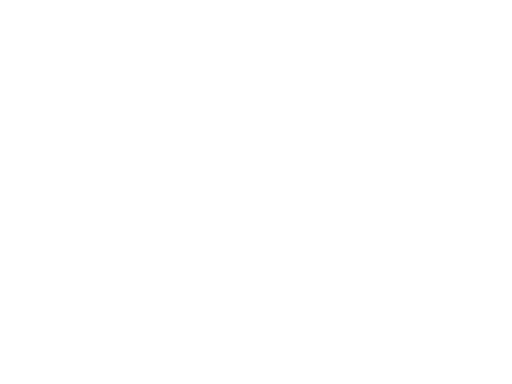

0.645
652707968.6347241


<IPython.core.display.Javascript object>


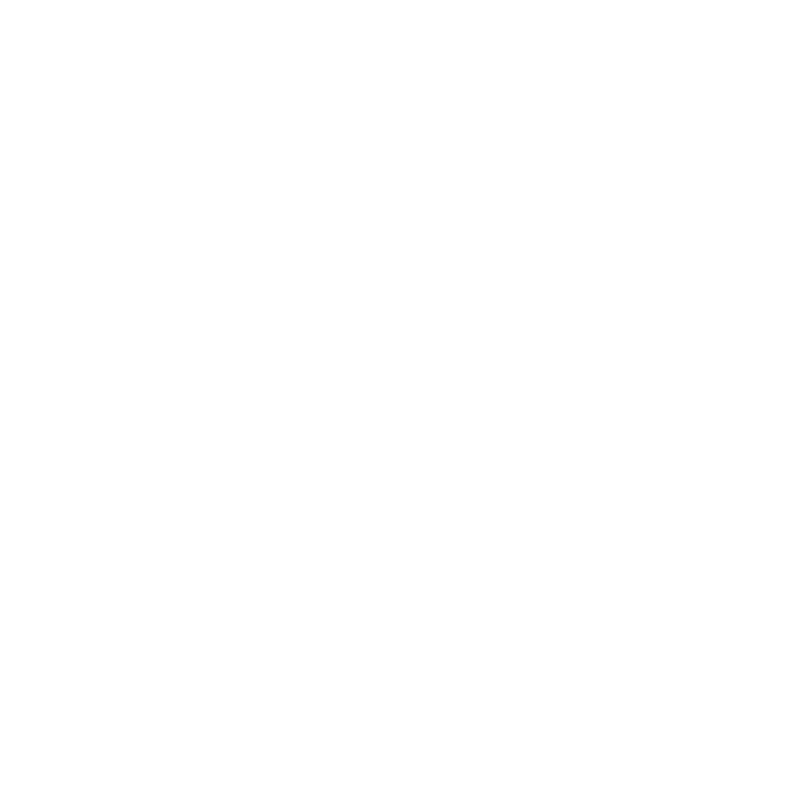

('bg:', 14309.81018242277)
('bg:', 14309.81018242277)
('bg:', 14309.81018242277)
('bg:', 14309.81018242277)
('bg:', 14309.81018242277)
('bg:', 14309.81018242277)
('bg:', 14309.81018242277)
('bg:', 14309.81018242277)


<IPython.core.display.Javascript object>


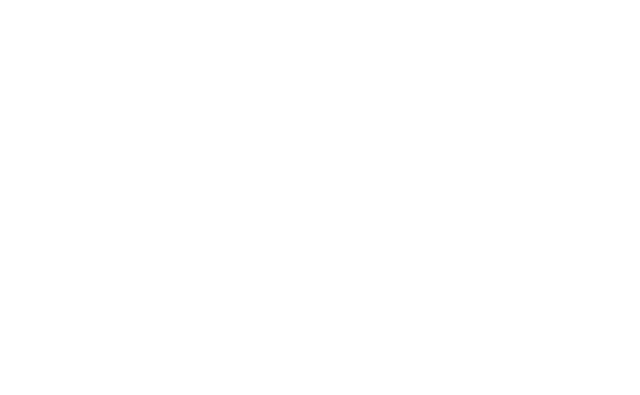

<IPython.core.display.Javascript object>


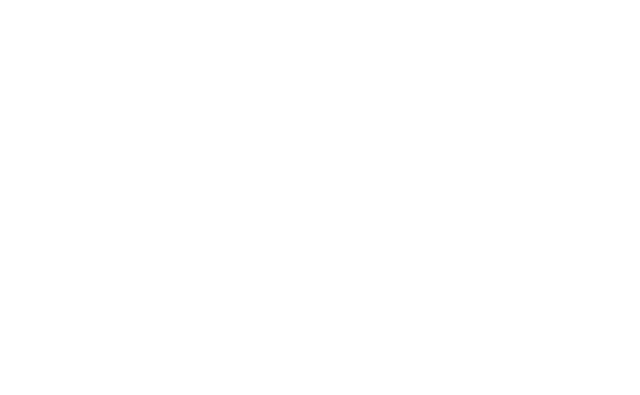

<IPython.core.display.Javascript object>


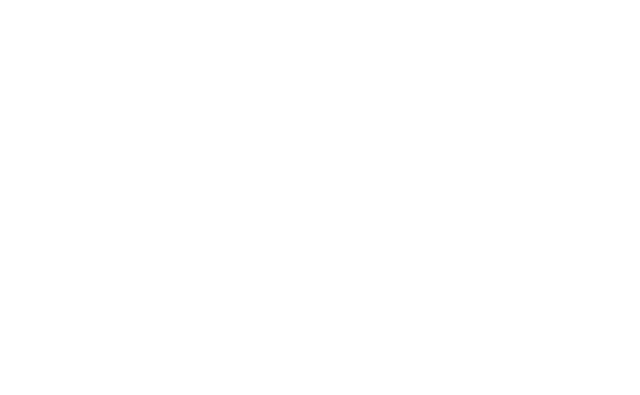

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:263: RuntimeWarning: divide by zero encountered in power


In [1116]:
#settings
ROI=4
#data_dir = "X:\\Ryan C\\Data\\DDM_Karthik\\20210715\\tif files\\Finished\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20210902\\"
#data_dir = "Y:\\Karthik_KRP\\Data\\DDM_DNA_MT\\20210902\\Philip data\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20211001\\"
#data_file = "%s_%s_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
#data_file = "%s_%s_BH-filter_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
data_file = "Trial_%s_%s%s128_FFTDIFFS_dts_ffts_ravs.p" %(video,side,ROI)
#data_file = "Trial_%s_B%s64_FFTDIFFS_dts_ffts_ravs.p" %(video, ROI)

dat = pickle.load(open(data_dir+data_file,'rb'))
ravs = dat['ravs'] 
dts  = dat['dts']
ffts = dat['ffts']
times = dts/framerate
print(dts)
print(times)

%matplotlib notebook
q_index = -1 #the last index
#backg = 2632 #change me! 
backg = np.mean(ravs[:,q_index])
pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=ravs[:,q_index],bg=backg, double=False, fps=framerate)
plt.plot(times, ravs[:,q_index],'ro') #plot the data
plt.plot(times, ddm.dTheory(times,*pars), '-k', lw=4) #see how well the initial guess performs
ax = plt.gca()
plt.text(0.8, 0.2, 'Index of q-value: %i' % q_index, horizontalalignment='center', verticalalignment='center', 
           transform=ax.transAxes, fontdict=font_plt)
plt.xlabel('Time (s)');
np.mean(ravs[:,q_index])
qq= [0.4,0.415,0.43,0.445,0.46,0.475,0.49,0.5,0.515,0.525,0.54,0.55,0.565,0.575,0.59,0.6,0.615,0.63,0.645,0.65,0.665,
         0.675,0.69,0.7,0.715,0.73,0.745,0.75,0.765,0.78,0.795,0.81,0.825,0.84,0.855,0.87,0.89,0.9,0.915,0.93,0.945,
         0.95,0.975,0.99,1.1]
pp=qq[1]

def two_rounds_fitting(data, times,pp):
    '''
    This function does two rounds of fitting. 
    First it uses SciPy's least-squares fitting:
        https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.leastsq.html
    Then, it uses the Levenberg-Marquardt method with the mpfit module. 
    '''

    pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=data, bg=backg, double=False, fps=framerate)
    #Paramters:
    # Amplitude-0, TimeConst-1, Background-2, Alpha (strtching exp), (... same for second exp..))
    minp[3]=0
    maxp[3]=2
    pars[3]=pp#CHANGE STRECTHING EXPONENT HERE
    
    maxp[2]=200000000
    minp[2]=10
    pars[2]=backg# change this to the amplitude of the q fit show in the plot above
    

    maxp[1] = 100000000000 #Decay Time Range
    minp[1] = 0.001
     
    maxp[5] = 100
    
    fix[3]= True#Fix alpha
    fix[2]= True #Fix bg
    
   
    fix[6]= False #6 is the stretching exponent for 2nd exponential
    pars[6] = 0.3
    minp[6] = 0.3 #min alpha2\n",
    maxp[6] = 1.5  #max alpha2\n",
    
    pars[5] = 0.1*pars[1] #5 is the time const for 2nd exponential
    minp[5] = 0.01
    '''
    #Leave this commented out for single exponential fits
    totamp = pars[0]+pars[4] ##0 and 4 are the amplitudes
    pars[4] = 0.4*totamp
    pars[0] = 0.4*totamp'''
    

    #The ddm.newFitLeastsq function does not check whether the parameters are within the
    #  minimum and maximum bounds. It uses SciPy's optimize.leastsq. 
    fitparams_lsq,theory_lsq = ddm.newFitLeastsq(data,times,pars,minp,maxp,lmin,lmax,fix,logfit=False)
    newPars = fitparams_lsq.copy()
    
    #We'll use the found parameters from SciPy's optimize.leastsq and feed them into the
    #  Levenberg-Marquardt function. Before we do so, we'll check that none of the found
    #  parameters are outside the min/max bounds. 
    for i,p in enumerate(fitparams_lsq):
        if p>maxp[i]:
            newPars[i] = maxp[i]*0.9
        if p<minp[i]:
            if p<0:
                newPars[i]=abs(p)
                if newPars[i]>maxp[i]:
                    newPars[i] = maxp[i]*0.9
                elif newPars[i]<minp[i]:
                    newPars[i] = minp[i]*1.1
            else:
                newPars[i] = minp[i]*1.1
                
    #Now use the Levenberg-Marquardt function. It returns the optimized paramters (fitparamsB), the 
    #  best fit (theoryB), any error codes, and the chi-squared value (the sum of squares of the error)
    fitparamsB, theoryB, errCodeB, chi2B = ddm.newFit(data,times,newPars,minp,maxp,lmin,lmax,fix,
                                                      logfit=False,quiet=True,factor=0.8)
    
    return fitparamsB, theoryB, chi2B
q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops

gg=np.zeros((11,45))

a_list=np.zeros((1,45))
for k in range(45):
    for i,q_index in enumerate([5,6,7,8,9,10,11,12,13,14,15]):
        pp=qq[k]
        fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],pp)
        gg[i,k]=chi2B
    #a_list[:,k]=sum(gg[:,k])/len(gg[:,k])
a_list=gg.mean(0)
#print(a_list)
min_ele=a_list[0]
rr=qq[0]
for i in range(1,len(a_list)):
    if a_list[i]<min_ele:
        min_ele=a_list[i]
        rr=qq[i]
print(rr)
print(min_ele)

%matplotlib notebook
plt.figure(figsize=(10,10)) #Create figure of size 10x10 (inches)

q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops
#Loop over four different q-values to do the fit
#for i,q_index in enumerate([2, 5,10,15,20,25,30,35]):
for i,q_index in enumerate([4,7,10,15,17,20,25,30]):
    fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],rr)
    #print len(theoryB)
    ax = plt.subplot(4,2,i+1) #creating 4 subplots in a 2x2 grid
    matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
    ax.semilogx(times,ravs[:,q_index],'ro',alpha=0.4)
    ax.plot(times[:len(theoryB)], theoryB, '-b',lw=3)
    ax.text(0.05,0.88,'Decay time: %.2f s' % fitparamsB[1], 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.76,'Stretching expo: %.2f, %.2f' % (fitparamsB[3], fitparamsB[6]), 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.64,'Amptlidue1: %.2f' % (fitparamsB[0]),
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel("Time (s)", fontdict=font_plt_ax)
    ax.set_title("Fit for q-index of %i. So q = %.3f 1/$\mu$m" % (q_index, q[q_index]), fontdict=font_plt_ax)
    print ("bg:", fitparamsB[2])
    plt.savefig(data_dir + "%s_%s_%s_ISFs.png" %(video,side,ROI))




# So, you have fixed the background AND changed the stretching exponent range, but your fits still seem kind of bad! You can continue onto the next steps to check out some of the other paramters. Your issue might be there!
fitparams = np.zeros((ravs.shape[1],7))
theory = np.zeros((ravs.shape[1],len(times[:end_time])))
tau = np.zeros_like(ravs[0,:]) #decay time
amp = np.zeros_like(tau) #amplitude
bg = np.zeros_like(tau) #background
alph = np.zeros_like(tau) #alpha (stretching exponent)
amp2 = np.zeros_like(tau) #amplitude
tau2 = np.zeros_like(tau) #background
alph2 = np.zeros_like(tau) #alpha (stretching exponent)
chi2 = np.zeros_like(tau)
for i in range(1,len(tau)):
    fitparams[i], theory[i], chi2[i] = two_rounds_fitting(ravs[:end_time,i], times[:end_time],rr)
    amp[i] = fitparams[i][0]
    bg[i] = fitparams[i][2]
    tau[i] = fitparams[i][1]
    alph[i] = fitparams[i][3]
    amp2[i] = fitparams[i][4]
    tau2[i] = fitparams[i][5]
    alph2[i] = fitparams[i][6]
#Plot the amplitude versus the wave vector

fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], amp[2:-1], 'ro')
ax.loglog(q[3:-1], amp2[2:-1], 'bd')
w = amp[2:-1].argmax() #argmax returns the index of the array that has the max value
q_for_max_a = q[2:-2][w]
ax.loglog(q[3:-1], bg[2:-1], 'bo') #Plot the background versus the wave vector
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("Amplitude (red); amp2 (red); bg (grn)", fontdict=font_plt_ax)

ax.text(0.2,0.7,'Max A at 1/q = %.3f' % (1.0/q_for_max_a), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);
ax.text(0.2,0.8,'Mean Background = %.3f' % (bg[4:14].mean()), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);




#Plot the str exponent versus the wave vector
fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], alph[2:-1], 'ro')
ax.loglog(q[3:-1], alph2[2:-1], 'bo')
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("stretching exponent", fontdict=font_plt_ax)









#Plot the decay time versus the wave vector
fig = plt.figure(figsize=(8,8/1.618)); ax = fig.gca(); 
#ax.loglog(q[3:-1], tau[2:-1], 'ro')
qs = q[2:-2]
qend=-1
q0=q[2:qend]
tau0 = ddm.newt(tau[2:qend],alph[2:qend])
#ax.loglog(qs, tau[2:-1], 'ro')
ax.loglog(q[3:qend], ddm.newt(tau[2:qend],alph[2:qend]),'bo') # this is for the first exponential
#ax.loglog(q[2:-31],tau[2:-30],'ro')
#ax.loglog(q[3:-30], ddm.newt(tau2[2:-30],alph2[2:-30]),'ro') # this is for the second
#ax.loglog(q[3:-30], tau2[2:-30],'go')


#aa=[0,1,2,3,4,5,6]
#bb=[10,11,12,13,14,15,16,17,18,19,20]
#Setting range of q values for fitting the data 
#for i in range(aa)
   # for j in range(bb)
minq=4
maxq=14

qmin=q[minq]
qmax=q[maxq]
new_taus=ddm.newt(tau[2:qend],alph[2:qend])

b = np.where((q>=qmin)&(q<=qmax))
ax.plot(q[b[0]+3],new_taus[b[0]],'r+',label='good q range')
#ax.plot(q[b], new_taus[b], 'r+')

ax.set_xlim(0.9,50)
ax.set_ylim(0.0001,10000)

## q^-2, does it look diffusive ?
diffusion_coeff = .1 # CHANGE DIFFUSION COEFFICIENT
power = 2.0 
ax.plot(q[1:-1], (1./diffusion_coeff) * 1./(q[1:-1]**power), '--c', label="Diffusive")


#Fitting data to a line
a = np.polyfit(np.log(q[b[0]+3]),np.log(new_taus[b[0]]), 1)

slope=a[0]
coef1 = np.exp(a[1])
alpha = 2./(-1*slope)
Dif = (1.0/coef1)**alpha
tau_fit = coef1*(q**(-2.0/alpha))
ax.plot(q, tau_fit, '-k', label = "best fit line")
plt.legend()

## does it fit some other power?
#adiffusion_coeff = .022
#power2 = 3
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')

#adiffusion_coeff = 0.018
#power2 = 1
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')


ax.text(0.55,0.15,'D = %.4f um2/s' % diffusion_coeff,
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
ax.text(3,380,"slope: %.4f" %slope)
ax.set_xlabel("q (um^-1)", fontdict=font_plt_ax)
ax.set_ylabel("tau (s)", fontdict=font_plt_ax)
ax.text(3,660,"alpha: %.4f" %alpha)
plt.savefig(data_dir+ "%s_%s_%s_Tau_vs_q.png" %(video,side,ROI))

#################################################################################################
allResults['fitparams_'+str(video)+'_'+str(ROI)] = fitparams
allResults['theory_'+str(video)+'_'+str(ROI)] = theory
allResults['chi2_'+str(video)+'_'+str(ROI)] = chi2
allResults['ravs_'+str(video)+'_'+str(ROI)] = ravs
allResults['dts'] = dts
allResults.keys()
ravs1=ravs[:,4]
ravs2=ravs[:,7]
ravs3=ravs[:,10]
ravs4=ravs[:,15]
ravs5=ravs[:,17]
ravs6=ravs[:,20]
ravs7=ravs[:,25]
ravs8=ravs[:,30]
a=[0]*(len(times)-len(q))
b=[0]*(len(times)-len(tau))
qs=np.append(q,a)
taus=np.append(tau,b)

Final_Data=np.transpose(np.vstack([times,ravs1,ravs2,ravs3,ravs4,ravs5,ravs6,ravs7,ravs8,qs,taus]))
Final_Data_1=(np.vstack([taus]))
np.savetxt(data_dir+ "onlyT_%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data_1, delimiter=',')
np.savetxt(data_dir+ "%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data, delimiter=',')
#np.savetxt('C:\\Users\\kpeddireddy\\Desktop\\test\\1_1_full_Final_Data.csv', Final_Data, delimiter=',')




import pandas as pd
df=pd.DataFrame(Final_Data_1)
df.to_csv(data_dir+ "%s_Tau_vs_q.csv" %(speed), mode='a', index=False, header=False)

[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192  193  194  196  197
  198 

<IPython.core.display.Javascript object>


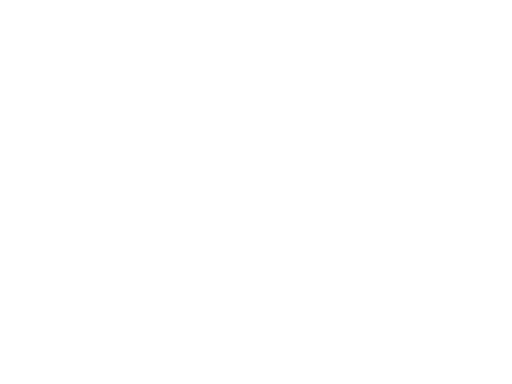

0.645
713434522.7141427


<IPython.core.display.Javascript object>


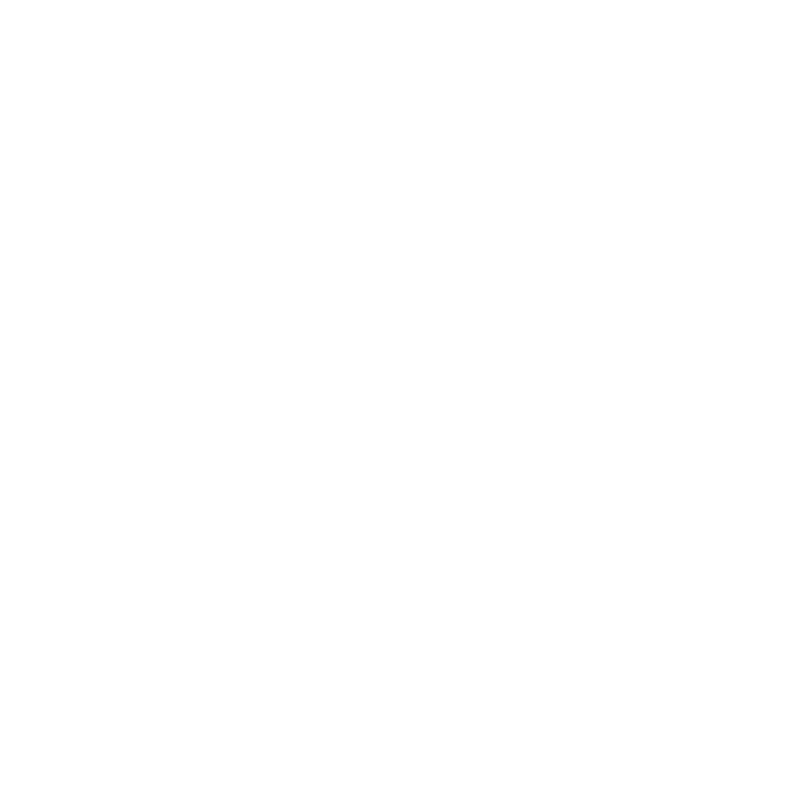

('bg:', 14222.2116841142)
('bg:', 14222.2116841142)
('bg:', 14222.2116841142)
('bg:', 14222.2116841142)
('bg:', 14222.2116841142)
('bg:', 14222.2116841142)
('bg:', 14222.2116841142)
('bg:', 14222.2116841142)


<IPython.core.display.Javascript object>


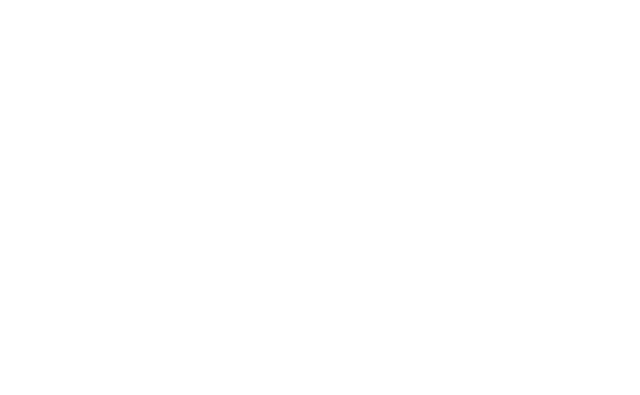

<IPython.core.display.Javascript object>


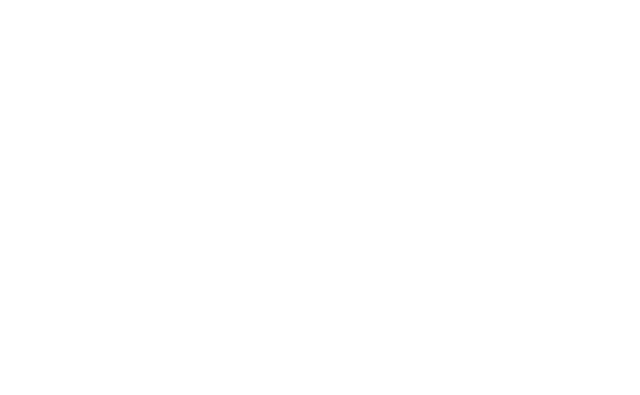

<IPython.core.display.Javascript object>


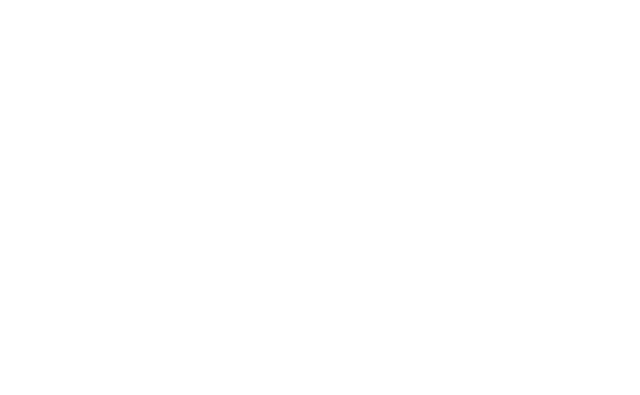

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:263: RuntimeWarning: divide by zero encountered in power


In [1117]:
#settings
ROI=5
#data_dir = "X:\\Ryan C\\Data\\DDM_Karthik\\20210715\\tif files\\Finished\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20210902\\"
#data_dir = "Y:\\Karthik_KRP\\Data\\DDM_DNA_MT\\20210902\\Philip data\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20211001\\"
#data_file = "%s_%s_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
#data_file = "%s_%s_BH-filter_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
data_file = "Trial_%s_%s%s128_FFTDIFFS_dts_ffts_ravs.p" %(video,side,ROI)
#data_file = "Trial_%s_B%s64_FFTDIFFS_dts_ffts_ravs.p" %(video, ROI)

dat = pickle.load(open(data_dir+data_file,'rb'))
ravs = dat['ravs'] 
dts  = dat['dts']
ffts = dat['ffts']
times = dts/framerate
print(dts)
print(times)

%matplotlib notebook
q_index = -1 #the last index
#backg = 2632 #change me! 
backg = np.mean(ravs[:,q_index])
pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=ravs[:,q_index],bg=backg, double=False, fps=framerate)
plt.plot(times, ravs[:,q_index],'ro') #plot the data
plt.plot(times, ddm.dTheory(times,*pars), '-k', lw=4) #see how well the initial guess performs
ax = plt.gca()
plt.text(0.8, 0.2, 'Index of q-value: %i' % q_index, horizontalalignment='center', verticalalignment='center', 
           transform=ax.transAxes, fontdict=font_plt)
plt.xlabel('Time (s)');
np.mean(ravs[:,q_index])
qq= [0.4,0.415,0.43,0.445,0.46,0.475,0.49,0.5,0.515,0.525,0.54,0.55,0.565,0.575,0.59,0.6,0.615,0.63,0.645,0.65,0.665,
         0.675,0.69,0.7,0.715,0.73,0.745,0.75,0.765,0.78,0.795,0.81,0.825,0.84,0.855,0.87,0.89,0.9,0.915,0.93,0.945,
         0.95,0.975,0.99,1.1]
pp=qq[1]

def two_rounds_fitting(data, times,pp):
    '''
    This function does two rounds of fitting. 
    First it uses SciPy's least-squares fitting:
        https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.leastsq.html
    Then, it uses the Levenberg-Marquardt method with the mpfit module. 
    '''

    pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=data, bg=backg, double=False, fps=framerate)
    #Paramters:
    # Amplitude-0, TimeConst-1, Background-2, Alpha (strtching exp), (... same for second exp..))
    minp[3]=0
    maxp[3]=2
    pars[3]=pp#CHANGE STRECTHING EXPONENT HERE
    
    maxp[2]=200000000
    minp[2]=10
    pars[2]=backg# change this to the amplitude of the q fit show in the plot above
    

    maxp[1] = 100000000000 #Decay Time Range
    minp[1] = 0.001
     
    maxp[5] = 100
    
    fix[3]= True#Fix alpha
    fix[2]= True #Fix bg
    
   
    fix[6]= False #6 is the stretching exponent for 2nd exponential
    pars[6] = 0.3
    minp[6] = 0.3 #min alpha2\n",
    maxp[6] = 1.5  #max alpha2\n",
    
    pars[5] = 0.1*pars[1] #5 is the time const for 2nd exponential
    minp[5] = 0.01
    '''
    #Leave this commented out for single exponential fits
    totamp = pars[0]+pars[4] ##0 and 4 are the amplitudes
    pars[4] = 0.4*totamp
    pars[0] = 0.4*totamp'''
    

    #The ddm.newFitLeastsq function does not check whether the parameters are within the
    #  minimum and maximum bounds. It uses SciPy's optimize.leastsq. 
    fitparams_lsq,theory_lsq = ddm.newFitLeastsq(data,times,pars,minp,maxp,lmin,lmax,fix,logfit=False)
    newPars = fitparams_lsq.copy()
    
    #We'll use the found parameters from SciPy's optimize.leastsq and feed them into the
    #  Levenberg-Marquardt function. Before we do so, we'll check that none of the found
    #  parameters are outside the min/max bounds. 
    for i,p in enumerate(fitparams_lsq):
        if p>maxp[i]:
            newPars[i] = maxp[i]*0.9
        if p<minp[i]:
            if p<0:
                newPars[i]=abs(p)
                if newPars[i]>maxp[i]:
                    newPars[i] = maxp[i]*0.9
                elif newPars[i]<minp[i]:
                    newPars[i] = minp[i]*1.1
            else:
                newPars[i] = minp[i]*1.1
                
    #Now use the Levenberg-Marquardt function. It returns the optimized paramters (fitparamsB), the 
    #  best fit (theoryB), any error codes, and the chi-squared value (the sum of squares of the error)
    fitparamsB, theoryB, errCodeB, chi2B = ddm.newFit(data,times,newPars,minp,maxp,lmin,lmax,fix,
                                                      logfit=False,quiet=True,factor=0.8)
    
    return fitparamsB, theoryB, chi2B
q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops

gg=np.zeros((11,45))

a_list=np.zeros((1,45))
for k in range(45):
    for i,q_index in enumerate([5,6,7,8,9,10,11,12,13,14,15]):
        pp=qq[k]
        fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],pp)
        gg[i,k]=chi2B
    #a_list[:,k]=sum(gg[:,k])/len(gg[:,k])
a_list=gg.mean(0)
#print(a_list)
min_ele=a_list[0]
rr=qq[0]
for i in range(1,len(a_list)):
    if a_list[i]<min_ele:
        min_ele=a_list[i]
        rr=qq[i]
print(rr)
print(min_ele)

%matplotlib notebook
plt.figure(figsize=(10,10)) #Create figure of size 10x10 (inches)

q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops
#Loop over four different q-values to do the fit
#for i,q_index in enumerate([2, 5,10,15,20,25,30,35]):
for i,q_index in enumerate([4,7,10,15,17,20,25,30]):
    fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],rr)
    #print len(theoryB)
    ax = plt.subplot(4,2,i+1) #creating 4 subplots in a 2x2 grid
    matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
    ax.semilogx(times,ravs[:,q_index],'ro',alpha=0.4)
    ax.plot(times[:len(theoryB)], theoryB, '-b',lw=3)
    ax.text(0.05,0.88,'Decay time: %.2f s' % fitparamsB[1], 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.76,'Stretching expo: %.2f, %.2f' % (fitparamsB[3], fitparamsB[6]), 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.64,'Amptlidue1: %.2f' % (fitparamsB[0]),
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel("Time (s)", fontdict=font_plt_ax)
    ax.set_title("Fit for q-index of %i. So q = %.3f 1/$\mu$m" % (q_index, q[q_index]), fontdict=font_plt_ax)
    print ("bg:", fitparamsB[2])
    plt.savefig(data_dir + "%s_%s_%s_ISFs.png" %(video,side,ROI))




# So, you have fixed the background AND changed the stretching exponent range, but your fits still seem kind of bad! You can continue onto the next steps to check out some of the other paramters. Your issue might be there!
fitparams = np.zeros((ravs.shape[1],7))
theory = np.zeros((ravs.shape[1],len(times[:end_time])))
tau = np.zeros_like(ravs[0,:]) #decay time
amp = np.zeros_like(tau) #amplitude
bg = np.zeros_like(tau) #background
alph = np.zeros_like(tau) #alpha (stretching exponent)
amp2 = np.zeros_like(tau) #amplitude
tau2 = np.zeros_like(tau) #background
alph2 = np.zeros_like(tau) #alpha (stretching exponent)
chi2 = np.zeros_like(tau)
for i in range(1,len(tau)):
    fitparams[i], theory[i], chi2[i] = two_rounds_fitting(ravs[:end_time,i], times[:end_time],rr)
    amp[i] = fitparams[i][0]
    bg[i] = fitparams[i][2]
    tau[i] = fitparams[i][1]
    alph[i] = fitparams[i][3]
    amp2[i] = fitparams[i][4]
    tau2[i] = fitparams[i][5]
    alph2[i] = fitparams[i][6]
#Plot the amplitude versus the wave vector

fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], amp[2:-1], 'ro')
ax.loglog(q[3:-1], amp2[2:-1], 'bd')
w = amp[2:-1].argmax() #argmax returns the index of the array that has the max value
q_for_max_a = q[2:-2][w]
ax.loglog(q[3:-1], bg[2:-1], 'bo') #Plot the background versus the wave vector
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("Amplitude (red); amp2 (red); bg (grn)", fontdict=font_plt_ax)

ax.text(0.2,0.7,'Max A at 1/q = %.3f' % (1.0/q_for_max_a), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);
ax.text(0.2,0.8,'Mean Background = %.3f' % (bg[4:14].mean()), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);




#Plot the str exponent versus the wave vector
fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], alph[2:-1], 'ro')
ax.loglog(q[3:-1], alph2[2:-1], 'bo')
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("stretching exponent", fontdict=font_plt_ax)









#Plot the decay time versus the wave vector
fig = plt.figure(figsize=(8,8/1.618)); ax = fig.gca(); 
#ax.loglog(q[3:-1], tau[2:-1], 'ro')
qs = q[2:-2]
qend=-1
q0=q[2:qend]
tau0 = ddm.newt(tau[2:qend],alph[2:qend])
#ax.loglog(qs, tau[2:-1], 'ro')
ax.loglog(q[3:qend], ddm.newt(tau[2:qend],alph[2:qend]),'bo') # this is for the first exponential
#ax.loglog(q[2:-31],tau[2:-30],'ro')
#ax.loglog(q[3:-30], ddm.newt(tau2[2:-30],alph2[2:-30]),'ro') # this is for the second
#ax.loglog(q[3:-30], tau2[2:-30],'go')


#aa=[0,1,2,3,4,5,6]
#bb=[10,11,12,13,14,15,16,17,18,19,20]
#Setting range of q values for fitting the data 
#for i in range(aa)
   # for j in range(bb)
minq=4
maxq=14

qmin=q[minq]
qmax=q[maxq]
new_taus=ddm.newt(tau[2:qend],alph[2:qend])

b = np.where((q>=qmin)&(q<=qmax))
ax.plot(q[b[0]+3],new_taus[b[0]],'r+',label='good q range')
#ax.plot(q[b], new_taus[b], 'r+')

ax.set_xlim(0.9,50)
ax.set_ylim(0.0001,10000)

## q^-2, does it look diffusive ?
diffusion_coeff = .1 # CHANGE DIFFUSION COEFFICIENT
power = 2.0 
ax.plot(q[1:-1], (1./diffusion_coeff) * 1./(q[1:-1]**power), '--c', label="Diffusive")


#Fitting data to a line
a = np.polyfit(np.log(q[b[0]+3]),np.log(new_taus[b[0]]), 1)

slope=a[0]
coef1 = np.exp(a[1])
alpha = 2./(-1*slope)
Dif = (1.0/coef1)**alpha
tau_fit = coef1*(q**(-2.0/alpha))
ax.plot(q, tau_fit, '-k', label = "best fit line")
plt.legend()

## does it fit some other power?
#adiffusion_coeff = .022
#power2 = 3
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')

#adiffusion_coeff = 0.018
#power2 = 1
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')


ax.text(0.55,0.15,'D = %.4f um2/s' % diffusion_coeff,
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
ax.text(3,380,"slope: %.4f" %slope)
ax.set_xlabel("q (um^-1)", fontdict=font_plt_ax)
ax.set_ylabel("tau (s)", fontdict=font_plt_ax)
ax.text(3,660,"alpha: %.4f" %alpha)
plt.savefig(data_dir+ "%s_%s_%s_Tau_vs_q.png" %(video,side,ROI))

#################################################################################################
allResults['fitparams_'+str(video)+'_'+str(ROI)] = fitparams
allResults['theory_'+str(video)+'_'+str(ROI)] = theory
allResults['chi2_'+str(video)+'_'+str(ROI)] = chi2
allResults['ravs_'+str(video)+'_'+str(ROI)] = ravs
allResults['dts'] = dts
allResults.keys()
ravs1=ravs[:,4]
ravs2=ravs[:,7]
ravs3=ravs[:,10]
ravs4=ravs[:,15]
ravs5=ravs[:,17]
ravs6=ravs[:,20]
ravs7=ravs[:,25]
ravs8=ravs[:,30]
a=[0]*(len(times)-len(q))
b=[0]*(len(times)-len(tau))
qs=np.append(q,a)
taus=np.append(tau,b)

Final_Data=np.transpose(np.vstack([times,ravs1,ravs2,ravs3,ravs4,ravs5,ravs6,ravs7,ravs8,qs,taus]))
Final_Data_1=(np.vstack([taus]))
np.savetxt(data_dir+ "onlyT_%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data_1, delimiter=',')
np.savetxt(data_dir+ "%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data, delimiter=',')
#np.savetxt('C:\\Users\\kpeddireddy\\Desktop\\test\\1_1_full_Final_Data.csv', Final_Data, delimiter=',')




import pandas as pd
df=pd.DataFrame(Final_Data_1)
df.to_csv(data_dir+ "%s_Tau_vs_q.csv" %(speed), mode='a', index=False, header=False)

[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192  193  194  196  197
  198 

<IPython.core.display.Javascript object>


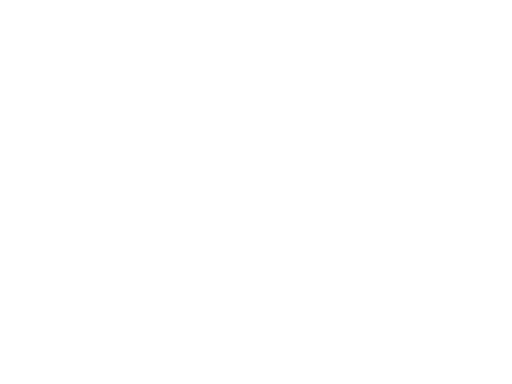

0.675
649219947.2514719


<IPython.core.display.Javascript object>


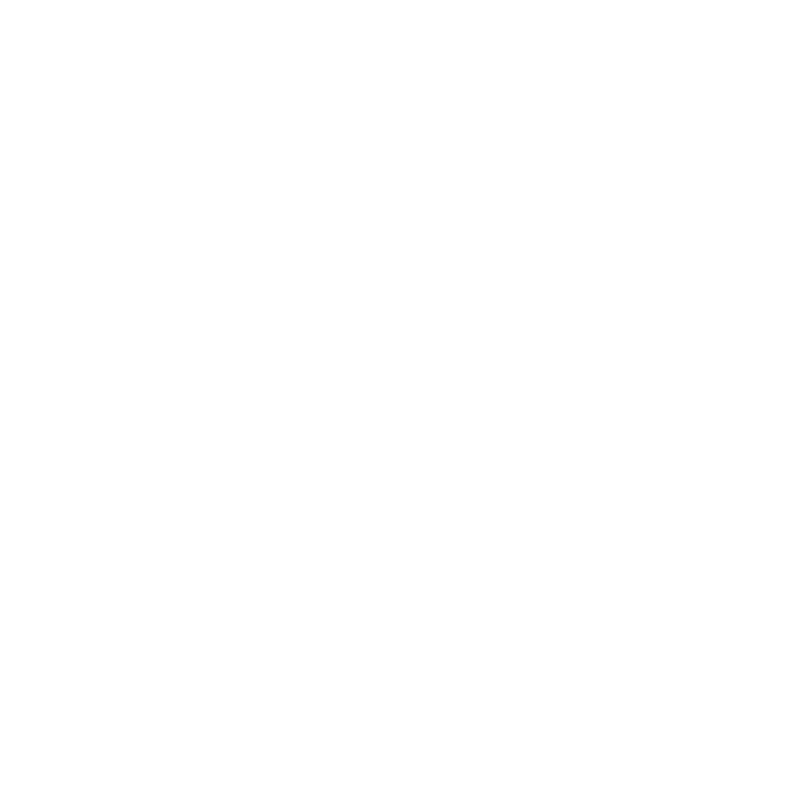

('bg:', 14239.385502736743)
('bg:', 14239.385502736743)
('bg:', 14239.385502736743)
('bg:', 14239.385502736743)
('bg:', 14239.385502736743)
('bg:', 14239.385502736743)
('bg:', 14239.385502736743)
('bg:', 14239.385502736743)


<IPython.core.display.Javascript object>


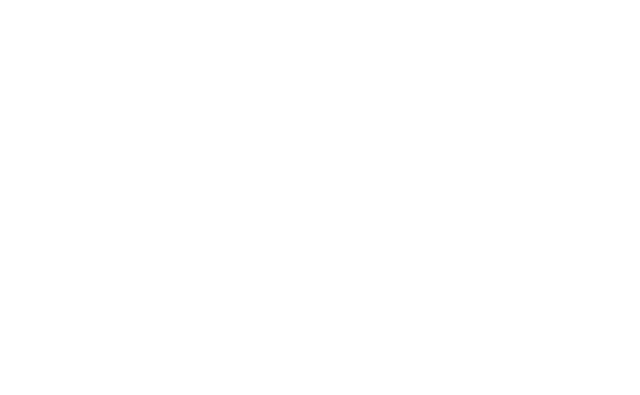

<IPython.core.display.Javascript object>


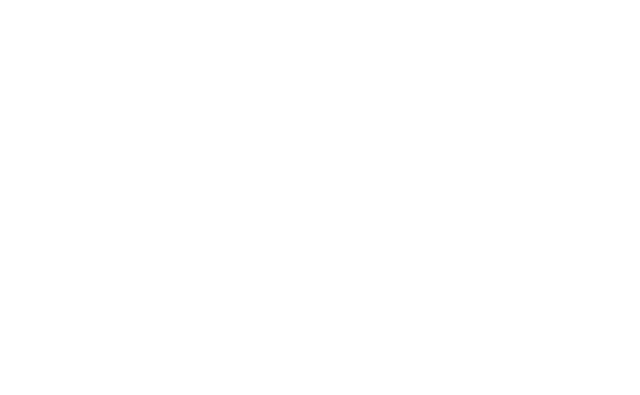

<IPython.core.display.Javascript object>


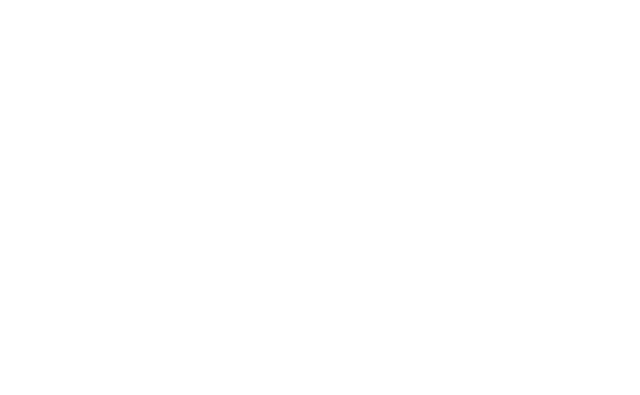

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:263: RuntimeWarning: divide by zero encountered in power


In [1118]:
#settings
ROI=6
#data_dir = "X:\\Ryan C\\Data\\DDM_Karthik\\20210715\\tif files\\Finished\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20210902\\"
#data_dir = "Y:\\Karthik_KRP\\Data\\DDM_DNA_MT\\20210902\\Philip data\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20211001\\"
#data_file = "%s_%s_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
#data_file = "%s_%s_BH-filter_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
data_file = "Trial_%s_%s%s128_FFTDIFFS_dts_ffts_ravs.p" %(video,side,ROI)
#data_file = "Trial_%s_B%s64_FFTDIFFS_dts_ffts_ravs.p" %(video, ROI)

dat = pickle.load(open(data_dir+data_file,'rb'))
ravs = dat['ravs'] 
dts  = dat['dts']
ffts = dat['ffts']
times = dts/framerate
print(dts)
print(times)

%matplotlib notebook
q_index = -1 #the last index
#backg = 2632 #change me! 
backg = np.mean(ravs[:,q_index])
pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=ravs[:,q_index],bg=backg, double=False, fps=framerate)
plt.plot(times, ravs[:,q_index],'ro') #plot the data
plt.plot(times, ddm.dTheory(times,*pars), '-k', lw=4) #see how well the initial guess performs
ax = plt.gca()
plt.text(0.8, 0.2, 'Index of q-value: %i' % q_index, horizontalalignment='center', verticalalignment='center', 
           transform=ax.transAxes, fontdict=font_plt)
plt.xlabel('Time (s)');
np.mean(ravs[:,q_index])
qq= [0.4,0.415,0.43,0.445,0.46,0.475,0.49,0.5,0.515,0.525,0.54,0.55,0.565,0.575,0.59,0.6,0.615,0.63,0.645,0.65,0.665,
         0.675,0.69,0.7,0.715,0.73,0.745,0.75,0.765,0.78,0.795,0.81,0.825,0.84,0.855,0.87,0.89,0.9,0.915,0.93,0.945,
         0.95,0.975,0.99,1.1]
pp=qq[1]

def two_rounds_fitting(data, times,pp):
    '''
    This function does two rounds of fitting. 
    First it uses SciPy's least-squares fitting:
        https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.leastsq.html
    Then, it uses the Levenberg-Marquardt method with the mpfit module. 
    '''

    pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=data, bg=backg, double=False, fps=framerate)
    #Paramters:
    # Amplitude-0, TimeConst-1, Background-2, Alpha (strtching exp), (... same for second exp..))
    minp[3]=0
    maxp[3]=2
    pars[3]=pp#CHANGE STRECTHING EXPONENT HERE
    
    maxp[2]=200000000
    minp[2]=10
    pars[2]=backg# change this to the amplitude of the q fit show in the plot above
    

    maxp[1] = 100000000000 #Decay Time Range
    minp[1] = 0.001
     
    maxp[5] = 100
    
    fix[3]= True#Fix alpha
    fix[2]= True #Fix bg
    
   
    fix[6]= False #6 is the stretching exponent for 2nd exponential
    pars[6] = 0.3
    minp[6] = 0.3 #min alpha2\n",
    maxp[6] = 1.5  #max alpha2\n",
    
    pars[5] = 0.1*pars[1] #5 is the time const for 2nd exponential
    minp[5] = 0.01
    '''
    #Leave this commented out for single exponential fits
    totamp = pars[0]+pars[4] ##0 and 4 are the amplitudes
    pars[4] = 0.4*totamp
    pars[0] = 0.4*totamp'''
    

    #The ddm.newFitLeastsq function does not check whether the parameters are within the
    #  minimum and maximum bounds. It uses SciPy's optimize.leastsq. 
    fitparams_lsq,theory_lsq = ddm.newFitLeastsq(data,times,pars,minp,maxp,lmin,lmax,fix,logfit=False)
    newPars = fitparams_lsq.copy()
    
    #We'll use the found parameters from SciPy's optimize.leastsq and feed them into the
    #  Levenberg-Marquardt function. Before we do so, we'll check that none of the found
    #  parameters are outside the min/max bounds. 
    for i,p in enumerate(fitparams_lsq):
        if p>maxp[i]:
            newPars[i] = maxp[i]*0.9
        if p<minp[i]:
            if p<0:
                newPars[i]=abs(p)
                if newPars[i]>maxp[i]:
                    newPars[i] = maxp[i]*0.9
                elif newPars[i]<minp[i]:
                    newPars[i] = minp[i]*1.1
            else:
                newPars[i] = minp[i]*1.1
                
    #Now use the Levenberg-Marquardt function. It returns the optimized paramters (fitparamsB), the 
    #  best fit (theoryB), any error codes, and the chi-squared value (the sum of squares of the error)
    fitparamsB, theoryB, errCodeB, chi2B = ddm.newFit(data,times,newPars,minp,maxp,lmin,lmax,fix,
                                                      logfit=False,quiet=True,factor=0.8)
    
    return fitparamsB, theoryB, chi2B
q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops

gg=np.zeros((11,45))

a_list=np.zeros((1,45))
for k in range(45):
    for i,q_index in enumerate([5,6,7,8,9,10,11,12,13,14,15]):
        pp=qq[k]
        fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],pp)
        gg[i,k]=chi2B
    #a_list[:,k]=sum(gg[:,k])/len(gg[:,k])
a_list=gg.mean(0)
#print(a_list)
min_ele=a_list[0]
rr=qq[0]
for i in range(1,len(a_list)):
    if a_list[i]<min_ele:
        min_ele=a_list[i]
        rr=qq[i]
print(rr)
print(min_ele)

%matplotlib notebook
plt.figure(figsize=(10,10)) #Create figure of size 10x10 (inches)

q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops
#Loop over four different q-values to do the fit
#for i,q_index in enumerate([2, 5,10,15,20,25,30,35]):
for i,q_index in enumerate([4,7,10,15,17,20,25,30]):
    fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],rr)
    #print len(theoryB)
    ax = plt.subplot(4,2,i+1) #creating 4 subplots in a 2x2 grid
    matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
    ax.semilogx(times,ravs[:,q_index],'ro',alpha=0.4)
    ax.plot(times[:len(theoryB)], theoryB, '-b',lw=3)
    ax.text(0.05,0.88,'Decay time: %.2f s' % fitparamsB[1], 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.76,'Stretching expo: %.2f, %.2f' % (fitparamsB[3], fitparamsB[6]), 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.64,'Amptlidue1: %.2f' % (fitparamsB[0]),
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel("Time (s)", fontdict=font_plt_ax)
    ax.set_title("Fit for q-index of %i. So q = %.3f 1/$\mu$m" % (q_index, q[q_index]), fontdict=font_plt_ax)
    print ("bg:", fitparamsB[2])
    plt.savefig(data_dir + "%s_%s_%s_ISFs.png" %(video,side,ROI))




# So, you have fixed the background AND changed the stretching exponent range, but your fits still seem kind of bad! You can continue onto the next steps to check out some of the other paramters. Your issue might be there!
fitparams = np.zeros((ravs.shape[1],7))
theory = np.zeros((ravs.shape[1],len(times[:end_time])))
tau = np.zeros_like(ravs[0,:]) #decay time
amp = np.zeros_like(tau) #amplitude
bg = np.zeros_like(tau) #background
alph = np.zeros_like(tau) #alpha (stretching exponent)
amp2 = np.zeros_like(tau) #amplitude
tau2 = np.zeros_like(tau) #background
alph2 = np.zeros_like(tau) #alpha (stretching exponent)
chi2 = np.zeros_like(tau)
for i in range(1,len(tau)):
    fitparams[i], theory[i], chi2[i] = two_rounds_fitting(ravs[:end_time,i], times[:end_time],rr)
    amp[i] = fitparams[i][0]
    bg[i] = fitparams[i][2]
    tau[i] = fitparams[i][1]
    alph[i] = fitparams[i][3]
    amp2[i] = fitparams[i][4]
    tau2[i] = fitparams[i][5]
    alph2[i] = fitparams[i][6]
#Plot the amplitude versus the wave vector

fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], amp[2:-1], 'ro')
ax.loglog(q[3:-1], amp2[2:-1], 'bd')
w = amp[2:-1].argmax() #argmax returns the index of the array that has the max value
q_for_max_a = q[2:-2][w]
ax.loglog(q[3:-1], bg[2:-1], 'bo') #Plot the background versus the wave vector
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("Amplitude (red); amp2 (red); bg (grn)", fontdict=font_plt_ax)

ax.text(0.2,0.7,'Max A at 1/q = %.3f' % (1.0/q_for_max_a), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);
ax.text(0.2,0.8,'Mean Background = %.3f' % (bg[4:14].mean()), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);




#Plot the str exponent versus the wave vector
fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], alph[2:-1], 'ro')
ax.loglog(q[3:-1], alph2[2:-1], 'bo')
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("stretching exponent", fontdict=font_plt_ax)









#Plot the decay time versus the wave vector
fig = plt.figure(figsize=(8,8/1.618)); ax = fig.gca(); 
#ax.loglog(q[3:-1], tau[2:-1], 'ro')
qs = q[2:-2]
qend=-1
q0=q[2:qend]
tau0 = ddm.newt(tau[2:qend],alph[2:qend])
#ax.loglog(qs, tau[2:-1], 'ro')
ax.loglog(q[3:qend], ddm.newt(tau[2:qend],alph[2:qend]),'bo') # this is for the first exponential
#ax.loglog(q[2:-31],tau[2:-30],'ro')
#ax.loglog(q[3:-30], ddm.newt(tau2[2:-30],alph2[2:-30]),'ro') # this is for the second
#ax.loglog(q[3:-30], tau2[2:-30],'go')


#aa=[0,1,2,3,4,5,6]
#bb=[10,11,12,13,14,15,16,17,18,19,20]
#Setting range of q values for fitting the data 
#for i in range(aa)
   # for j in range(bb)
minq=4
maxq=14

qmin=q[minq]
qmax=q[maxq]
new_taus=ddm.newt(tau[2:qend],alph[2:qend])

b = np.where((q>=qmin)&(q<=qmax))
ax.plot(q[b[0]+3],new_taus[b[0]],'r+',label='good q range')
#ax.plot(q[b], new_taus[b], 'r+')

ax.set_xlim(0.9,50)
ax.set_ylim(0.0001,10000)

## q^-2, does it look diffusive ?
diffusion_coeff = .1 # CHANGE DIFFUSION COEFFICIENT
power = 2.0 
ax.plot(q[1:-1], (1./diffusion_coeff) * 1./(q[1:-1]**power), '--c', label="Diffusive")


#Fitting data to a line
a = np.polyfit(np.log(q[b[0]+3]),np.log(new_taus[b[0]]), 1)

slope=a[0]
coef1 = np.exp(a[1])
alpha = 2./(-1*slope)
Dif = (1.0/coef1)**alpha
tau_fit = coef1*(q**(-2.0/alpha))
ax.plot(q, tau_fit, '-k', label = "best fit line")
plt.legend()

## does it fit some other power?
#adiffusion_coeff = .022
#power2 = 3
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')

#adiffusion_coeff = 0.018
#power2 = 1
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')


ax.text(0.55,0.15,'D = %.4f um2/s' % diffusion_coeff,
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
ax.text(3,380,"slope: %.4f" %slope)
ax.set_xlabel("q (um^-1)", fontdict=font_plt_ax)
ax.set_ylabel("tau (s)", fontdict=font_plt_ax)
ax.text(3,660,"alpha: %.4f" %alpha)
plt.savefig(data_dir+ "%s_%s_%s_Tau_vs_q.png" %(video,side,ROI))

#################################################################################################
allResults['fitparams_'+str(video)+'_'+str(ROI)] = fitparams
allResults['theory_'+str(video)+'_'+str(ROI)] = theory
allResults['chi2_'+str(video)+'_'+str(ROI)] = chi2
allResults['ravs_'+str(video)+'_'+str(ROI)] = ravs
allResults['dts'] = dts
allResults.keys()
ravs1=ravs[:,4]
ravs2=ravs[:,7]
ravs3=ravs[:,10]
ravs4=ravs[:,15]
ravs5=ravs[:,17]
ravs6=ravs[:,20]
ravs7=ravs[:,25]
ravs8=ravs[:,30]
a=[0]*(len(times)-len(q))
b=[0]*(len(times)-len(tau))
qs=np.append(q,a)
taus=np.append(tau,b)

Final_Data=np.transpose(np.vstack([times,ravs1,ravs2,ravs3,ravs4,ravs5,ravs6,ravs7,ravs8,qs,taus]))
Final_Data_1=(np.vstack([taus]))
np.savetxt(data_dir+ "onlyT_%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data_1, delimiter=',')
np.savetxt(data_dir+ "%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data, delimiter=',')
#np.savetxt('C:\\Users\\kpeddireddy\\Desktop\\test\\1_1_full_Final_Data.csv', Final_Data, delimiter=',')




import pandas as pd
df=pd.DataFrame(Final_Data_1)
df.to_csv(data_dir+ "%s_Tau_vs_q.csv" %(speed), mode='a', index=False, header=False)

[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192  193  194  196  197
  198 

<IPython.core.display.Javascript object>


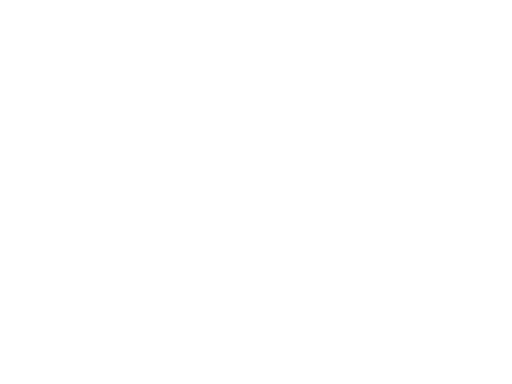

0.7
658687261.9983886


<IPython.core.display.Javascript object>


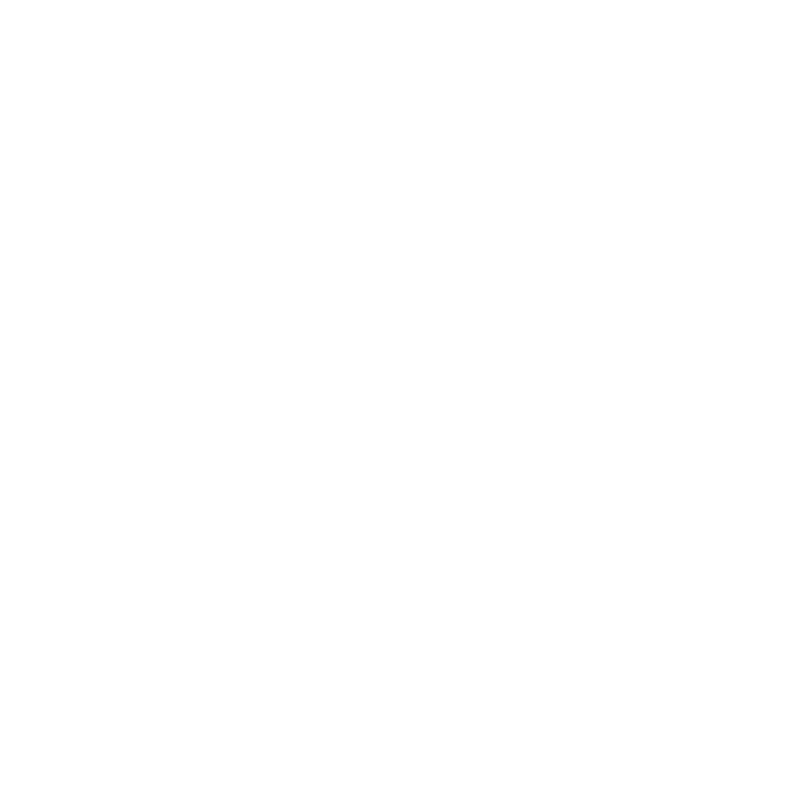

('bg:', 14181.692858085144)
('bg:', 14181.692858085144)
('bg:', 14181.692858085144)
('bg:', 14181.692858085144)
('bg:', 14181.692858085144)
('bg:', 14181.692858085144)
('bg:', 14181.692858085144)
('bg:', 14181.692858085144)


<IPython.core.display.Javascript object>


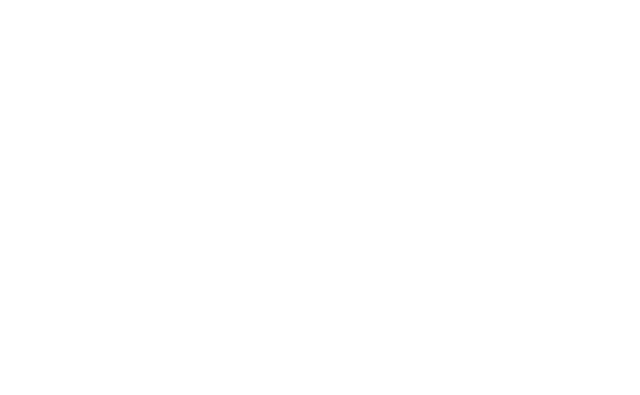

<IPython.core.display.Javascript object>


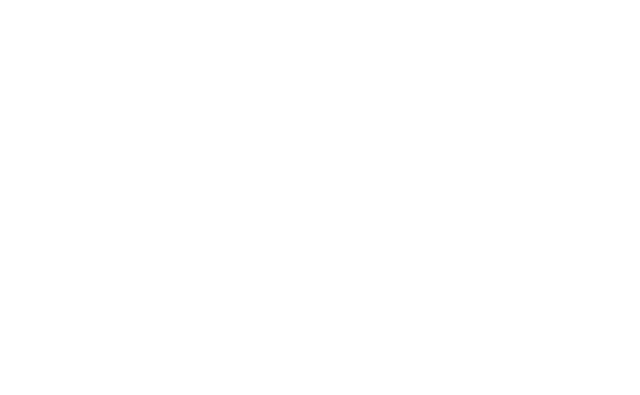

<IPython.core.display.Javascript object>


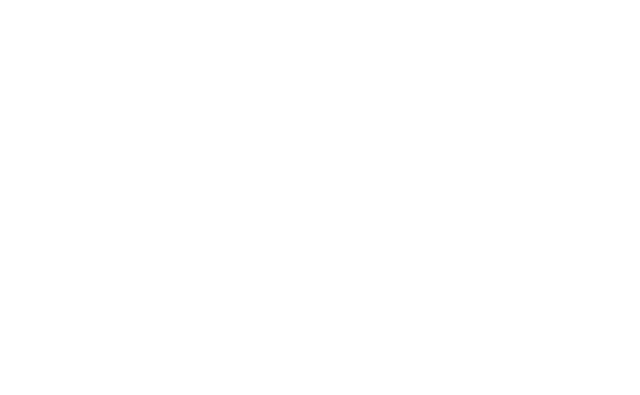

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:263: RuntimeWarning: divide by zero encountered in power


In [1119]:
#settings
ROI=7
#data_dir = "X:\\Ryan C\\Data\\DDM_Karthik\\20210715\\tif files\\Finished\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20210902\\"
#data_dir = "Y:\\Karthik_KRP\\Data\\DDM_DNA_MT\\20210902\\Philip data\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20211001\\"
#data_file = "%s_%s_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
#data_file = "%s_%s_BH-filter_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
data_file = "Trial_%s_%s%s128_FFTDIFFS_dts_ffts_ravs.p" %(video,side,ROI)
#data_file = "Trial_%s_B%s64_FFTDIFFS_dts_ffts_ravs.p" %(video, ROI)

dat = pickle.load(open(data_dir+data_file,'rb'))
ravs = dat['ravs'] 
dts  = dat['dts']
ffts = dat['ffts']
times = dts/framerate
print(dts)
print(times)

%matplotlib notebook
q_index = -1 #the last index
#backg = 2632 #change me! 
backg = np.mean(ravs[:,q_index])
pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=ravs[:,q_index],bg=backg, double=False, fps=framerate)
plt.plot(times, ravs[:,q_index],'ro') #plot the data
plt.plot(times, ddm.dTheory(times,*pars), '-k', lw=4) #see how well the initial guess performs
ax = plt.gca()
plt.text(0.8, 0.2, 'Index of q-value: %i' % q_index, horizontalalignment='center', verticalalignment='center', 
           transform=ax.transAxes, fontdict=font_plt)
plt.xlabel('Time (s)');
np.mean(ravs[:,q_index])
qq= [0.4,0.415,0.43,0.445,0.46,0.475,0.49,0.5,0.515,0.525,0.54,0.55,0.565,0.575,0.59,0.6,0.615,0.63,0.645,0.65,0.665,
         0.675,0.69,0.7,0.715,0.73,0.745,0.75,0.765,0.78,0.795,0.81,0.825,0.84,0.855,0.87,0.89,0.9,0.915,0.93,0.945,
         0.95,0.975,0.99,1.1]
pp=qq[1]

def two_rounds_fitting(data, times,pp):
    '''
    This function does two rounds of fitting. 
    First it uses SciPy's least-squares fitting:
        https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.leastsq.html
    Then, it uses the Levenberg-Marquardt method with the mpfit module. 
    '''

    pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=data, bg=backg, double=False, fps=framerate)
    #Paramters:
    # Amplitude-0, TimeConst-1, Background-2, Alpha (strtching exp), (... same for second exp..))
    minp[3]=0
    maxp[3]=2
    pars[3]=pp#CHANGE STRECTHING EXPONENT HERE
    
    maxp[2]=200000000
    minp[2]=10
    pars[2]=backg# change this to the amplitude of the q fit show in the plot above
    

    maxp[1] = 100000000000 #Decay Time Range
    minp[1] = 0.001
     
    maxp[5] = 100
    
    fix[3]= True#Fix alpha
    fix[2]= True #Fix bg
    
   
    fix[6]= False #6 is the stretching exponent for 2nd exponential
    pars[6] = 0.3
    minp[6] = 0.3 #min alpha2\n",
    maxp[6] = 1.5  #max alpha2\n",
    
    pars[5] = 0.1*pars[1] #5 is the time const for 2nd exponential
    minp[5] = 0.01
    '''
    #Leave this commented out for single exponential fits
    totamp = pars[0]+pars[4] ##0 and 4 are the amplitudes
    pars[4] = 0.4*totamp
    pars[0] = 0.4*totamp'''
    

    #The ddm.newFitLeastsq function does not check whether the parameters are within the
    #  minimum and maximum bounds. It uses SciPy's optimize.leastsq. 
    fitparams_lsq,theory_lsq = ddm.newFitLeastsq(data,times,pars,minp,maxp,lmin,lmax,fix,logfit=False)
    newPars = fitparams_lsq.copy()
    
    #We'll use the found parameters from SciPy's optimize.leastsq and feed them into the
    #  Levenberg-Marquardt function. Before we do so, we'll check that none of the found
    #  parameters are outside the min/max bounds. 
    for i,p in enumerate(fitparams_lsq):
        if p>maxp[i]:
            newPars[i] = maxp[i]*0.9
        if p<minp[i]:
            if p<0:
                newPars[i]=abs(p)
                if newPars[i]>maxp[i]:
                    newPars[i] = maxp[i]*0.9
                elif newPars[i]<minp[i]:
                    newPars[i] = minp[i]*1.1
            else:
                newPars[i] = minp[i]*1.1
                
    #Now use the Levenberg-Marquardt function. It returns the optimized paramters (fitparamsB), the 
    #  best fit (theoryB), any error codes, and the chi-squared value (the sum of squares of the error)
    fitparamsB, theoryB, errCodeB, chi2B = ddm.newFit(data,times,newPars,minp,maxp,lmin,lmax,fix,
                                                      logfit=False,quiet=True,factor=0.8)
    
    return fitparamsB, theoryB, chi2B
q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops

gg=np.zeros((11,45))

a_list=np.zeros((1,45))
for k in range(45):
    for i,q_index in enumerate([5,6,7,8,9,10,11,12,13,14,15]):
        pp=qq[k]
        fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],pp)
        gg[i,k]=chi2B
    #a_list[:,k]=sum(gg[:,k])/len(gg[:,k])
a_list=gg.mean(0)
#print(a_list)
min_ele=a_list[0]
rr=qq[0]
for i in range(1,len(a_list)):
    if a_list[i]<min_ele:
        min_ele=a_list[i]
        rr=qq[i]
print(rr)
print(min_ele)

%matplotlib notebook
plt.figure(figsize=(10,10)) #Create figure of size 10x10 (inches)

q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops
#Loop over four different q-values to do the fit
#for i,q_index in enumerate([2, 5,10,15,20,25,30,35]):
for i,q_index in enumerate([4,7,10,15,17,20,25,30]):
    fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],rr)
    #print len(theoryB)
    ax = plt.subplot(4,2,i+1) #creating 4 subplots in a 2x2 grid
    matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
    ax.semilogx(times,ravs[:,q_index],'ro',alpha=0.4)
    ax.plot(times[:len(theoryB)], theoryB, '-b',lw=3)
    ax.text(0.05,0.88,'Decay time: %.2f s' % fitparamsB[1], 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.76,'Stretching expo: %.2f, %.2f' % (fitparamsB[3], fitparamsB[6]), 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.64,'Amptlidue1: %.2f' % (fitparamsB[0]),
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel("Time (s)", fontdict=font_plt_ax)
    ax.set_title("Fit for q-index of %i. So q = %.3f 1/$\mu$m" % (q_index, q[q_index]), fontdict=font_plt_ax)
    print ("bg:", fitparamsB[2])
    plt.savefig(data_dir + "%s_%s_%s_ISFs.png" %(video,side,ROI))




# So, you have fixed the background AND changed the stretching exponent range, but your fits still seem kind of bad! You can continue onto the next steps to check out some of the other paramters. Your issue might be there!
fitparams = np.zeros((ravs.shape[1],7))
theory = np.zeros((ravs.shape[1],len(times[:end_time])))
tau = np.zeros_like(ravs[0,:]) #decay time
amp = np.zeros_like(tau) #amplitude
bg = np.zeros_like(tau) #background
alph = np.zeros_like(tau) #alpha (stretching exponent)
amp2 = np.zeros_like(tau) #amplitude
tau2 = np.zeros_like(tau) #background
alph2 = np.zeros_like(tau) #alpha (stretching exponent)
chi2 = np.zeros_like(tau)
for i in range(1,len(tau)):
    fitparams[i], theory[i], chi2[i] = two_rounds_fitting(ravs[:end_time,i], times[:end_time],rr)
    amp[i] = fitparams[i][0]
    bg[i] = fitparams[i][2]
    tau[i] = fitparams[i][1]
    alph[i] = fitparams[i][3]
    amp2[i] = fitparams[i][4]
    tau2[i] = fitparams[i][5]
    alph2[i] = fitparams[i][6]
#Plot the amplitude versus the wave vector

fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], amp[2:-1], 'ro')
ax.loglog(q[3:-1], amp2[2:-1], 'bd')
w = amp[2:-1].argmax() #argmax returns the index of the array that has the max value
q_for_max_a = q[2:-2][w]
ax.loglog(q[3:-1], bg[2:-1], 'bo') #Plot the background versus the wave vector
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("Amplitude (red); amp2 (red); bg (grn)", fontdict=font_plt_ax)

ax.text(0.2,0.7,'Max A at 1/q = %.3f' % (1.0/q_for_max_a), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);
ax.text(0.2,0.8,'Mean Background = %.3f' % (bg[4:14].mean()), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);




#Plot the str exponent versus the wave vector
fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], alph[2:-1], 'ro')
ax.loglog(q[3:-1], alph2[2:-1], 'bo')
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("stretching exponent", fontdict=font_plt_ax)









#Plot the decay time versus the wave vector
fig = plt.figure(figsize=(8,8/1.618)); ax = fig.gca(); 
#ax.loglog(q[3:-1], tau[2:-1], 'ro')
qs = q[2:-2]
qend=-1
q0=q[2:qend]
tau0 = ddm.newt(tau[2:qend],alph[2:qend])
#ax.loglog(qs, tau[2:-1], 'ro')
ax.loglog(q[3:qend], ddm.newt(tau[2:qend],alph[2:qend]),'bo') # this is for the first exponential
#ax.loglog(q[2:-31],tau[2:-30],'ro')
#ax.loglog(q[3:-30], ddm.newt(tau2[2:-30],alph2[2:-30]),'ro') # this is for the second
#ax.loglog(q[3:-30], tau2[2:-30],'go')


#aa=[0,1,2,3,4,5,6]
#bb=[10,11,12,13,14,15,16,17,18,19,20]
#Setting range of q values for fitting the data 
#for i in range(aa)
   # for j in range(bb)
minq=4
maxq=14

qmin=q[minq]
qmax=q[maxq]
new_taus=ddm.newt(tau[2:qend],alph[2:qend])

b = np.where((q>=qmin)&(q<=qmax))
ax.plot(q[b[0]+3],new_taus[b[0]],'r+',label='good q range')
#ax.plot(q[b], new_taus[b], 'r+')

ax.set_xlim(0.9,50)
ax.set_ylim(0.0001,10000)

## q^-2, does it look diffusive ?
diffusion_coeff = .1 # CHANGE DIFFUSION COEFFICIENT
power = 2.0 
ax.plot(q[1:-1], (1./diffusion_coeff) * 1./(q[1:-1]**power), '--c', label="Diffusive")


#Fitting data to a line
a = np.polyfit(np.log(q[b[0]+3]),np.log(new_taus[b[0]]), 1)

slope=a[0]
coef1 = np.exp(a[1])
alpha = 2./(-1*slope)
Dif = (1.0/coef1)**alpha
tau_fit = coef1*(q**(-2.0/alpha))
ax.plot(q, tau_fit, '-k', label = "best fit line")
plt.legend()

## does it fit some other power?
#adiffusion_coeff = .022
#power2 = 3
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')

#adiffusion_coeff = 0.018
#power2 = 1
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')


ax.text(0.55,0.15,'D = %.4f um2/s' % diffusion_coeff,
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
ax.text(3,380,"slope: %.4f" %slope)
ax.set_xlabel("q (um^-1)", fontdict=font_plt_ax)
ax.set_ylabel("tau (s)", fontdict=font_plt_ax)
ax.text(3,660,"alpha: %.4f" %alpha)
plt.savefig(data_dir+ "%s_%s_%s_Tau_vs_q.png" %(video,side,ROI))

#################################################################################################
allResults['fitparams_'+str(video)+'_'+str(ROI)] = fitparams
allResults['theory_'+str(video)+'_'+str(ROI)] = theory
allResults['chi2_'+str(video)+'_'+str(ROI)] = chi2
allResults['ravs_'+str(video)+'_'+str(ROI)] = ravs
allResults['dts'] = dts
allResults.keys()
ravs1=ravs[:,4]
ravs2=ravs[:,7]
ravs3=ravs[:,10]
ravs4=ravs[:,15]
ravs5=ravs[:,17]
ravs6=ravs[:,20]
ravs7=ravs[:,25]
ravs8=ravs[:,30]
a=[0]*(len(times)-len(q))
b=[0]*(len(times)-len(tau))
qs=np.append(q,a)
taus=np.append(tau,b)

Final_Data=np.transpose(np.vstack([times,ravs1,ravs2,ravs3,ravs4,ravs5,ravs6,ravs7,ravs8,qs,taus]))
Final_Data_1=(np.vstack([taus]))
np.savetxt(data_dir+ "onlyT_%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data_1, delimiter=',')
np.savetxt(data_dir+ "%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data, delimiter=',')
#np.savetxt('C:\\Users\\kpeddireddy\\Desktop\\test\\1_1_full_Final_Data.csv', Final_Data, delimiter=',')




import pandas as pd
df=pd.DataFrame(Final_Data_1)
df.to_csv(data_dir+ "%s_Tau_vs_q.csv" %(speed), mode='a', index=False, header=False)

[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192  193  194  196  197
  198 

<IPython.core.display.Javascript object>


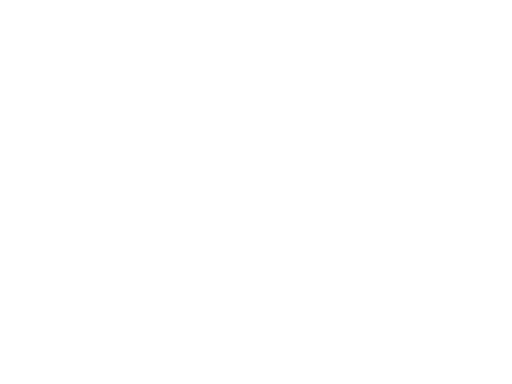

0.715
636217107.2385367


<IPython.core.display.Javascript object>


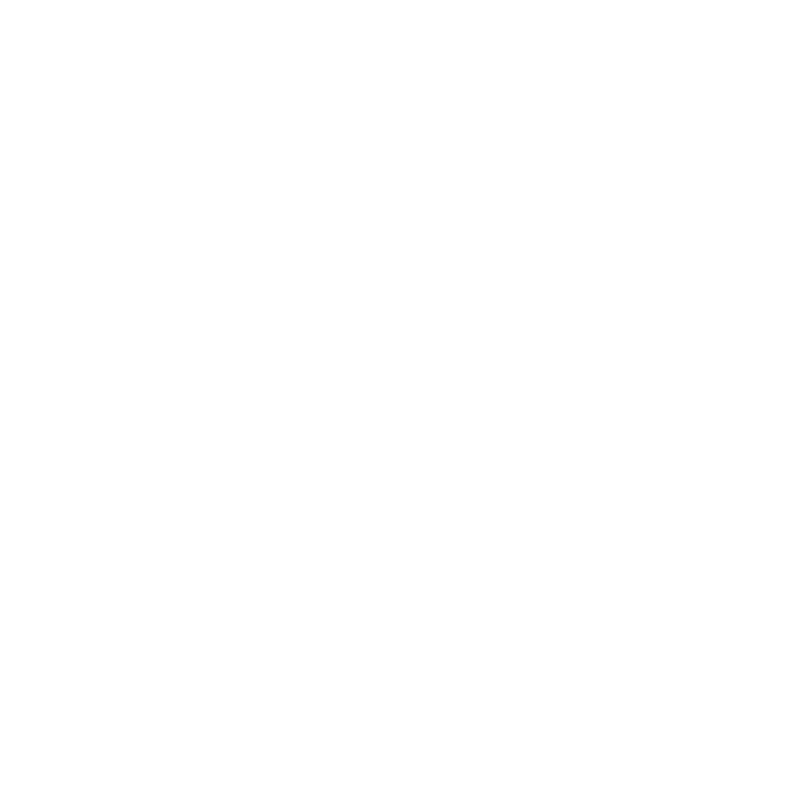

('bg:', 14168.157997972787)
('bg:', 14168.157997972787)
('bg:', 14168.157997972787)
('bg:', 14168.157997972787)
('bg:', 14168.157997972787)
('bg:', 14168.157997972787)
('bg:', 14168.157997972787)
('bg:', 14168.157997972787)


<IPython.core.display.Javascript object>


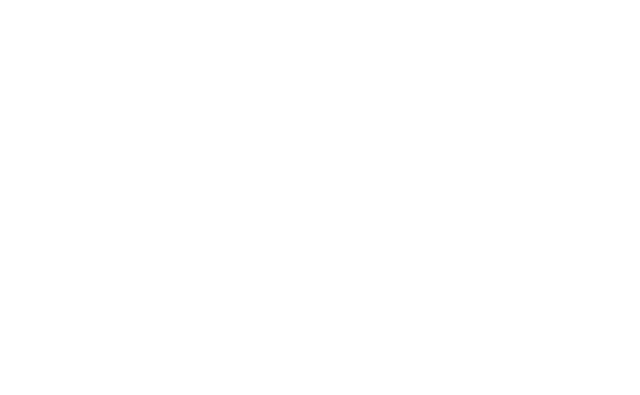

<IPython.core.display.Javascript object>


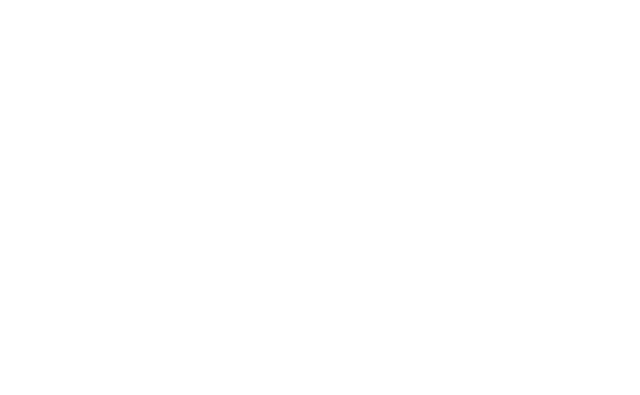

<IPython.core.display.Javascript object>


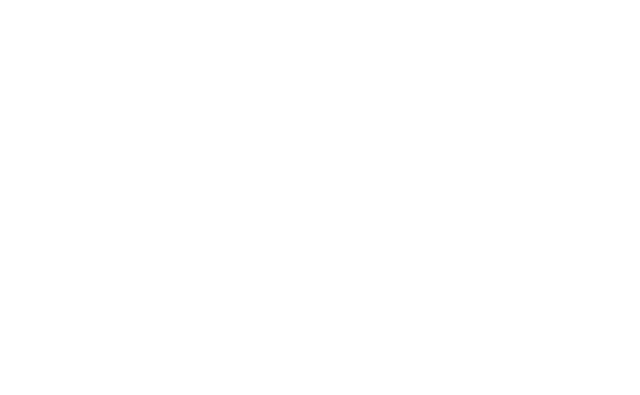

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:263: RuntimeWarning: divide by zero encountered in power


In [1120]:
#settings
ROI=8
#data_dir = "X:\\Ryan C\\Data\\DDM_Karthik\\20210715\\tif files\\Finished\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20210902\\"
#data_dir = "Y:\\Karthik_KRP\\Data\\DDM_DNA_MT\\20210902\\Philip data\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20211001\\"
#data_file = "%s_%s_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
#data_file = "%s_%s_BH-filter_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
data_file = "Trial_%s_%s%s128_FFTDIFFS_dts_ffts_ravs.p" %(video,side,ROI)
#data_file = "Trial_%s_B%s64_FFTDIFFS_dts_ffts_ravs.p" %(video, ROI)

dat = pickle.load(open(data_dir+data_file,'rb'))
ravs = dat['ravs'] 
dts  = dat['dts']
ffts = dat['ffts']
times = dts/framerate
print(dts)
print(times)

%matplotlib notebook
q_index = -1 #the last index
#backg = 2632 #change me! 
backg = np.mean(ravs[:,q_index])
pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=ravs[:,q_index],bg=backg, double=False, fps=framerate)
plt.plot(times, ravs[:,q_index],'ro') #plot the data
plt.plot(times, ddm.dTheory(times,*pars), '-k', lw=4) #see how well the initial guess performs
ax = plt.gca()
plt.text(0.8, 0.2, 'Index of q-value: %i' % q_index, horizontalalignment='center', verticalalignment='center', 
           transform=ax.transAxes, fontdict=font_plt)
plt.xlabel('Time (s)');
np.mean(ravs[:,q_index])
qq= [0.4,0.415,0.43,0.445,0.46,0.475,0.49,0.5,0.515,0.525,0.54,0.55,0.565,0.575,0.59,0.6,0.615,0.63,0.645,0.65,0.665,
         0.675,0.69,0.7,0.715,0.73,0.745,0.75,0.765,0.78,0.795,0.81,0.825,0.84,0.855,0.87,0.89,0.9,0.915,0.93,0.945,
         0.95,0.975,0.99,1.1]
pp=qq[1]

def two_rounds_fitting(data, times,pp):
    '''
    This function does two rounds of fitting. 
    First it uses SciPy's least-squares fitting:
        https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.leastsq.html
    Then, it uses the Levenberg-Marquardt method with the mpfit module. 
    '''

    pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=data, bg=backg, double=False, fps=framerate)
    #Paramters:
    # Amplitude-0, TimeConst-1, Background-2, Alpha (strtching exp), (... same for second exp..))
    minp[3]=0
    maxp[3]=2
    pars[3]=pp#CHANGE STRECTHING EXPONENT HERE
    
    maxp[2]=200000000
    minp[2]=10
    pars[2]=backg# change this to the amplitude of the q fit show in the plot above
    

    maxp[1] = 100000000000 #Decay Time Range
    minp[1] = 0.001
     
    maxp[5] = 100
    
    fix[3]= True#Fix alpha
    fix[2]= True #Fix bg
    
   
    fix[6]= False #6 is the stretching exponent for 2nd exponential
    pars[6] = 0.3
    minp[6] = 0.3 #min alpha2\n",
    maxp[6] = 1.5  #max alpha2\n",
    
    pars[5] = 0.1*pars[1] #5 is the time const for 2nd exponential
    minp[5] = 0.01
    '''
    #Leave this commented out for single exponential fits
    totamp = pars[0]+pars[4] ##0 and 4 are the amplitudes
    pars[4] = 0.4*totamp
    pars[0] = 0.4*totamp'''
    

    #The ddm.newFitLeastsq function does not check whether the parameters are within the
    #  minimum and maximum bounds. It uses SciPy's optimize.leastsq. 
    fitparams_lsq,theory_lsq = ddm.newFitLeastsq(data,times,pars,minp,maxp,lmin,lmax,fix,logfit=False)
    newPars = fitparams_lsq.copy()
    
    #We'll use the found parameters from SciPy's optimize.leastsq and feed them into the
    #  Levenberg-Marquardt function. Before we do so, we'll check that none of the found
    #  parameters are outside the min/max bounds. 
    for i,p in enumerate(fitparams_lsq):
        if p>maxp[i]:
            newPars[i] = maxp[i]*0.9
        if p<minp[i]:
            if p<0:
                newPars[i]=abs(p)
                if newPars[i]>maxp[i]:
                    newPars[i] = maxp[i]*0.9
                elif newPars[i]<minp[i]:
                    newPars[i] = minp[i]*1.1
            else:
                newPars[i] = minp[i]*1.1
                
    #Now use the Levenberg-Marquardt function. It returns the optimized paramters (fitparamsB), the 
    #  best fit (theoryB), any error codes, and the chi-squared value (the sum of squares of the error)
    fitparamsB, theoryB, errCodeB, chi2B = ddm.newFit(data,times,newPars,minp,maxp,lmin,lmax,fix,
                                                      logfit=False,quiet=True,factor=0.8)
    
    return fitparamsB, theoryB, chi2B
q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops

gg=np.zeros((11,45))

a_list=np.zeros((1,45))
for k in range(45):
    for i,q_index in enumerate([5,6,7,8,9,10,11,12,13,14,15]):
        pp=qq[k]
        fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],pp)
        gg[i,k]=chi2B
    #a_list[:,k]=sum(gg[:,k])/len(gg[:,k])
a_list=gg.mean(0)
#print(a_list)
min_ele=a_list[0]
rr=qq[0]
for i in range(1,len(a_list)):
    if a_list[i]<min_ele:
        min_ele=a_list[i]
        rr=qq[i]
print(rr)
print(min_ele)

%matplotlib notebook
plt.figure(figsize=(10,10)) #Create figure of size 10x10 (inches)

q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops
#Loop over four different q-values to do the fit
#for i,q_index in enumerate([2, 5,10,15,20,25,30,35]):
for i,q_index in enumerate([4,7,10,15,17,20,25,30]):
    fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],rr)
    #print len(theoryB)
    ax = plt.subplot(4,2,i+1) #creating 4 subplots in a 2x2 grid
    matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
    ax.semilogx(times,ravs[:,q_index],'ro',alpha=0.4)
    ax.plot(times[:len(theoryB)], theoryB, '-b',lw=3)
    ax.text(0.05,0.88,'Decay time: %.2f s' % fitparamsB[1], 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.76,'Stretching expo: %.2f, %.2f' % (fitparamsB[3], fitparamsB[6]), 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.64,'Amptlidue1: %.2f' % (fitparamsB[0]),
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel("Time (s)", fontdict=font_plt_ax)
    ax.set_title("Fit for q-index of %i. So q = %.3f 1/$\mu$m" % (q_index, q[q_index]), fontdict=font_plt_ax)
    print ("bg:", fitparamsB[2])
    plt.savefig(data_dir + "%s_%s_%s_ISFs.png" %(video,side,ROI))




# So, you have fixed the background AND changed the stretching exponent range, but your fits still seem kind of bad! You can continue onto the next steps to check out some of the other paramters. Your issue might be there!
fitparams = np.zeros((ravs.shape[1],7))
theory = np.zeros((ravs.shape[1],len(times[:end_time])))
tau = np.zeros_like(ravs[0,:]) #decay time
amp = np.zeros_like(tau) #amplitude
bg = np.zeros_like(tau) #background
alph = np.zeros_like(tau) #alpha (stretching exponent)
amp2 = np.zeros_like(tau) #amplitude
tau2 = np.zeros_like(tau) #background
alph2 = np.zeros_like(tau) #alpha (stretching exponent)
chi2 = np.zeros_like(tau)
for i in range(1,len(tau)):
    fitparams[i], theory[i], chi2[i] = two_rounds_fitting(ravs[:end_time,i], times[:end_time],rr)
    amp[i] = fitparams[i][0]
    bg[i] = fitparams[i][2]
    tau[i] = fitparams[i][1]
    alph[i] = fitparams[i][3]
    amp2[i] = fitparams[i][4]
    tau2[i] = fitparams[i][5]
    alph2[i] = fitparams[i][6]
#Plot the amplitude versus the wave vector

fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], amp[2:-1], 'ro')
ax.loglog(q[3:-1], amp2[2:-1], 'bd')
w = amp[2:-1].argmax() #argmax returns the index of the array that has the max value
q_for_max_a = q[2:-2][w]
ax.loglog(q[3:-1], bg[2:-1], 'bo') #Plot the background versus the wave vector
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("Amplitude (red); amp2 (red); bg (grn)", fontdict=font_plt_ax)

ax.text(0.2,0.7,'Max A at 1/q = %.3f' % (1.0/q_for_max_a), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);
ax.text(0.2,0.8,'Mean Background = %.3f' % (bg[4:14].mean()), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);




#Plot the str exponent versus the wave vector
fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], alph[2:-1], 'ro')
ax.loglog(q[3:-1], alph2[2:-1], 'bo')
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("stretching exponent", fontdict=font_plt_ax)









#Plot the decay time versus the wave vector
fig = plt.figure(figsize=(8,8/1.618)); ax = fig.gca(); 
#ax.loglog(q[3:-1], tau[2:-1], 'ro')
qs = q[2:-2]
qend=-1
q0=q[2:qend]
tau0 = ddm.newt(tau[2:qend],alph[2:qend])
#ax.loglog(qs, tau[2:-1], 'ro')
ax.loglog(q[3:qend], ddm.newt(tau[2:qend],alph[2:qend]),'bo') # this is for the first exponential
#ax.loglog(q[2:-31],tau[2:-30],'ro')
#ax.loglog(q[3:-30], ddm.newt(tau2[2:-30],alph2[2:-30]),'ro') # this is for the second
#ax.loglog(q[3:-30], tau2[2:-30],'go')


#aa=[0,1,2,3,4,5,6]
#bb=[10,11,12,13,14,15,16,17,18,19,20]
#Setting range of q values for fitting the data 
#for i in range(aa)
   # for j in range(bb)
minq=4
maxq=14

qmin=q[minq]
qmax=q[maxq]
new_taus=ddm.newt(tau[2:qend],alph[2:qend])

b = np.where((q>=qmin)&(q<=qmax))
ax.plot(q[b[0]+3],new_taus[b[0]],'r+',label='good q range')
#ax.plot(q[b], new_taus[b], 'r+')

ax.set_xlim(0.9,50)
ax.set_ylim(0.0001,10000)

## q^-2, does it look diffusive ?
diffusion_coeff = .1 # CHANGE DIFFUSION COEFFICIENT
power = 2.0 
ax.plot(q[1:-1], (1./diffusion_coeff) * 1./(q[1:-1]**power), '--c', label="Diffusive")


#Fitting data to a line
a = np.polyfit(np.log(q[b[0]+3]),np.log(new_taus[b[0]]), 1)

slope=a[0]
coef1 = np.exp(a[1])
alpha = 2./(-1*slope)
Dif = (1.0/coef1)**alpha
tau_fit = coef1*(q**(-2.0/alpha))
ax.plot(q, tau_fit, '-k', label = "best fit line")
plt.legend()

## does it fit some other power?
#adiffusion_coeff = .022
#power2 = 3
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')

#adiffusion_coeff = 0.018
#power2 = 1
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')


ax.text(0.55,0.15,'D = %.4f um2/s' % diffusion_coeff,
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
ax.text(3,380,"slope: %.4f" %slope)
ax.set_xlabel("q (um^-1)", fontdict=font_plt_ax)
ax.set_ylabel("tau (s)", fontdict=font_plt_ax)
ax.text(3,660,"alpha: %.4f" %alpha)
plt.savefig(data_dir+ "%s_%s_%s_Tau_vs_q.png" %(video,side,ROI))

#################################################################################################
allResults['fitparams_'+str(video)+'_'+str(ROI)] = fitparams
allResults['theory_'+str(video)+'_'+str(ROI)] = theory
allResults['chi2_'+str(video)+'_'+str(ROI)] = chi2
allResults['ravs_'+str(video)+'_'+str(ROI)] = ravs
allResults['dts'] = dts
allResults.keys()
ravs1=ravs[:,4]
ravs2=ravs[:,7]
ravs3=ravs[:,10]
ravs4=ravs[:,15]
ravs5=ravs[:,17]
ravs6=ravs[:,20]
ravs7=ravs[:,25]
ravs8=ravs[:,30]
a=[0]*(len(times)-len(q))
b=[0]*(len(times)-len(tau))
qs=np.append(q,a)
taus=np.append(tau,b)

Final_Data=np.transpose(np.vstack([times,ravs1,ravs2,ravs3,ravs4,ravs5,ravs6,ravs7,ravs8,qs,taus]))
Final_Data_1=(np.vstack([taus]))
np.savetxt(data_dir+ "onlyT_%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data_1, delimiter=',')
np.savetxt(data_dir+ "%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data, delimiter=',')
#np.savetxt('C:\\Users\\kpeddireddy\\Desktop\\test\\1_1_full_Final_Data.csv', Final_Data, delimiter=',')




import pandas as pd
df=pd.DataFrame(Final_Data_1)
df.to_csv(data_dir+ "%s_Tau_vs_q.csv" %(speed), mode='a', index=False, header=False)

[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192  193  194  196  197
  198 

<IPython.core.display.Javascript object>


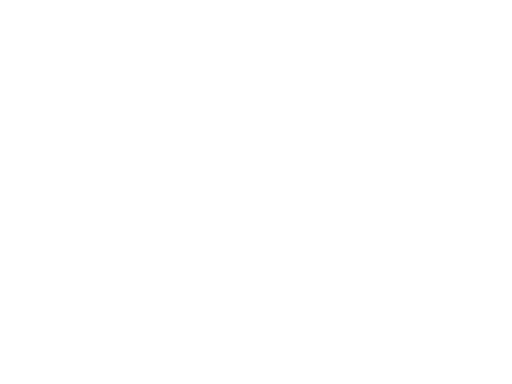

0.75
662461412.5358233


<IPython.core.display.Javascript object>


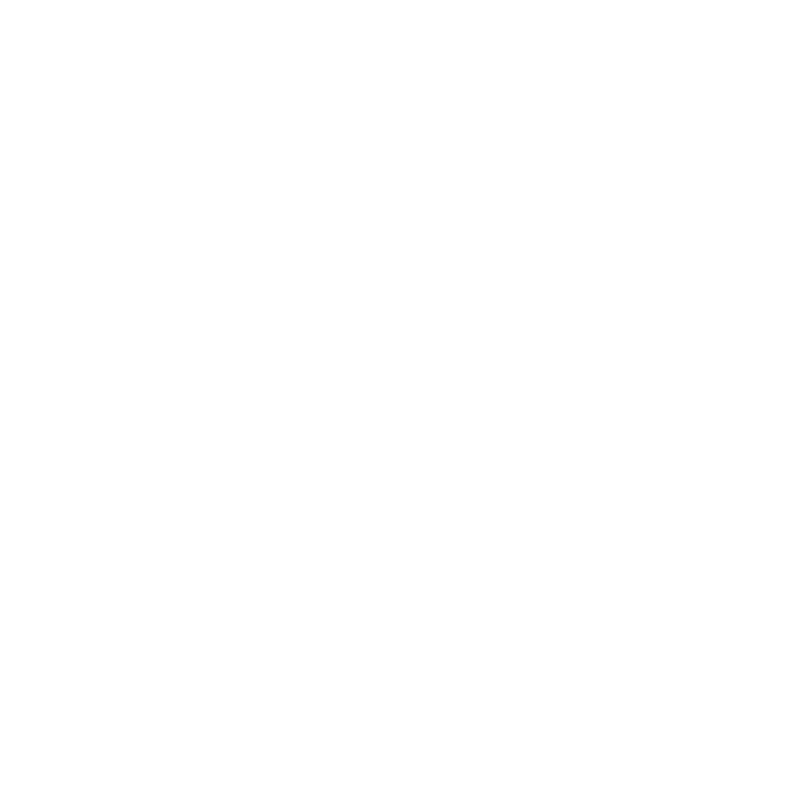

('bg:', 14160.347402555797)
('bg:', 14160.347402555797)
('bg:', 14160.347402555797)
('bg:', 14160.347402555797)
('bg:', 14160.347402555797)
('bg:', 14160.347402555797)
('bg:', 14160.347402555797)
('bg:', 14160.347402555797)


<IPython.core.display.Javascript object>


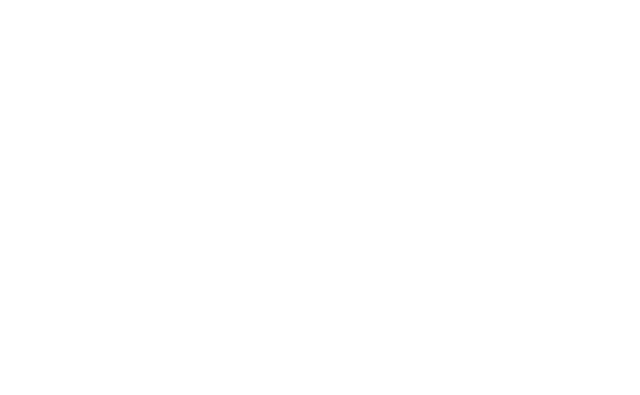

<IPython.core.display.Javascript object>


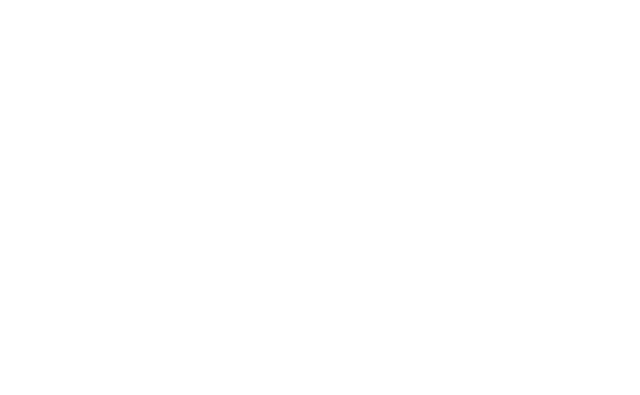

<IPython.core.display.Javascript object>


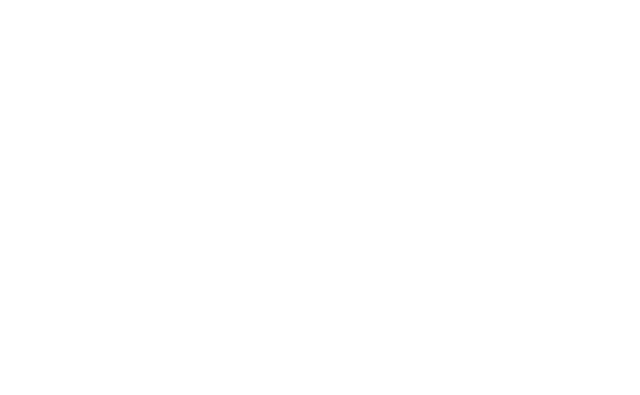

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:263: RuntimeWarning: divide by zero encountered in power


In [1121]:
#settings
ROI=9
#data_dir = "X:\\Ryan C\\Data\\DDM_Karthik\\20210715\\tif files\\Finished\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20210902\\"
#data_dir = "Y:\\Karthik_KRP\\Data\\DDM_DNA_MT\\20210902\\Philip data\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20211001\\"
#data_file = "%s_%s_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
#data_file = "%s_%s_BH-filter_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
data_file = "Trial_%s_%s%s128_FFTDIFFS_dts_ffts_ravs.p" %(video,side,ROI)
#data_file = "Trial_%s_B%s64_FFTDIFFS_dts_ffts_ravs.p" %(video, ROI)

dat = pickle.load(open(data_dir+data_file,'rb'))
ravs = dat['ravs'] 
dts  = dat['dts']
ffts = dat['ffts']
times = dts/framerate
print(dts)
print(times)

%matplotlib notebook
q_index = -1 #the last index
#backg = 2632 #change me! 
backg = np.mean(ravs[:,q_index])
pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=ravs[:,q_index],bg=backg, double=False, fps=framerate)
plt.plot(times, ravs[:,q_index],'ro') #plot the data
plt.plot(times, ddm.dTheory(times,*pars), '-k', lw=4) #see how well the initial guess performs
ax = plt.gca()
plt.text(0.8, 0.2, 'Index of q-value: %i' % q_index, horizontalalignment='center', verticalalignment='center', 
           transform=ax.transAxes, fontdict=font_plt)
plt.xlabel('Time (s)');
np.mean(ravs[:,q_index])
qq= [0.4,0.415,0.43,0.445,0.46,0.475,0.49,0.5,0.515,0.525,0.54,0.55,0.565,0.575,0.59,0.6,0.615,0.63,0.645,0.65,0.665,
         0.675,0.69,0.7,0.715,0.73,0.745,0.75,0.765,0.78,0.795,0.81,0.825,0.84,0.855,0.87,0.89,0.9,0.915,0.93,0.945,
         0.95,0.975,0.99,1.1]
pp=qq[1]

def two_rounds_fitting(data, times,pp):
    '''
    This function does two rounds of fitting. 
    First it uses SciPy's least-squares fitting:
        https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.leastsq.html
    Then, it uses the Levenberg-Marquardt method with the mpfit module. 
    '''

    pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=data, bg=backg, double=False, fps=framerate)
    #Paramters:
    # Amplitude-0, TimeConst-1, Background-2, Alpha (strtching exp), (... same for second exp..))
    minp[3]=0
    maxp[3]=2
    pars[3]=pp#CHANGE STRECTHING EXPONENT HERE
    
    maxp[2]=200000000
    minp[2]=10
    pars[2]=backg# change this to the amplitude of the q fit show in the plot above
    

    maxp[1] = 100000000000 #Decay Time Range
    minp[1] = 0.001
     
    maxp[5] = 100
    
    fix[3]= True#Fix alpha
    fix[2]= True #Fix bg
    
   
    fix[6]= False #6 is the stretching exponent for 2nd exponential
    pars[6] = 0.3
    minp[6] = 0.3 #min alpha2\n",
    maxp[6] = 1.5  #max alpha2\n",
    
    pars[5] = 0.1*pars[1] #5 is the time const for 2nd exponential
    minp[5] = 0.01
    '''
    #Leave this commented out for single exponential fits
    totamp = pars[0]+pars[4] ##0 and 4 are the amplitudes
    pars[4] = 0.4*totamp
    pars[0] = 0.4*totamp'''
    

    #The ddm.newFitLeastsq function does not check whether the parameters are within the
    #  minimum and maximum bounds. It uses SciPy's optimize.leastsq. 
    fitparams_lsq,theory_lsq = ddm.newFitLeastsq(data,times,pars,minp,maxp,lmin,lmax,fix,logfit=False)
    newPars = fitparams_lsq.copy()
    
    #We'll use the found parameters from SciPy's optimize.leastsq and feed them into the
    #  Levenberg-Marquardt function. Before we do so, we'll check that none of the found
    #  parameters are outside the min/max bounds. 
    for i,p in enumerate(fitparams_lsq):
        if p>maxp[i]:
            newPars[i] = maxp[i]*0.9
        if p<minp[i]:
            if p<0:
                newPars[i]=abs(p)
                if newPars[i]>maxp[i]:
                    newPars[i] = maxp[i]*0.9
                elif newPars[i]<minp[i]:
                    newPars[i] = minp[i]*1.1
            else:
                newPars[i] = minp[i]*1.1
                
    #Now use the Levenberg-Marquardt function. It returns the optimized paramters (fitparamsB), the 
    #  best fit (theoryB), any error codes, and the chi-squared value (the sum of squares of the error)
    fitparamsB, theoryB, errCodeB, chi2B = ddm.newFit(data,times,newPars,minp,maxp,lmin,lmax,fix,
                                                      logfit=False,quiet=True,factor=0.8)
    
    return fitparamsB, theoryB, chi2B
q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops

gg=np.zeros((11,45))

a_list=np.zeros((1,45))
for k in range(45):
    for i,q_index in enumerate([5,6,7,8,9,10,11,12,13,14,15]):
        pp=qq[k]
        fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],pp)
        gg[i,k]=chi2B
    #a_list[:,k]=sum(gg[:,k])/len(gg[:,k])
a_list=gg.mean(0)
#print(a_list)
min_ele=a_list[0]
rr=qq[0]
for i in range(1,len(a_list)):
    if a_list[i]<min_ele:
        min_ele=a_list[i]
        rr=qq[i]
print(rr)
print(min_ele)

%matplotlib notebook
plt.figure(figsize=(10,10)) #Create figure of size 10x10 (inches)

q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops
#Loop over four different q-values to do the fit
#for i,q_index in enumerate([2, 5,10,15,20,25,30,35]):
for i,q_index in enumerate([4,7,10,15,17,20,25,30]):
    fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],rr)
    #print len(theoryB)
    ax = plt.subplot(4,2,i+1) #creating 4 subplots in a 2x2 grid
    matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
    ax.semilogx(times,ravs[:,q_index],'ro',alpha=0.4)
    ax.plot(times[:len(theoryB)], theoryB, '-b',lw=3)
    ax.text(0.05,0.88,'Decay time: %.2f s' % fitparamsB[1], 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.76,'Stretching expo: %.2f, %.2f' % (fitparamsB[3], fitparamsB[6]), 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.64,'Amptlidue1: %.2f' % (fitparamsB[0]),
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel("Time (s)", fontdict=font_plt_ax)
    ax.set_title("Fit for q-index of %i. So q = %.3f 1/$\mu$m" % (q_index, q[q_index]), fontdict=font_plt_ax)
    print ("bg:", fitparamsB[2])
    plt.savefig(data_dir + "%s_%s_%s_ISFs.png" %(video,side,ROI))




# So, you have fixed the background AND changed the stretching exponent range, but your fits still seem kind of bad! You can continue onto the next steps to check out some of the other paramters. Your issue might be there!
fitparams = np.zeros((ravs.shape[1],7))
theory = np.zeros((ravs.shape[1],len(times[:end_time])))
tau = np.zeros_like(ravs[0,:]) #decay time
amp = np.zeros_like(tau) #amplitude
bg = np.zeros_like(tau) #background
alph = np.zeros_like(tau) #alpha (stretching exponent)
amp2 = np.zeros_like(tau) #amplitude
tau2 = np.zeros_like(tau) #background
alph2 = np.zeros_like(tau) #alpha (stretching exponent)
chi2 = np.zeros_like(tau)
for i in range(1,len(tau)):
    fitparams[i], theory[i], chi2[i] = two_rounds_fitting(ravs[:end_time,i], times[:end_time],rr)
    amp[i] = fitparams[i][0]
    bg[i] = fitparams[i][2]
    tau[i] = fitparams[i][1]
    alph[i] = fitparams[i][3]
    amp2[i] = fitparams[i][4]
    tau2[i] = fitparams[i][5]
    alph2[i] = fitparams[i][6]
#Plot the amplitude versus the wave vector

fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], amp[2:-1], 'ro')
ax.loglog(q[3:-1], amp2[2:-1], 'bd')
w = amp[2:-1].argmax() #argmax returns the index of the array that has the max value
q_for_max_a = q[2:-2][w]
ax.loglog(q[3:-1], bg[2:-1], 'bo') #Plot the background versus the wave vector
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("Amplitude (red); amp2 (red); bg (grn)", fontdict=font_plt_ax)

ax.text(0.2,0.7,'Max A at 1/q = %.3f' % (1.0/q_for_max_a), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);
ax.text(0.2,0.8,'Mean Background = %.3f' % (bg[4:14].mean()), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);




#Plot the str exponent versus the wave vector
fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], alph[2:-1], 'ro')
ax.loglog(q[3:-1], alph2[2:-1], 'bo')
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("stretching exponent", fontdict=font_plt_ax)









#Plot the decay time versus the wave vector
fig = plt.figure(figsize=(8,8/1.618)); ax = fig.gca(); 
#ax.loglog(q[3:-1], tau[2:-1], 'ro')
qs = q[2:-2]
qend=-1
q0=q[2:qend]
tau0 = ddm.newt(tau[2:qend],alph[2:qend])
#ax.loglog(qs, tau[2:-1], 'ro')
ax.loglog(q[3:qend], ddm.newt(tau[2:qend],alph[2:qend]),'bo') # this is for the first exponential
#ax.loglog(q[2:-31],tau[2:-30],'ro')
#ax.loglog(q[3:-30], ddm.newt(tau2[2:-30],alph2[2:-30]),'ro') # this is for the second
#ax.loglog(q[3:-30], tau2[2:-30],'go')


#aa=[0,1,2,3,4,5,6]
#bb=[10,11,12,13,14,15,16,17,18,19,20]
#Setting range of q values for fitting the data 
#for i in range(aa)
   # for j in range(bb)
minq=4
maxq=14

qmin=q[minq]
qmax=q[maxq]
new_taus=ddm.newt(tau[2:qend],alph[2:qend])

b = np.where((q>=qmin)&(q<=qmax))
ax.plot(q[b[0]+3],new_taus[b[0]],'r+',label='good q range')
#ax.plot(q[b], new_taus[b], 'r+')

ax.set_xlim(0.9,50)
ax.set_ylim(0.0001,10000)

## q^-2, does it look diffusive ?
diffusion_coeff = .1 # CHANGE DIFFUSION COEFFICIENT
power = 2.0 
ax.plot(q[1:-1], (1./diffusion_coeff) * 1./(q[1:-1]**power), '--c', label="Diffusive")


#Fitting data to a line
a = np.polyfit(np.log(q[b[0]+3]),np.log(new_taus[b[0]]), 1)

slope=a[0]
coef1 = np.exp(a[1])
alpha = 2./(-1*slope)
Dif = (1.0/coef1)**alpha
tau_fit = coef1*(q**(-2.0/alpha))
ax.plot(q, tau_fit, '-k', label = "best fit line")
plt.legend()

## does it fit some other power?
#adiffusion_coeff = .022
#power2 = 3
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')

#adiffusion_coeff = 0.018
#power2 = 1
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')


ax.text(0.55,0.15,'D = %.4f um2/s' % diffusion_coeff,
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
ax.text(3,380,"slope: %.4f" %slope)
ax.set_xlabel("q (um^-1)", fontdict=font_plt_ax)
ax.set_ylabel("tau (s)", fontdict=font_plt_ax)
ax.text(3,660,"alpha: %.4f" %alpha)
plt.savefig(data_dir+ "%s_%s_%s_Tau_vs_q.png" %(video,side,ROI))

#################################################################################################
allResults['fitparams_'+str(video)+'_'+str(ROI)] = fitparams
allResults['theory_'+str(video)+'_'+str(ROI)] = theory
allResults['chi2_'+str(video)+'_'+str(ROI)] = chi2
allResults['ravs_'+str(video)+'_'+str(ROI)] = ravs
allResults['dts'] = dts
allResults.keys()
ravs1=ravs[:,4]
ravs2=ravs[:,7]
ravs3=ravs[:,10]
ravs4=ravs[:,15]
ravs5=ravs[:,17]
ravs6=ravs[:,20]
ravs7=ravs[:,25]
ravs8=ravs[:,30]
a=[0]*(len(times)-len(q))
b=[0]*(len(times)-len(tau))
qs=np.append(q,a)
taus=np.append(tau,b)

Final_Data=np.transpose(np.vstack([times,ravs1,ravs2,ravs3,ravs4,ravs5,ravs6,ravs7,ravs8,qs,taus]))
Final_Data_1=(np.vstack([taus]))
np.savetxt(data_dir+ "onlyT_%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data_1, delimiter=',')
np.savetxt(data_dir+ "%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data, delimiter=',')
#np.savetxt('C:\\Users\\kpeddireddy\\Desktop\\test\\1_1_full_Final_Data.csv', Final_Data, delimiter=',')




import pandas as pd
df=pd.DataFrame(Final_Data_1)
df.to_csv(data_dir+ "%s_Tau_vs_q.csv" %(speed), mode='a', index=False, header=False)

[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192  193  194  196  197
  198 

<IPython.core.display.Javascript object>


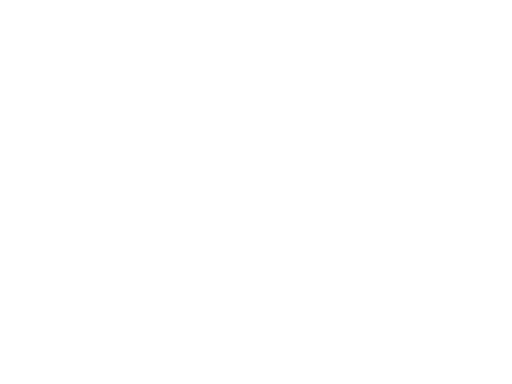

0.7
623699678.941661


<IPython.core.display.Javascript object>


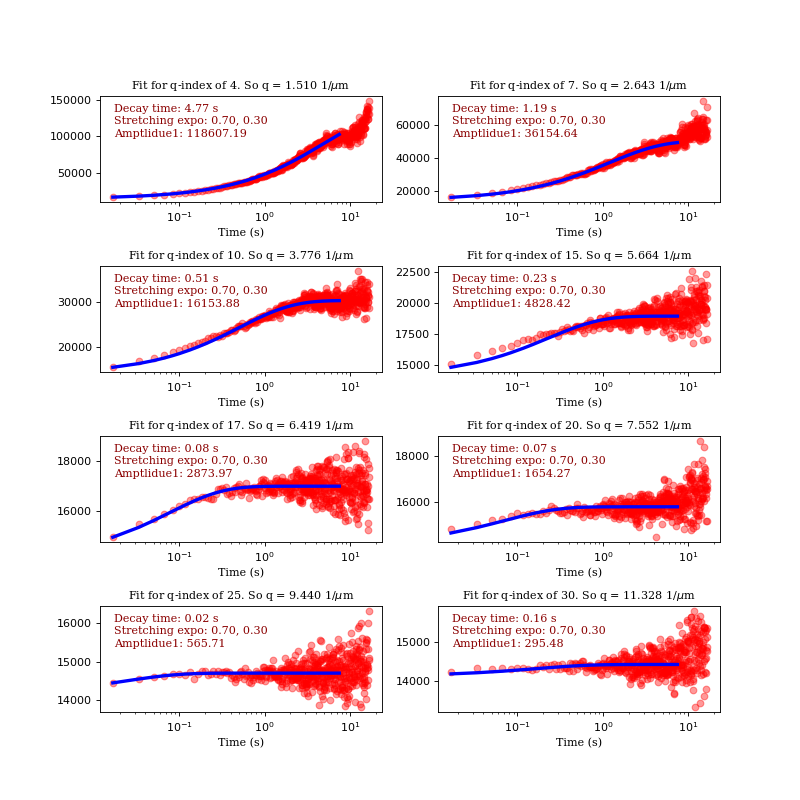

('bg:', 14134.673941325198)
('bg:', 14134.673941325198)
('bg:', 14134.673941325198)
('bg:', 14134.673941325198)
('bg:', 14134.673941325198)
('bg:', 14134.673941325198)
('bg:', 14134.673941325198)
('bg:', 14134.673941325198)


<IPython.core.display.Javascript object>


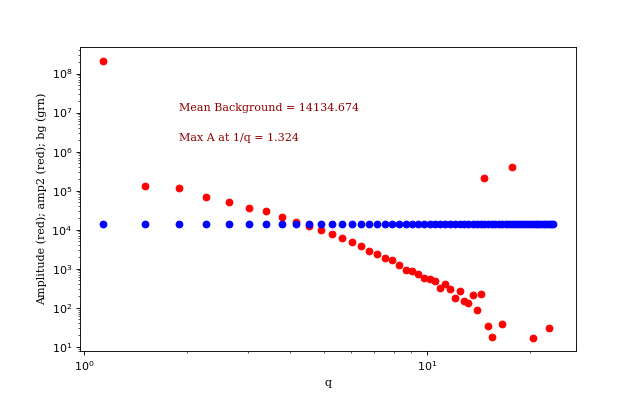

<IPython.core.display.Javascript object>


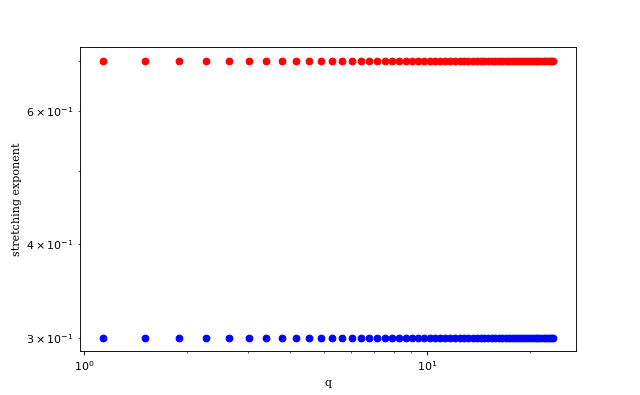

<IPython.core.display.Javascript object>


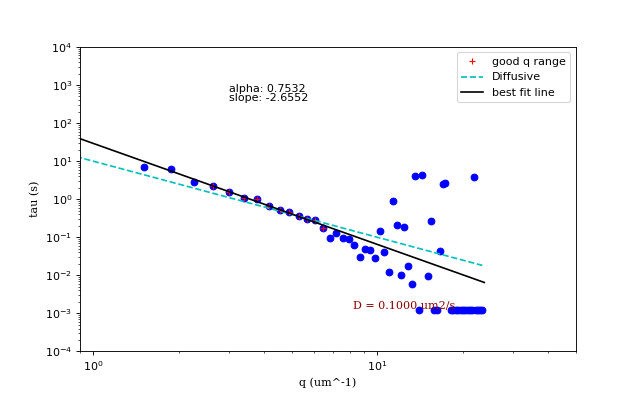

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:263: RuntimeWarning: divide by zero encountered in power


In [1122]:
#settings
ROI=10
#data_dir = "X:\\Ryan C\\Data\\DDM_Karthik\\20210715\\tif files\\Finished\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20210902\\"
#data_dir = "Y:\\Karthik_KRP\\Data\\DDM_DNA_MT\\20210902\\Philip data\\"
#data_dir = "C:\\Users\\kpeddireddy\\Desktop\\test\\20211001\\"
#data_file = "%s_%s_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
#data_file = "%s_%s_BH-filter_256x256_FFTDIFFS_dts_ravs.p" %(video, ROI)
data_file = "Trial_%s_%s%s128_FFTDIFFS_dts_ffts_ravs.p" %(video,side,ROI)
#data_file = "Trial_%s_B%s64_FFTDIFFS_dts_ffts_ravs.p" %(video, ROI)

dat = pickle.load(open(data_dir+data_file,'rb'))
ravs = dat['ravs'] 
dts  = dat['dts']
ffts = dat['ffts']
times = dts/framerate
print(dts)
print(times)

%matplotlib notebook
q_index = -1 #the last index
#backg = 2632 #change me! 
backg = np.mean(ravs[:,q_index])
pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=ravs[:,q_index],bg=backg, double=False, fps=framerate)
plt.plot(times, ravs[:,q_index],'ro') #plot the data
plt.plot(times, ddm.dTheory(times,*pars), '-k', lw=4) #see how well the initial guess performs
ax = plt.gca()
plt.text(0.8, 0.2, 'Index of q-value: %i' % q_index, horizontalalignment='center', verticalalignment='center', 
           transform=ax.transAxes, fontdict=font_plt)
plt.xlabel('Time (s)');
np.mean(ravs[:,q_index])
qq= [0.4,0.415,0.43,0.445,0.46,0.475,0.49,0.5,0.515,0.525,0.54,0.55,0.565,0.575,0.59,0.6,0.615,0.63,0.645,0.65,0.665,
         0.675,0.69,0.7,0.715,0.73,0.745,0.75,0.765,0.78,0.795,0.81,0.825,0.84,0.855,0.87,0.89,0.9,0.915,0.93,0.945,
         0.95,0.975,0.99,1.1]
pp=qq[1]

def two_rounds_fitting(data, times,pp):
    '''
    This function does two rounds of fitting. 
    First it uses SciPy's least-squares fitting:
        https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.leastsq.html
    Then, it uses the Levenberg-Marquardt method with the mpfit module. 
    '''

    pars,minp,maxp,lmin,lmax,fix = ddm.returnReasonableParams(d=data, bg=backg, double=False, fps=framerate)
    #Paramters:
    # Amplitude-0, TimeConst-1, Background-2, Alpha (strtching exp), (... same for second exp..))
    minp[3]=0
    maxp[3]=2
    pars[3]=pp#CHANGE STRECTHING EXPONENT HERE
    
    maxp[2]=200000000
    minp[2]=10
    pars[2]=backg# change this to the amplitude of the q fit show in the plot above
    

    maxp[1] = 100000000000 #Decay Time Range
    minp[1] = 0.001
     
    maxp[5] = 100
    
    fix[3]= True#Fix alpha
    fix[2]= True #Fix bg
    
   
    fix[6]= False #6 is the stretching exponent for 2nd exponential
    pars[6] = 0.3
    minp[6] = 0.3 #min alpha2\n",
    maxp[6] = 1.5  #max alpha2\n",
    
    pars[5] = 0.1*pars[1] #5 is the time const for 2nd exponential
    minp[5] = 0.01
    '''
    #Leave this commented out for single exponential fits
    totamp = pars[0]+pars[4] ##0 and 4 are the amplitudes
    pars[4] = 0.4*totamp
    pars[0] = 0.4*totamp'''
    

    #The ddm.newFitLeastsq function does not check whether the parameters are within the
    #  minimum and maximum bounds. It uses SciPy's optimize.leastsq. 
    fitparams_lsq,theory_lsq = ddm.newFitLeastsq(data,times,pars,minp,maxp,lmin,lmax,fix,logfit=False)
    newPars = fitparams_lsq.copy()
    
    #We'll use the found parameters from SciPy's optimize.leastsq and feed them into the
    #  Levenberg-Marquardt function. Before we do so, we'll check that none of the found
    #  parameters are outside the min/max bounds. 
    for i,p in enumerate(fitparams_lsq):
        if p>maxp[i]:
            newPars[i] = maxp[i]*0.9
        if p<minp[i]:
            if p<0:
                newPars[i]=abs(p)
                if newPars[i]>maxp[i]:
                    newPars[i] = maxp[i]*0.9
                elif newPars[i]<minp[i]:
                    newPars[i] = minp[i]*1.1
            else:
                newPars[i] = minp[i]*1.1
                
    #Now use the Levenberg-Marquardt function. It returns the optimized paramters (fitparamsB), the 
    #  best fit (theoryB), any error codes, and the chi-squared value (the sum of squares of the error)
    fitparamsB, theoryB, errCodeB, chi2B = ddm.newFit(data,times,newPars,minp,maxp,lmin,lmax,fix,
                                                      logfit=False,quiet=True,factor=0.8)
    
    return fitparamsB, theoryB, chi2B
q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops

gg=np.zeros((11,45))

a_list=np.zeros((1,45))
for k in range(45):
    for i,q_index in enumerate([5,6,7,8,9,10,11,12,13,14,15]):
        pp=qq[k]
        fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],pp)
        gg[i,k]=chi2B
    #a_list[:,k]=sum(gg[:,k])/len(gg[:,k])
a_list=gg.mean(0)
#print(a_list)
min_ele=a_list[0]
rr=qq[0]
for i in range(1,len(a_list)):
    if a_list[i]<min_ele:
        min_ele=a_list[i]
        rr=qq[i]
print(rr)
print(min_ele)

%matplotlib notebook
plt.figure(figsize=(10,10)) #Create figure of size 10x10 (inches)

q_index = 10 # 10 usually works because it tends to fit well for all types of dynamics
end_time = 350 # change this if the data plateaus early, it is where the fitting stops
#Loop over four different q-values to do the fit
#for i,q_index in enumerate([2, 5,10,15,20,25,30,35]):
for i,q_index in enumerate([4,7,10,15,17,20,25,30]):
    fitparamsB, theoryB, chi2B = two_rounds_fitting(ravs[:end_time,q_index], times[:end_time],rr)
    #print len(theoryB)
    ax = plt.subplot(4,2,i+1) #creating 4 subplots in a 2x2 grid
    matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
    ax.semilogx(times,ravs[:,q_index],'ro',alpha=0.4)
    ax.plot(times[:len(theoryB)], theoryB, '-b',lw=3)
    ax.text(0.05,0.88,'Decay time: %.2f s' % fitparamsB[1], 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.76,'Stretching expo: %.2f, %.2f' % (fitparamsB[3], fitparamsB[6]), 
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.text(0.05,0.64,'Amptlidue1: %.2f' % (fitparamsB[0]),
            fontdict=font_plt,horizontalalignment='left', 
            verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel("Time (s)", fontdict=font_plt_ax)
    ax.set_title("Fit for q-index of %i. So q = %.3f 1/$\mu$m" % (q_index, q[q_index]), fontdict=font_plt_ax)
    print ("bg:", fitparamsB[2])
    plt.savefig(data_dir + "%s_%s_%s_ISFs.png" %(video,side,ROI))




# So, you have fixed the background AND changed the stretching exponent range, but your fits still seem kind of bad! You can continue onto the next steps to check out some of the other paramters. Your issue might be there!
fitparams = np.zeros((ravs.shape[1],7))
theory = np.zeros((ravs.shape[1],len(times[:end_time])))
tau = np.zeros_like(ravs[0,:]) #decay time
amp = np.zeros_like(tau) #amplitude
bg = np.zeros_like(tau) #background
alph = np.zeros_like(tau) #alpha (stretching exponent)
amp2 = np.zeros_like(tau) #amplitude
tau2 = np.zeros_like(tau) #background
alph2 = np.zeros_like(tau) #alpha (stretching exponent)
chi2 = np.zeros_like(tau)
for i in range(1,len(tau)):
    fitparams[i], theory[i], chi2[i] = two_rounds_fitting(ravs[:end_time,i], times[:end_time],rr)
    amp[i] = fitparams[i][0]
    bg[i] = fitparams[i][2]
    tau[i] = fitparams[i][1]
    alph[i] = fitparams[i][3]
    amp2[i] = fitparams[i][4]
    tau2[i] = fitparams[i][5]
    alph2[i] = fitparams[i][6]
#Plot the amplitude versus the wave vector

fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], amp[2:-1], 'ro')
ax.loglog(q[3:-1], amp2[2:-1], 'bd')
w = amp[2:-1].argmax() #argmax returns the index of the array that has the max value
q_for_max_a = q[2:-2][w]
ax.loglog(q[3:-1], bg[2:-1], 'bo') #Plot the background versus the wave vector
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("Amplitude (red); amp2 (red); bg (grn)", fontdict=font_plt_ax)

ax.text(0.2,0.7,'Max A at 1/q = %.3f' % (1.0/q_for_max_a), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);
ax.text(0.2,0.8,'Mean Background = %.3f' % (bg[4:14].mean()), 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes);




#Plot the str exponent versus the wave vector
fig2 = plt.figure(figsize=(8,8/1.618)); ax = fig2.gca(); 
ax.loglog(q[3:-1], alph[2:-1], 'ro')
ax.loglog(q[3:-1], alph2[2:-1], 'bo')
ax.set_xlabel("q", fontdict=font_plt_ax)
ax.set_ylabel("stretching exponent", fontdict=font_plt_ax)









#Plot the decay time versus the wave vector
fig = plt.figure(figsize=(8,8/1.618)); ax = fig.gca(); 
#ax.loglog(q[3:-1], tau[2:-1], 'ro')
qs = q[2:-2]
qend=-1
q0=q[2:qend]
tau0 = ddm.newt(tau[2:qend],alph[2:qend])
#ax.loglog(qs, tau[2:-1], 'ro')
ax.loglog(q[3:qend], ddm.newt(tau[2:qend],alph[2:qend]),'bo') # this is for the first exponential
#ax.loglog(q[2:-31],tau[2:-30],'ro')
#ax.loglog(q[3:-30], ddm.newt(tau2[2:-30],alph2[2:-30]),'ro') # this is for the second
#ax.loglog(q[3:-30], tau2[2:-30],'go')


#aa=[0,1,2,3,4,5,6]
#bb=[10,11,12,13,14,15,16,17,18,19,20]
#Setting range of q values for fitting the data 
#for i in range(aa)
   # for j in range(bb)
minq=4
maxq=14

qmin=q[minq]
qmax=q[maxq]
new_taus=ddm.newt(tau[2:qend],alph[2:qend])

b = np.where((q>=qmin)&(q<=qmax))
ax.plot(q[b[0]+3],new_taus[b[0]],'r+',label='good q range')
#ax.plot(q[b], new_taus[b], 'r+')

ax.set_xlim(0.9,50)
ax.set_ylim(0.0001,10000)

## q^-2, does it look diffusive ?
diffusion_coeff = .1 # CHANGE DIFFUSION COEFFICIENT
power = 2.0 
ax.plot(q[1:-1], (1./diffusion_coeff) * 1./(q[1:-1]**power), '--c', label="Diffusive")


#Fitting data to a line
a = np.polyfit(np.log(q[b[0]+3]),np.log(new_taus[b[0]]), 1)

slope=a[0]
coef1 = np.exp(a[1])
alpha = 2./(-1*slope)
Dif = (1.0/coef1)**alpha
tau_fit = coef1*(q**(-2.0/alpha))
ax.plot(q, tau_fit, '-k', label = "best fit line")
plt.legend()

## does it fit some other power?
#adiffusion_coeff = .022
#power2 = 3
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')

#adiffusion_coeff = 0.018
#power2 = 1
#ax.plot(q[2:-2], (1./adiffusion_coeff) * 1./(q[2:-2]**power2), '--k')


ax.text(0.55,0.15,'D = %.4f um2/s' % diffusion_coeff,
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
ax.text(3,380,"slope: %.4f" %slope)
ax.set_xlabel("q (um^-1)", fontdict=font_plt_ax)
ax.set_ylabel("tau (s)", fontdict=font_plt_ax)
ax.text(3,660,"alpha: %.4f" %alpha)
plt.savefig(data_dir+ "%s_%s_%s_Tau_vs_q.png" %(video,side,ROI))

#################################################################################################
allResults['fitparams_'+str(video)+'_'+str(ROI)] = fitparams
allResults['theory_'+str(video)+'_'+str(ROI)] = theory
allResults['chi2_'+str(video)+'_'+str(ROI)] = chi2
allResults['ravs_'+str(video)+'_'+str(ROI)] = ravs
allResults['dts'] = dts
allResults.keys()
ravs1=ravs[:,4]
ravs2=ravs[:,7]
ravs3=ravs[:,10]
ravs4=ravs[:,15]
ravs5=ravs[:,17]
ravs6=ravs[:,20]
ravs7=ravs[:,25]
ravs8=ravs[:,30]
a=[0]*(len(times)-len(q))
b=[0]*(len(times)-len(tau))
qs=np.append(q,a)
taus=np.append(tau,b)

Final_Data=np.transpose(np.vstack([times,ravs1,ravs2,ravs3,ravs4,ravs5,ravs6,ravs7,ravs8,qs,taus]))
Final_Data_1=(np.vstack([taus]))
np.savetxt(data_dir+ "onlyT_%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data_1, delimiter=',')
np.savetxt(data_dir+ "%s_%s_%s_Tau_vs_q.csv" %(video,ROI,side), Final_Data, delimiter=',')
#np.savetxt('C:\\Users\\kpeddireddy\\Desktop\\test\\1_1_full_Final_Data.csv', Final_Data, delimiter=',')




import pandas as pd
df=pd.DataFrame(Final_Data_1)
df.to_csv(data_dir+ "%s_Tau_vs_q.csv" %(speed), mode='a', index=False, header=False)